In [1]:
import torch
import numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

from model.cnn_net import *
from utils.training import *
from data.data import *

In [2]:
model_path = os.path.join(os.getcwd(), "weights")

args = {
    'DATASET_NAME':'mnist',
    'num_classes':10,
    
    'USE_CUDA': True if torch.cuda.is_available() else False,
    'BATCH_SIZE': 256,
    'N_EPOCHS': 100,
    'LEARNING_RATE_1': 1e-2,
    'LEARNING_RATE_2': 1e-2,
    'WEIGHTDECAY':0,
#     'MOMENTUM': 0.9,
    
    'LAMBDA_recon': 0.005,
    'LAMBDA_class': 1,
    
    ##For Decoder
    'num_features':160,
    'LReLU_negative_slope':0.2,
    'input_height':28,
    'input_width':28,
    'input_channel':1,
    'type':'plusCR',
    
}

#Setting Default Cuda Device
torch.cuda.set_device(1)

In [3]:
class Config:
    def __init__(self, dataset='mnist'):
        # CONV1
        self.conv1_in = 1
        self.conv1_out = 12
        self.conv1_kernel_size = 15

        # CONV2
        self.conv2_in = 12
        self.conv2_out = 16
        self.conv2_kernel_size = 8

        # FC1
        self.fc1_in = 7 * 7 * 16
        self.fc1_out = 784
        
        # FC1
        self.fc2_in = 784
        self.fc2_out = 160

torch.manual_seed(2)
config = Config()

net = CNNnet(args, config)


# net = torch.nn.DataParallel(net)


    
# net.load_state_dict(torch.load(os.path.join(model_path, 'CapsNetMNIST_Recon.pth'), map_location='cpu'))

# net.decoder.reconstraction_layers = nn.Sequential(
#             nn.Linear(16 * 10, 512),
#             nn.LeakyReLU(negative_slope=args['LReLU_negative_slope'], inplace=True),
#             nn.Linear(512, 1024),
#             nn.LeakyReLU(negative_slope=args['LReLU_negative_slope'], inplace=True),
#             nn.Linear(1024, 784),
#             nn.Sigmoid()
#         )

# # # # freeze All layers except Decoder
# to_freeze = [net.conv_layer, net.primary_capsules, net.digit_capsules_1, net.digit_capsules_2]
# for layer in to_freeze:
#     for param in layer.parameters():
#         param.requires_grad = False
#     layer.eval()
    
if args['USE_CUDA']:
    net = net.cuda()
    

## Loading Dataset

In [4]:
trainloader, testloader = dataset(args)

  0%|          | 0/235 [00:00<?, ?it/s]

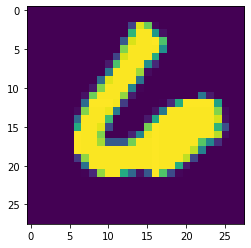

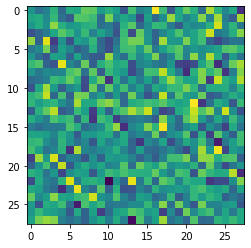

  3%|▎         | 8/235 [00:01<02:22,  1.59it/s]

tensor([ 0.0423, -0.0694,  0.0297], device='cuda:1', grad_fn=<SliceBackward>)
tensor([ 0.0423, -0.0694,  0.0297], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [1/100], Batch: [1/235], train accuracy: 0.128906, loss: 0.009106


 42%|████▏     | 98/235 [00:03<00:03, 40.33it/s]

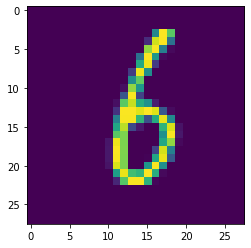

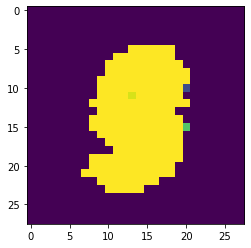

 46%|████▋     | 109/235 [00:03<00:04, 30.95it/s]

tensor([0.1643, 0.0538, 0.1524], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1654, 0.0549, 0.1535], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([2.0797e-09, 2.0981e-09, 1.6384e-09], device='cuda:1')
Epoch: [1/100], Batch: [101/235], train accuracy: 0.628906, loss: 0.004642


 85%|████████▌ | 200/235 [00:05<00:00, 45.19it/s]

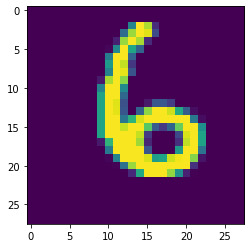

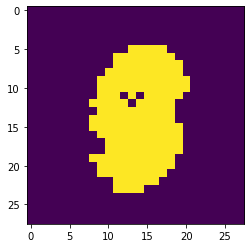

 90%|████████▉ | 211/235 [00:05<00:00, 32.68it/s]

tensor([0.1774, 0.0669, 0.1653], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1775, 0.0670, 0.1654], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-1.5354e-09, -1.2448e-09, -1.2424e-09], device='cuda:1')
Epoch: [1/100], Batch: [201/235], train accuracy: 0.808594, loss: 0.002850


100%|██████████| 235/235 [00:06<00:00, 36.03it/s]

Epoch: [1/100], train loss: 0.006271



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [1/100], test accuracy: 0.785700, loss: 0.720970


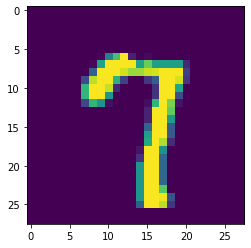

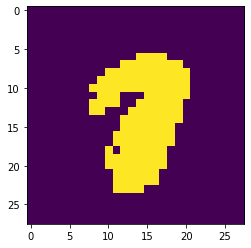

  3%|▎         | 8/235 [00:00<00:58,  3.85it/s]

tensor([0.1792, 0.0687, 0.1672], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1793, 0.0687, 0.1672], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-3.3952e-09, -2.8526e-09, -2.7753e-09], device='cuda:1')
Epoch: [2/100], Batch: [1/235], train accuracy: 0.828125, loss: 0.002700


 42%|████▏     | 98/235 [00:02<00:03, 44.87it/s]

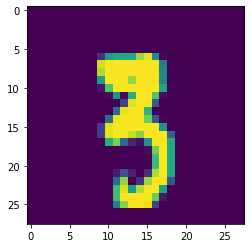

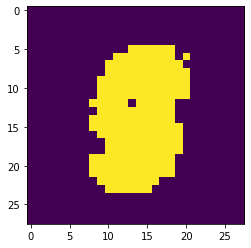

 46%|████▋     | 109/235 [00:02<00:03, 33.49it/s]

tensor([0.1790, 0.0684, 0.1670], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1790, 0.0684, 0.1670], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-4.2404e-12, -3.9321e-12, -4.2524e-12], device='cuda:1')
Epoch: [2/100], Batch: [101/235], train accuracy: 0.886719, loss: 0.001597


 83%|████████▎ | 196/235 [00:04<00:00, 44.94it/s]

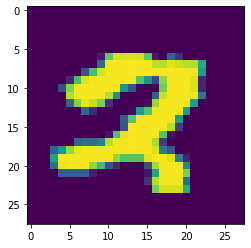

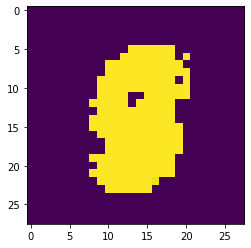

 89%|████████▊ | 208/235 [00:05<00:00, 33.29it/s]

tensor([0.1781, 0.0677, 0.1663], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1781, 0.0677, 0.1663], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([5.6289e-16, 5.5888e-16, 5.2056e-16], device='cuda:1')
Epoch: [2/100], Batch: [201/235], train accuracy: 0.839844, loss: 0.002633


100%|██████████| 235/235 [00:05<00:00, 39.95it/s]

Epoch: [2/100], train loss: 0.002095



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [2/100], test accuracy: 0.879900, loss: 0.412518


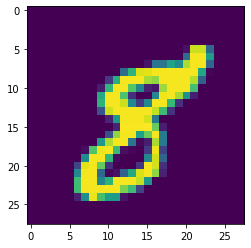

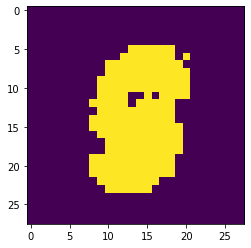

  3%|▎         | 8/235 [00:00<00:58,  3.87it/s]

tensor([0.1782, 0.0678, 0.1664], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1782, 0.0678, 0.1664], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-3.5020e-14, -3.0996e-14, -2.9593e-14], device='cuda:1')
Epoch: [3/100], Batch: [1/235], train accuracy: 0.894531, loss: 0.001443


 42%|████▏     | 98/235 [00:02<00:03, 42.51it/s]

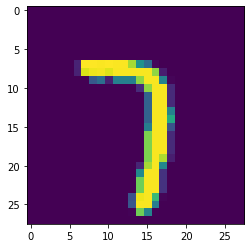

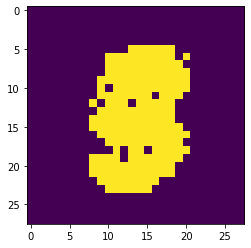

 46%|████▋     | 109/235 [00:02<00:04, 30.66it/s]

tensor([0.1785, 0.0681, 0.1668], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1785, 0.0681, 0.1668], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([5.8668e-31, 5.6335e-31, 7.3617e-31], device='cuda:1')
Epoch: [3/100], Batch: [101/235], train accuracy: 0.855469, loss: 0.002043


 84%|████████▍ | 197/235 [00:04<00:00, 45.58it/s]

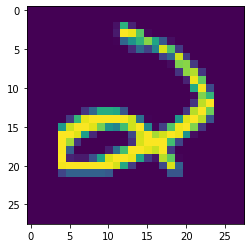

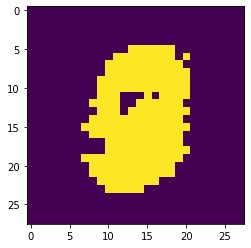

 89%|████████▊ | 208/235 [00:05<00:00, 33.25it/s]

tensor([0.1785, 0.0681, 0.1668], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1785, 0.0681, 0.1668], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-1.7655e-32, -1.4725e-32, -1.6845e-32], device='cuda:1')
Epoch: [3/100], Batch: [201/235], train accuracy: 0.839844, loss: 0.002466


100%|██████████| 235/235 [00:05<00:00, 39.20it/s]

Epoch: [3/100], train loss: 0.001858



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [3/100], test accuracy: 0.889600, loss: 0.385453


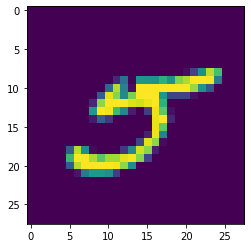

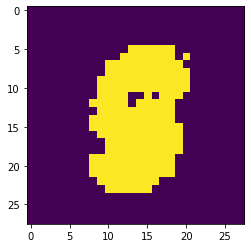

  3%|▎         | 8/235 [00:00<01:00,  3.78it/s]

tensor([0.1784, 0.0680, 0.1667], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1784, 0.0680, 0.1667], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-8.5969e-29, -1.3056e-28, -1.4682e-28], device='cuda:1')
Epoch: [4/100], Batch: [1/235], train accuracy: 0.898438, loss: 0.001525


 42%|████▏     | 99/235 [00:02<00:03, 44.05it/s]

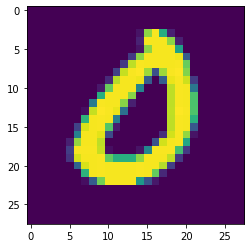

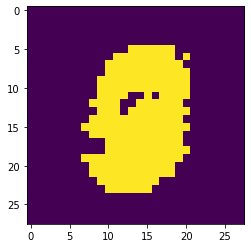

 47%|████▋     | 110/235 [00:02<00:03, 32.59it/s]

tensor([0.1783, 0.0679, 0.1666], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1783, 0.0679, 0.1666], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-4.5828e-31, -3.7774e-31, -3.9084e-31], device='cuda:1')
Epoch: [4/100], Batch: [101/235], train accuracy: 0.878906, loss: 0.001707


 85%|████████▌ | 200/235 [00:04<00:00, 45.40it/s]

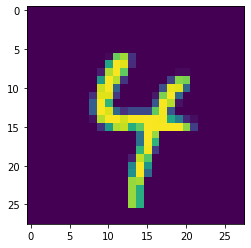

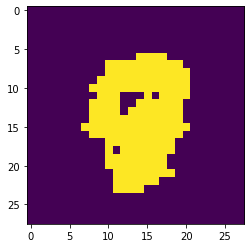

 89%|████████▉ | 210/235 [00:05<00:00, 32.75it/s]

tensor([0.1783, 0.0679, 0.1666], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1783, 0.0679, 0.1666], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([4.5235e-26, 3.4438e-26, 3.0766e-26], device='cuda:1')
Epoch: [4/100], Batch: [201/235], train accuracy: 0.882812, loss: 0.001629


100%|██████████| 235/235 [00:05<00:00, 39.65it/s]

Epoch: [4/100], train loss: 0.001675



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [4/100], test accuracy: 0.877800, loss: 0.452328


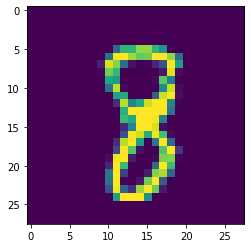

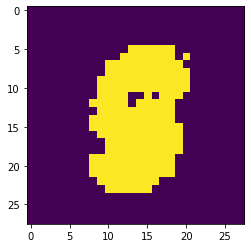

  3%|▎         | 8/235 [00:00<01:07,  3.37it/s]

tensor([0.1783, 0.0679, 0.1666], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1783, 0.0679, 0.1666], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([4.7995e-32, 3.6823e-32, 4.1346e-32], device='cuda:1')
Epoch: [5/100], Batch: [1/235], train accuracy: 0.890625, loss: 0.001395


 42%|████▏     | 98/235 [00:02<00:03, 43.63it/s]

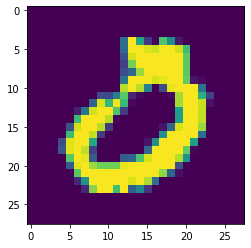

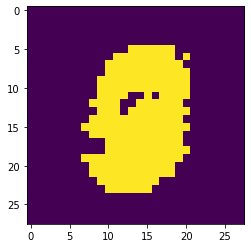

 47%|████▋     | 110/235 [00:02<00:03, 33.04it/s]

tensor([0.1783, 0.0679, 0.1666], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1783, 0.0679, 0.1666], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-4.2039e-45, -2.8026e-45, -2.8026e-45], device='cuda:1')
Epoch: [5/100], Batch: [101/235], train accuracy: 0.906250, loss: 0.001455


 83%|████████▎ | 196/235 [00:04<00:00, 44.74it/s]

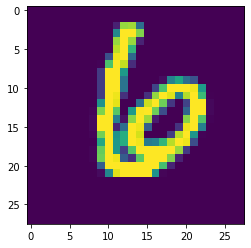

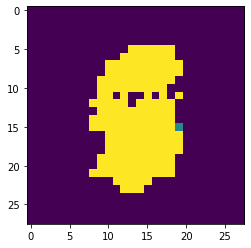

 89%|████████▊ | 208/235 [00:05<00:00, 33.58it/s]

tensor([0.1762, 0.0661, 0.1647], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1761, 0.0660, 0.1646], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-1.9049e-08, -1.5303e-08, -1.6325e-08], device='cuda:1')
Epoch: [5/100], Batch: [201/235], train accuracy: 0.890625, loss: 0.001399


100%|██████████| 235/235 [00:05<00:00, 39.70it/s]

Epoch: [5/100], train loss: 0.001500



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [5/100], test accuracy: 0.900800, loss: 0.379975


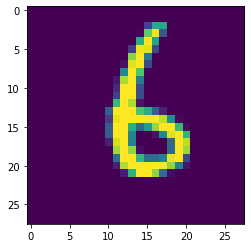

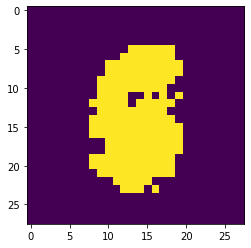

  3%|▎         | 8/235 [00:00<00:57,  3.92it/s]

tensor([0.1727, 0.0627, 0.1616], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1731, 0.0631, 0.1620], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-9.6436e-08, -8.7118e-08, -8.5410e-08], device='cuda:1')
Epoch: [6/100], Batch: [1/235], train accuracy: 0.894531, loss: 0.001557


 42%|████▏     | 98/235 [00:02<00:03, 43.68it/s]

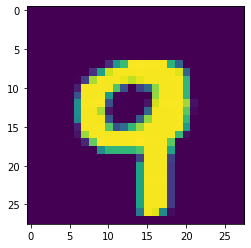

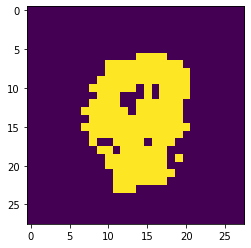

 47%|████▋     | 110/235 [00:02<00:03, 33.49it/s]

tensor([0.1887, 0.0767, 0.1760], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.1888, 0.0769, 0.1761], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([2.0918e-12, 1.4553e-12, 1.5323e-12], device='cuda:1')
Epoch: [6/100], Batch: [101/235], train accuracy: 0.914062, loss: 0.001122


 85%|████████▌ | 200/235 [00:04<00:00, 44.22it/s]

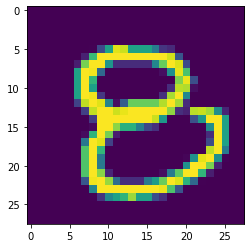

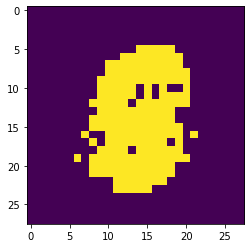

 89%|████████▉ | 210/235 [00:05<00:00, 33.15it/s]

tensor([0.2240, 0.1062, 0.2054], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2240, 0.1062, 0.2054], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-2.3599e-09, -2.5788e-09, -1.8596e-09], device='cuda:1')
Epoch: [6/100], Batch: [201/235], train accuracy: 0.902344, loss: 0.001264


100%|██████████| 235/235 [00:05<00:00, 39.95it/s]

Epoch: [6/100], train loss: 0.001542



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [6/100], test accuracy: 0.875200, loss: 0.454339


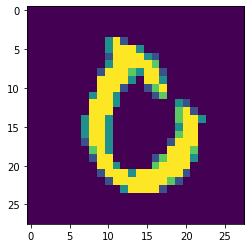

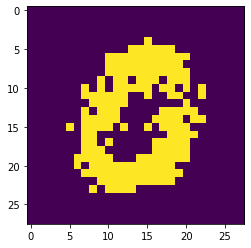

  3%|▎         | 8/235 [00:00<01:08,  3.32it/s]

tensor([0.2205, 0.1032, 0.2023], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2205, 0.1032, 0.2023], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-1.3312e-14, -1.0247e-14, -1.1528e-14], device='cuda:1')
Epoch: [7/100], Batch: [1/235], train accuracy: 0.878906, loss: 0.001840


 41%|████      | 96/235 [00:02<00:03, 43.09it/s]

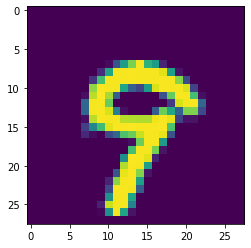

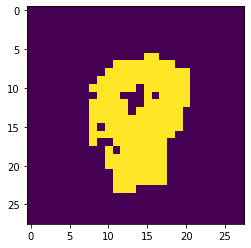

 46%|████▌     | 108/235 [00:02<00:03, 32.76it/s]

tensor([0.2225, 0.1052, 0.2041], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2225, 0.1052, 0.2041], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([8.5492e-28, 7.0523e-28, 7.1619e-28], device='cuda:1')
Epoch: [7/100], Batch: [101/235], train accuracy: 0.902344, loss: 0.001482


 83%|████████▎ | 196/235 [00:04<00:00, 44.82it/s]

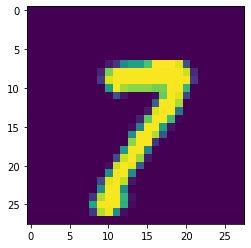

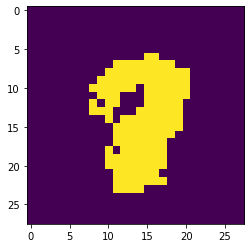

 89%|████████▊ | 208/235 [00:05<00:00, 33.12it/s]

tensor([0.2243, 0.1067, 0.2056], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2246, 0.1069, 0.2058], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([1.8943e-35, 1.6630e-35, 1.8102e-35], device='cuda:1')
Epoch: [7/100], Batch: [201/235], train accuracy: 0.878906, loss: 0.002153


100%|██████████| 235/235 [00:05<00:00, 39.32it/s]

Epoch: [7/100], train loss: 0.001961



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [7/100], test accuracy: 0.873000, loss: 0.508421


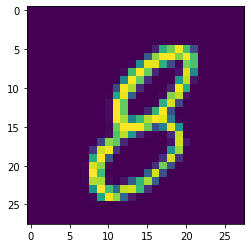

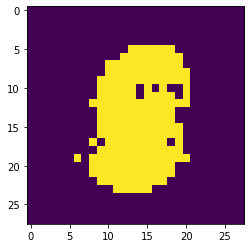

  3%|▎         | 8/235 [00:00<00:59,  3.84it/s]

tensor([0.2265, 0.1089, 0.2077], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2266, 0.1089, 0.2077], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([2.7215e-21, 2.7458e-21, 2.4595e-21], device='cuda:1')
Epoch: [8/100], Batch: [1/235], train accuracy: 0.886719, loss: 0.001553


 42%|████▏     | 98/235 [00:02<00:03, 43.75it/s]

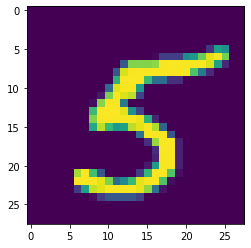

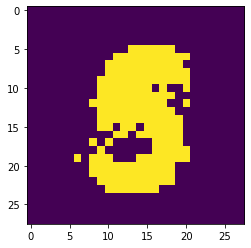

 46%|████▋     | 109/235 [00:02<00:03, 33.64it/s]

tensor([0.2263, 0.1087, 0.2074], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2263, 0.1087, 0.2074], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-5.2689e-21, -4.2711e-21, -4.6047e-21], device='cuda:1')
Epoch: [8/100], Batch: [101/235], train accuracy: 0.875000, loss: 0.001943


 84%|████████▍ | 198/235 [00:04<00:00, 44.41it/s]

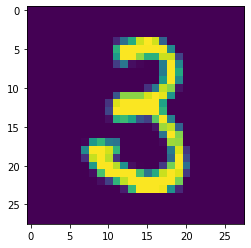

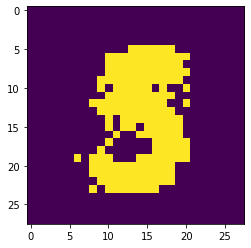

 89%|████████▉ | 210/235 [00:05<00:00, 33.52it/s]

tensor([0.2278, 0.1099, 0.2086], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2278, 0.1099, 0.2086], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([2.1179e-31, 2.4004e-31, 2.0136e-31], device='cuda:1')
Epoch: [8/100], Batch: [201/235], train accuracy: 0.914062, loss: 0.001339


100%|██████████| 235/235 [00:05<00:00, 39.74it/s]

Epoch: [8/100], train loss: 0.001633



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [8/100], test accuracy: 0.897700, loss: 0.388936


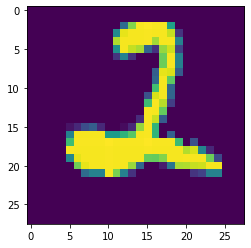

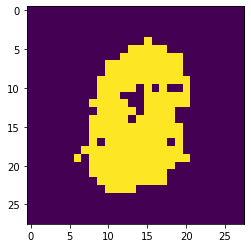

  3%|▎         | 8/235 [00:00<01:11,  3.18it/s]

tensor([0.2278, 0.1099, 0.2086], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2278, 0.1099, 0.2086], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-2.6458e-26, -2.0982e-26, -1.9368e-26], device='cuda:1')
Epoch: [9/100], Batch: [1/235], train accuracy: 0.906250, loss: 0.001589


 42%|████▏     | 98/235 [00:02<00:03, 43.41it/s]

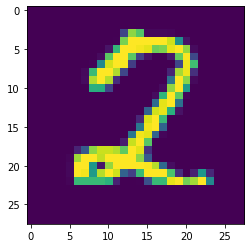

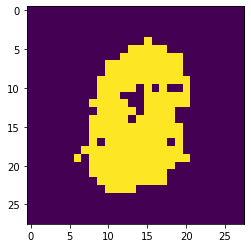

 46%|████▋     | 109/235 [00:02<00:03, 33.42it/s]

tensor([0.2279, 0.1099, 0.2087], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2279, 0.1099, 0.2087], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-1.0079e-21, -8.6315e-22, -8.1448e-22], device='cuda:1')
Epoch: [9/100], Batch: [101/235], train accuracy: 0.902344, loss: 0.001816


 85%|████████▍ | 199/235 [00:04<00:00, 45.85it/s]

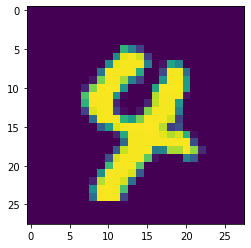

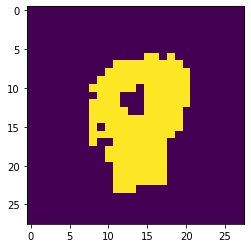

 89%|████████▉ | 210/235 [00:05<00:00, 33.44it/s]

tensor([0.2279, 0.1099, 0.2087], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2279, 0.1099, 0.2087], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([7.5293e-28, 6.6636e-28, 7.1831e-28], device='cuda:1')
Epoch: [9/100], Batch: [201/235], train accuracy: 0.875000, loss: 0.001846


100%|██████████| 235/235 [00:05<00:00, 39.25it/s]

Epoch: [9/100], train loss: 0.001452



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [9/100], test accuracy: 0.892800, loss: 0.395667


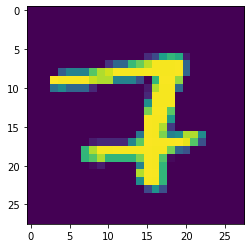

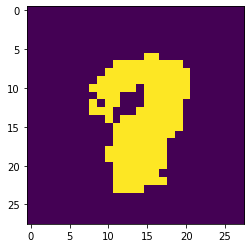

  3%|▎         | 8/235 [00:00<01:02,  3.61it/s]

tensor([0.2279, 0.1099, 0.2087], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2279, 0.1099, 0.2087], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([7.1068e-24, 5.6153e-24, 5.2630e-24], device='cuda:1')
Epoch: [10/100], Batch: [1/235], train accuracy: 0.847656, loss: 0.001881


 41%|████▏     | 97/235 [00:02<00:03, 41.67it/s]

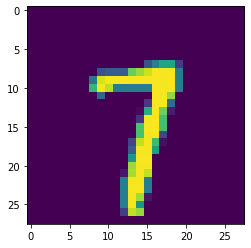

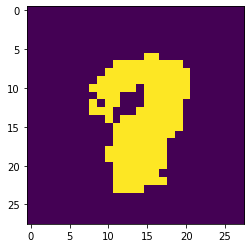

 46%|████▌     | 108/235 [00:03<00:03, 31.95it/s]

tensor([0.2279, 0.1099, 0.2087], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2279, 0.1099, 0.2087], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-2.1487e-25, -1.7876e-25, -1.9727e-25], device='cuda:1')
Epoch: [10/100], Batch: [101/235], train accuracy: 0.894531, loss: 0.001186


 84%|████████▍ | 198/235 [00:05<00:00, 44.19it/s]

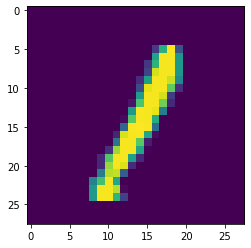

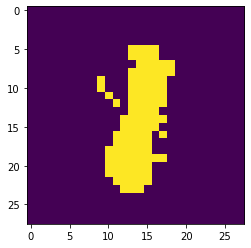

 89%|████████▊ | 208/235 [00:05<00:00, 29.44it/s]

tensor([0.2277, 0.1098, 0.2085], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2277, 0.1098, 0.2085], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([4.8032e-25, 3.4600e-25, 3.7494e-25], device='cuda:1')
Epoch: [10/100], Batch: [201/235], train accuracy: 0.875000, loss: 0.001851


100%|██████████| 235/235 [00:06<00:00, 37.92it/s]

Epoch: [10/100], train loss: 0.001462



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [10/100], test accuracy: 0.914400, loss: 0.326113


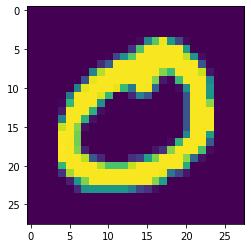

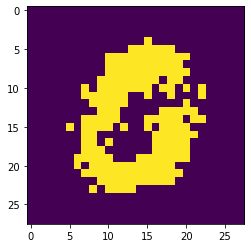

  3%|▎         | 8/235 [00:00<00:59,  3.85it/s]

tensor([0.2276, 0.1097, 0.2084], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2277, 0.1098, 0.2085], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([2.1857e-16, 1.4892e-16, 1.4424e-16], device='cuda:1')
Epoch: [11/100], Batch: [1/235], train accuracy: 0.894531, loss: 0.001263


 42%|████▏     | 98/235 [00:02<00:03, 43.64it/s]

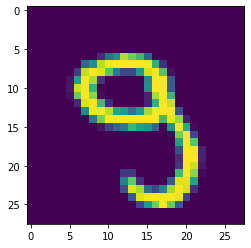

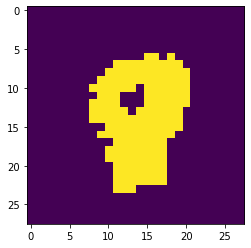

 46%|████▋     | 109/235 [00:02<00:03, 33.42it/s]

tensor([0.2289, 0.1108, 0.2096], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2289, 0.1108, 0.2096], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([2.9552e-26, 2.4433e-26, 2.6035e-26], device='cuda:1')
Epoch: [11/100], Batch: [101/235], train accuracy: 0.898438, loss: 0.001443


 83%|████████▎ | 196/235 [00:04<00:00, 46.36it/s]

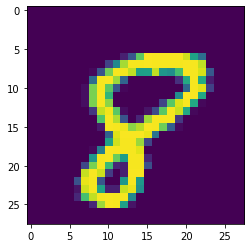

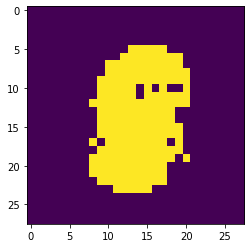

 89%|████████▊ | 208/235 [00:05<00:00, 32.71it/s]

tensor([0.2293, 0.1111, 0.2098], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2293, 0.1111, 0.2098], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([3.6246e-32, 3.1598e-32, 3.3729e-32], device='cuda:1')
Epoch: [11/100], Batch: [201/235], train accuracy: 0.906250, loss: 0.001617


100%|██████████| 235/235 [00:05<00:00, 39.50it/s]

Epoch: [11/100], train loss: 0.001587



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [11/100], test accuracy: 0.886800, loss: 0.429979


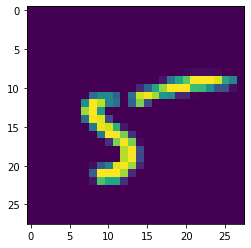

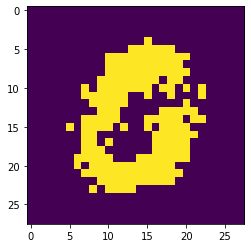

  3%|▎         | 8/235 [00:00<01:01,  3.71it/s]

tensor([0.2293, 0.1111, 0.2098], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2293, 0.1111, 0.2098], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-1.1724e-10, -8.0941e-11, -8.9095e-11], device='cuda:1')
Epoch: [12/100], Batch: [1/235], train accuracy: 0.878906, loss: 0.001408


 42%|████▏     | 98/235 [00:02<00:03, 43.82it/s]

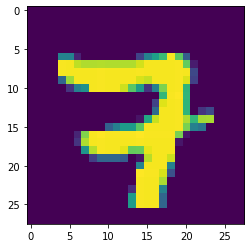

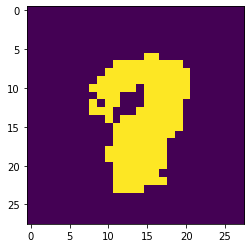

 47%|████▋     | 110/235 [00:02<00:03, 33.16it/s]

tensor([0.2292, 0.1110, 0.2098], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2292, 0.1110, 0.2098], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-3.5439e-24, -3.0236e-24, -3.6901e-24], device='cuda:1')
Epoch: [12/100], Batch: [101/235], train accuracy: 0.917969, loss: 0.001517


 83%|████████▎ | 196/235 [00:04<00:00, 44.99it/s]

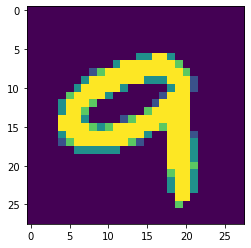

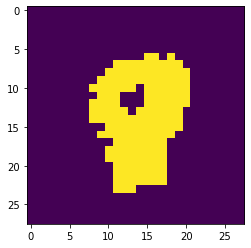

 89%|████████▊ | 208/235 [00:05<00:00, 30.97it/s]

tensor([0.2292, 0.1110, 0.2097], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2292, 0.1110, 0.2097], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([2.9642e-25, 2.1718e-25, 1.9459e-25], device='cuda:1')
Epoch: [12/100], Batch: [201/235], train accuracy: 0.906250, loss: 0.002037


100%|██████████| 235/235 [00:05<00:00, 39.51it/s]

Epoch: [12/100], train loss: 0.001652



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [12/100], test accuracy: 0.864300, loss: 0.522468


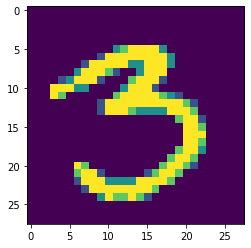

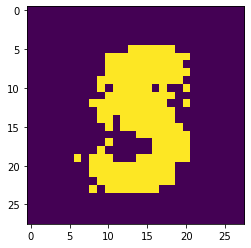

  3%|▎         | 8/235 [00:00<00:58,  3.89it/s]

tensor([0.2292, 0.1110, 0.2098], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2292, 0.1110, 0.2098], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-7.4977e-25, -7.0701e-25, -6.3929e-25], device='cuda:1')
Epoch: [13/100], Batch: [1/235], train accuracy: 0.894531, loss: 0.001641


 41%|████      | 96/235 [00:02<00:03, 43.43it/s]

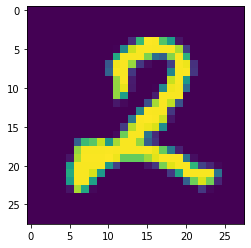

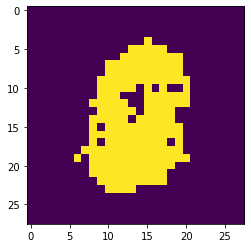

 46%|████▌     | 108/235 [00:02<00:03, 33.15it/s]

tensor([0.2255, 0.1074, 0.2063], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2255, 0.1074, 0.2063], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-1.6896e-23, -1.4544e-23, -1.8856e-23], device='cuda:1')
Epoch: [13/100], Batch: [101/235], train accuracy: 0.910156, loss: 0.001427


 84%|████████▍ | 198/235 [00:04<00:00, 45.06it/s]

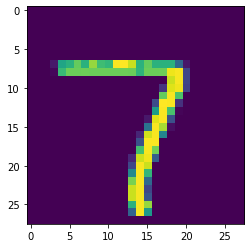

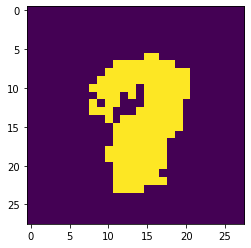

 89%|████████▉ | 210/235 [00:05<00:00, 33.02it/s]

tensor([0.2264, 0.1081, 0.2070], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2265, 0.1082, 0.2071], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([7.1921e-19, 5.2961e-19, 4.7842e-19], device='cuda:1')
Epoch: [13/100], Batch: [201/235], train accuracy: 0.882812, loss: 0.001439


100%|██████████| 235/235 [00:05<00:00, 39.90it/s]

Epoch: [13/100], train loss: 0.001736



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [13/100], test accuracy: 0.882500, loss: 0.438783


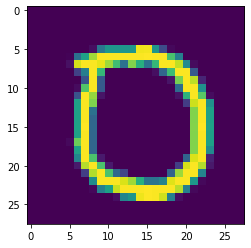

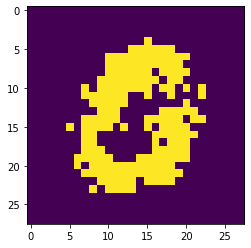

  3%|▎         | 8/235 [00:00<00:59,  3.84it/s]

tensor([0.2278, 0.1093, 0.2082], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2278, 0.1093, 0.2082], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-1.6265e-32, -1.3967e-32, -1.3598e-32], device='cuda:1')
Epoch: [14/100], Batch: [1/235], train accuracy: 0.867188, loss: 0.001770


 42%|████▏     | 98/235 [00:02<00:03, 43.65it/s]

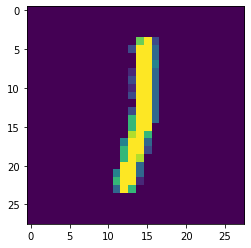

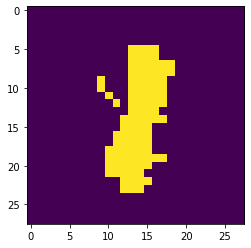

 46%|████▋     | 109/235 [00:03<00:04, 29.90it/s]

tensor([0.2277, 0.1092, 0.2080], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2277, 0.1092, 0.2080], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([2.7974e-28, 2.3705e-28, 2.7440e-28], device='cuda:1')
Epoch: [14/100], Batch: [101/235], train accuracy: 0.878906, loss: 0.003251


 85%|████████▍ | 199/235 [00:05<00:00, 42.67it/s]

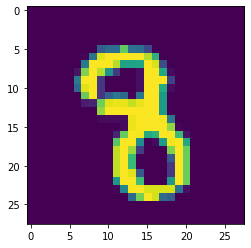

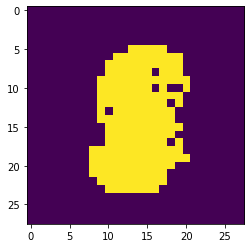

 89%|████████▉ | 210/235 [00:05<00:00, 32.53it/s]

tensor([0.2284, 0.1099, 0.2088], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2284, 0.1099, 0.2088], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-4.4765e-32, -5.1942e-32, -4.7987e-32], device='cuda:1')
Epoch: [14/100], Batch: [201/235], train accuracy: 0.882812, loss: 0.001469


100%|██████████| 235/235 [00:06<00:00, 38.32it/s]

Epoch: [14/100], train loss: 0.001810



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [14/100], test accuracy: 0.889400, loss: 0.470387


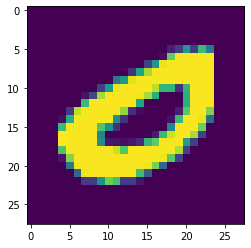

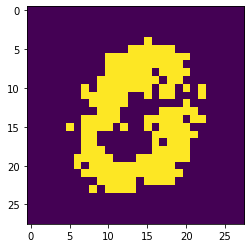

  3%|▎         | 8/235 [00:00<00:59,  3.85it/s]

tensor([0.2286, 0.1100, 0.2089], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2286, 0.1100, 0.2089], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-8.4078e-45, -7.0065e-45, -5.6052e-45], device='cuda:1')
Epoch: [15/100], Batch: [1/235], train accuracy: 0.941406, loss: 0.000888


 42%|████▏     | 98/235 [00:02<00:03, 44.07it/s]

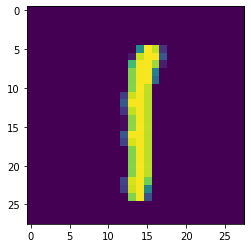

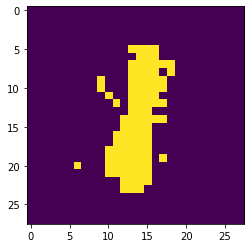

 47%|████▋     | 110/235 [00:02<00:03, 32.92it/s]

tensor([0.2306, 0.1113, 0.2107], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2306, 0.1113, 0.2107], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-5.3047e-27, -3.6622e-27, -3.7018e-27], device='cuda:1')
Epoch: [15/100], Batch: [101/235], train accuracy: 0.812500, loss: 0.003966


 85%|████████▌ | 200/235 [00:04<00:00, 45.81it/s]

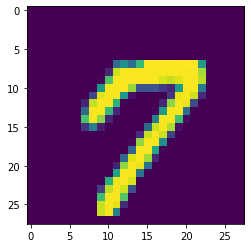

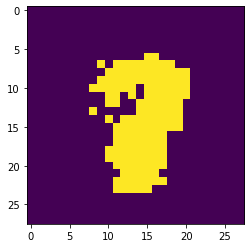

 89%|████████▉ | 210/235 [00:05<00:00, 32.79it/s]

tensor([0.2546, 0.1294, 0.2286], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2546, 0.1294, 0.2286], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-3.4484e-18, -2.6156e-18, -2.7208e-18], device='cuda:1')
Epoch: [15/100], Batch: [201/235], train accuracy: 0.882812, loss: 0.001844


100%|██████████| 235/235 [00:05<00:00, 39.92it/s]

Epoch: [15/100], train loss: 0.002229



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [15/100], test accuracy: 0.889900, loss: 0.460957


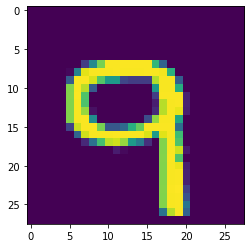

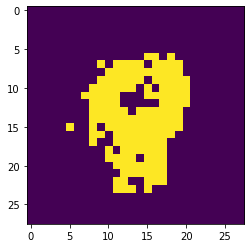

  3%|▎         | 8/235 [00:00<00:59,  3.81it/s]

tensor([0.2529, 0.1281, 0.2276], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2528, 0.1280, 0.2275], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([5.2272e-40, 3.8787e-40, 3.4814e-40], device='cuda:1')
Epoch: [16/100], Batch: [1/235], train accuracy: 0.890625, loss: 0.001797


 43%|████▎     | 100/235 [00:02<00:03, 43.37it/s]

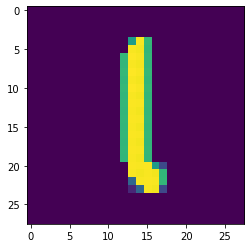

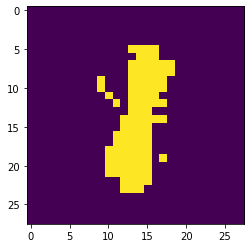

 47%|████▋     | 110/235 [00:02<00:04, 30.82it/s]

tensor([0.2533, 0.1286, 0.2280], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2533, 0.1286, 0.2280], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [16/100], Batch: [101/235], train accuracy: 0.886719, loss: 0.001377


 83%|████████▎ | 196/235 [00:04<00:00, 44.13it/s]

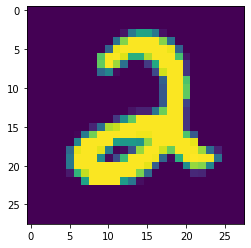

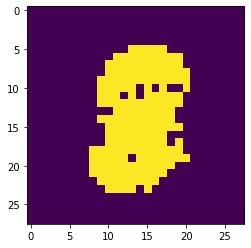

 89%|████████▊ | 208/235 [00:05<00:00, 32.92it/s]

tensor([0.2531, 0.1282, 0.2277], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2531, 0.1282, 0.2277], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [16/100], Batch: [201/235], train accuracy: 0.878906, loss: 0.001955


100%|██████████| 235/235 [00:05<00:00, 39.29it/s]

Epoch: [16/100], train loss: 0.001695



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [16/100], test accuracy: 0.900600, loss: 0.406592


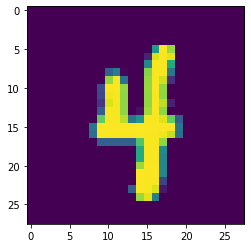

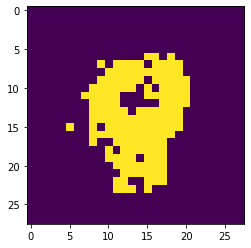

  3%|▎         | 8/235 [00:00<00:59,  3.80it/s]

tensor([0.2530, 0.1281, 0.2276], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2530, 0.1281, 0.2276], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [17/100], Batch: [1/235], train accuracy: 0.882812, loss: 0.002045


 42%|████▏     | 98/235 [00:02<00:03, 43.94it/s]

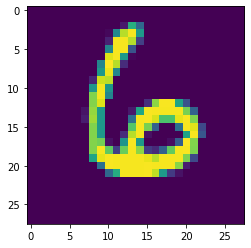

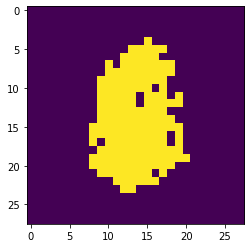

 46%|████▋     | 109/235 [00:02<00:03, 33.38it/s]

tensor([0.2488, 0.1264, 0.2230], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2488, 0.1264, 0.2230], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [17/100], Batch: [101/235], train accuracy: 0.828125, loss: 0.002182


 83%|████████▎ | 196/235 [00:04<00:00, 45.02it/s]

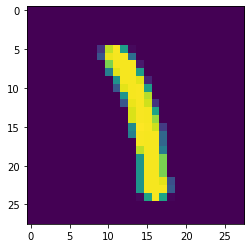

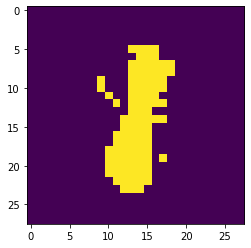

 89%|████████▊ | 208/235 [00:05<00:00, 33.32it/s]

tensor([0.2623, 0.1356, 0.2316], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2623, 0.1356, 0.2316], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([3.9209e-40, 2.7682e-40, 2.9754e-40], device='cuda:1')
Epoch: [17/100], Batch: [201/235], train accuracy: 0.902344, loss: 0.002221


100%|██████████| 235/235 [00:05<00:00, 39.54it/s]

Epoch: [17/100], train loss: 0.001977



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [17/100], test accuracy: 0.888300, loss: 0.438043


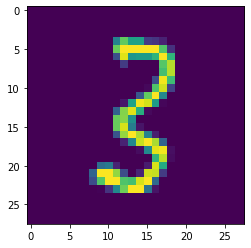

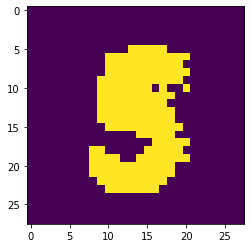

  3%|▎         | 8/235 [00:00<01:08,  3.31it/s]

tensor([0.2625, 0.1358, 0.2317], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2625, 0.1358, 0.2317], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [18/100], Batch: [1/235], train accuracy: 0.894531, loss: 0.001437


 42%|████▏     | 98/235 [00:02<00:03, 43.54it/s]

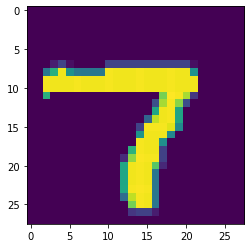

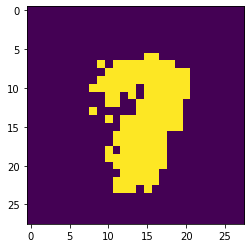

 46%|████▋     | 109/235 [00:02<00:03, 33.23it/s]

tensor([0.2590, 0.1308, 0.2270], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2590, 0.1309, 0.2271], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-1.0080e-33, -7.6467e-34, -7.0412e-34], device='cuda:1')
Epoch: [18/100], Batch: [101/235], train accuracy: 0.898438, loss: 0.001848


 85%|████████▌ | 200/235 [00:05<00:00, 43.75it/s]

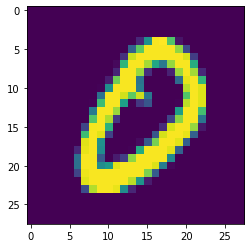

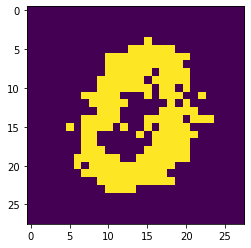

 89%|████████▉ | 210/235 [00:05<00:00, 33.08it/s]

tensor([0.2613, 0.1324, 0.2285], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2618, 0.1328, 0.2288], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-4.2907e-40, -3.0844e-40, -3.0418e-40], device='cuda:1')
Epoch: [18/100], Batch: [201/235], train accuracy: 0.898438, loss: 0.001558


100%|██████████| 235/235 [00:06<00:00, 38.91it/s]

Epoch: [18/100], train loss: 0.001905



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [18/100], test accuracy: 0.875600, loss: 0.527561


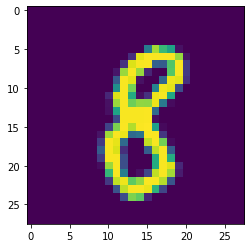

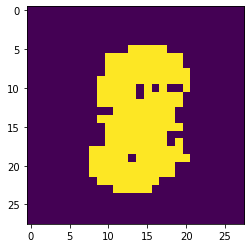

  3%|▎         | 8/235 [00:00<00:58,  3.85it/s]

tensor([0.2626, 0.1348, 0.2297], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2625, 0.1348, 0.2297], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [19/100], Batch: [1/235], train accuracy: 0.851562, loss: 0.002520


 42%|████▏     | 98/235 [00:02<00:03, 43.98it/s]

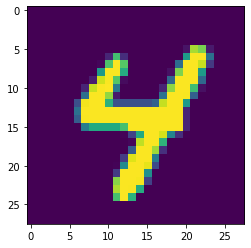

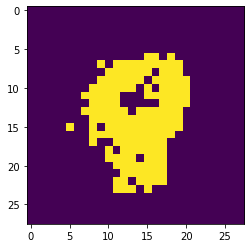

 46%|████▋     | 109/235 [00:02<00:03, 33.52it/s]

tensor([0.2717, 0.1423, 0.2362], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2717, 0.1423, 0.2362], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [19/100], Batch: [101/235], train accuracy: 0.921875, loss: 0.001397


 85%|████████▍ | 199/235 [00:04<00:00, 45.63it/s]

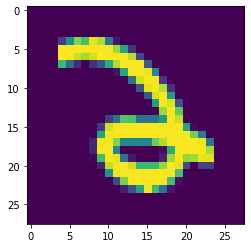

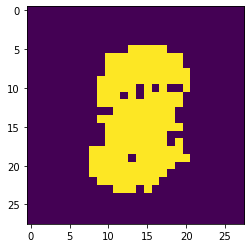

 89%|████████▉ | 210/235 [00:05<00:00, 32.86it/s]

tensor([0.2717, 0.1423, 0.2362], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2717, 0.1423, 0.2362], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [19/100], Batch: [201/235], train accuracy: 0.921875, loss: 0.001238


100%|██████████| 235/235 [00:05<00:00, 39.74it/s]

Epoch: [19/100], train loss: 0.001626



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [19/100], test accuracy: 0.901700, loss: 0.390997


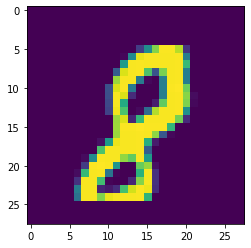

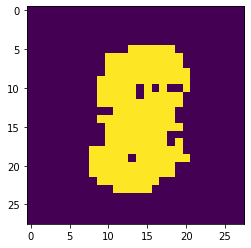

  3%|▎         | 8/235 [00:00<01:11,  3.20it/s]

tensor([0.2719, 0.1424, 0.2363], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2719, 0.1424, 0.2363], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([3.4786e-25, 2.5699e-25, 2.5047e-25], device='cuda:1')
Epoch: [20/100], Batch: [1/235], train accuracy: 0.914062, loss: 0.001238


 42%|████▏     | 98/235 [00:02<00:03, 43.73it/s]

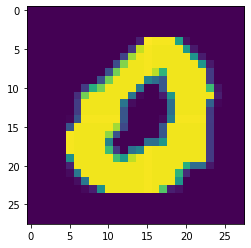

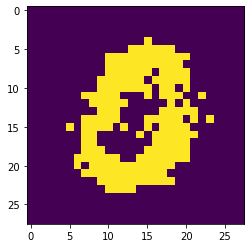

 46%|████▋     | 109/235 [00:02<00:03, 33.53it/s]

tensor([0.2707, 0.1415, 0.2355], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2707, 0.1415, 0.2355], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [20/100], Batch: [101/235], train accuracy: 0.890625, loss: 0.001507


 83%|████████▎ | 196/235 [00:04<00:00, 45.81it/s]

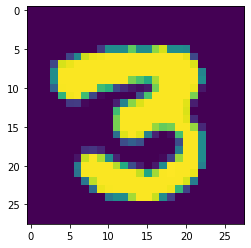

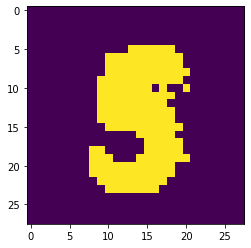

 89%|████████▊ | 208/235 [00:05<00:00, 32.61it/s]

tensor([0.2707, 0.1415, 0.2355], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2707, 0.1415, 0.2355], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [20/100], Batch: [201/235], train accuracy: 0.902344, loss: 0.001591


100%|██████████| 235/235 [00:06<00:00, 39.08it/s]

Epoch: [20/100], train loss: 0.001386



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [20/100], test accuracy: 0.881600, loss: 0.478376


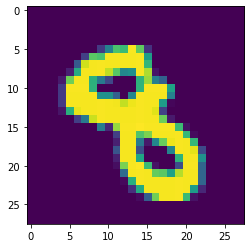

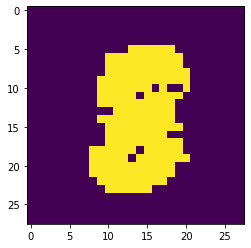

  3%|▎         | 8/235 [00:00<00:58,  3.87it/s]

tensor([0.2707, 0.1415, 0.2355], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2707, 0.1415, 0.2355], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([3.1813e-26, 2.2865e-26, 2.0928e-26], device='cuda:1')
Epoch: [21/100], Batch: [1/235], train accuracy: 0.910156, loss: 0.001361


 42%|████▏     | 98/235 [00:02<00:03, 43.72it/s]

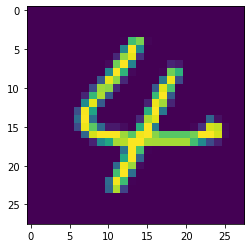

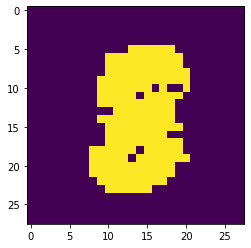

 46%|████▋     | 109/235 [00:02<00:03, 33.49it/s]

tensor([0.2707, 0.1415, 0.2355], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2707, 0.1415, 0.2355], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([4.7330e-31, 3.4379e-31, 3.0728e-31], device='cuda:1')
Epoch: [21/100], Batch: [101/235], train accuracy: 0.886719, loss: 0.001765


 85%|████████▍ | 199/235 [00:04<00:00, 45.82it/s]

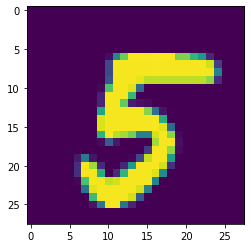

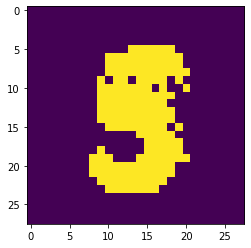

 89%|████████▉ | 210/235 [00:05<00:00, 33.24it/s]

tensor([0.2700, 0.1410, 0.2350], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2700, 0.1410, 0.2350], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [21/100], Batch: [201/235], train accuracy: 0.878906, loss: 0.001916


100%|██████████| 235/235 [00:05<00:00, 39.76it/s]

Epoch: [21/100], train loss: 0.001741



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [21/100], test accuracy: 0.884000, loss: 0.501815


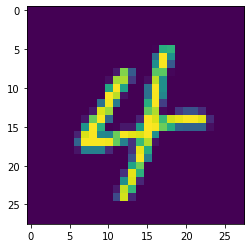

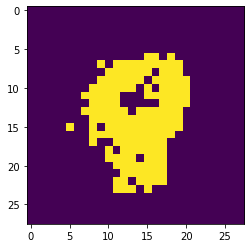

  3%|▎         | 8/235 [00:00<01:09,  3.27it/s]

tensor([0.2712, 0.1418, 0.2359], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2712, 0.1418, 0.2359], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([3.4183e-10, 2.5967e-10, 2.3743e-10], device='cuda:1')
Epoch: [22/100], Batch: [1/235], train accuracy: 0.890625, loss: 0.002762


 42%|████▏     | 98/235 [00:02<00:03, 43.97it/s]

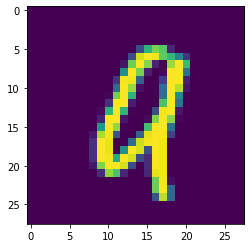

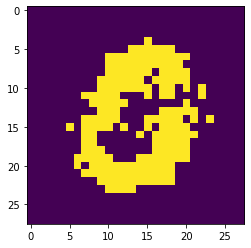

 47%|████▋     | 110/235 [00:02<00:03, 33.23it/s]

tensor([0.3004, 0.1642, 0.2576], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3004, 0.1642, 0.2576], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-1.0655e-31, -8.0838e-32, -7.5142e-32], device='cuda:1')
Epoch: [22/100], Batch: [101/235], train accuracy: 0.902344, loss: 0.001510


 85%|████████▌ | 200/235 [00:04<00:00, 44.90it/s]

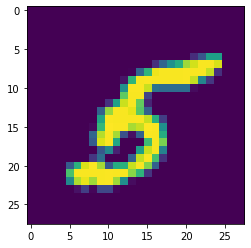

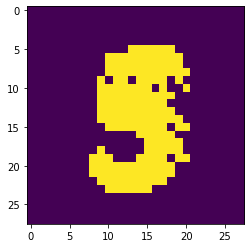

 89%|████████▉ | 210/235 [00:05<00:00, 33.45it/s]

tensor([0.2932, 0.1584, 0.2524], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2935, 0.1586, 0.2525], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([3.3728e-27, 2.5962e-27, 2.3836e-27], device='cuda:1')
Epoch: [22/100], Batch: [201/235], train accuracy: 0.843750, loss: 0.003568


100%|██████████| 235/235 [00:05<00:00, 39.61it/s]

Epoch: [22/100], train loss: 0.002006



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [22/100], test accuracy: 0.893700, loss: 0.462540


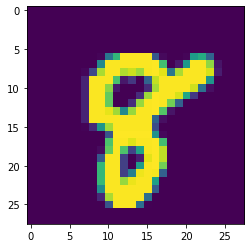

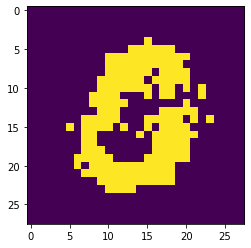

  3%|▎         | 8/235 [00:00<00:58,  3.86it/s]

tensor([0.2999, 0.1633, 0.2571], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3000, 0.1634, 0.2571], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([2.0494e-19, 1.5403e-19, 1.5121e-19], device='cuda:1')
Epoch: [23/100], Batch: [1/235], train accuracy: 0.902344, loss: 0.001471


 42%|████▏     | 98/235 [00:02<00:03, 44.47it/s]

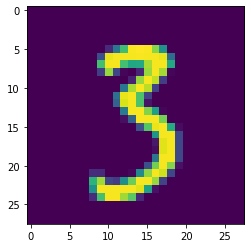

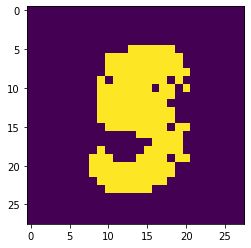

 46%|████▋     | 109/235 [00:02<00:03, 33.17it/s]

tensor([0.2887, 0.1537, 0.2478], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.2886, 0.1537, 0.2478], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([4.9186e-41, 3.8498e-41, 3.4407e-41], device='cuda:1')
Epoch: [23/100], Batch: [101/235], train accuracy: 0.871094, loss: 0.001960


 85%|████████▍ | 199/235 [00:04<00:00, 42.93it/s]

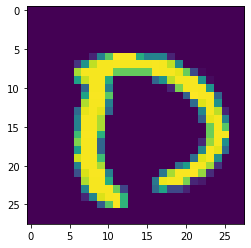

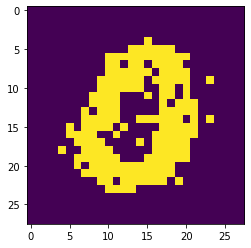

 89%|████████▉ | 210/235 [00:05<00:00, 32.52it/s]

tensor([0.3304, 0.1811, 0.2745], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3301, 0.1808, 0.2743], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([3.9880e-21, 3.0196e-21, 2.6691e-21], device='cuda:1')
Epoch: [23/100], Batch: [201/235], train accuracy: 0.906250, loss: 0.002005


100%|██████████| 235/235 [00:05<00:00, 39.26it/s]

Epoch: [23/100], train loss: 0.001587



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [23/100], test accuracy: 0.910600, loss: 0.403456


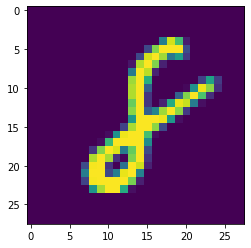

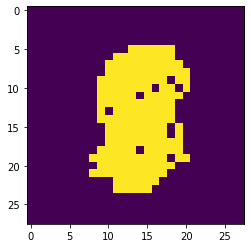

  3%|▎         | 8/235 [00:00<01:11,  3.17it/s]

tensor([0.3663, 0.2043, 0.2974], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3671, 0.2048, 0.2980], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-1.1143e-18, -8.2652e-19, -7.5188e-19], device='cuda:1')
Epoch: [24/100], Batch: [1/235], train accuracy: 0.898438, loss: 0.002360


 42%|████▏     | 98/235 [00:02<00:03, 43.50it/s]

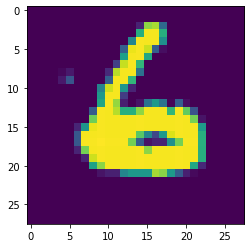

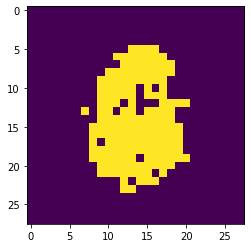

 46%|████▋     | 109/235 [00:03<00:03, 32.56it/s]

tensor([0.3720, 0.2058, 0.2986], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3720, 0.2058, 0.2986], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-3.2602e-28, -2.4715e-28, -2.2047e-28], device='cuda:1')
Epoch: [24/100], Batch: [101/235], train accuracy: 0.921875, loss: 0.001171


 85%|████████▍ | 199/235 [00:05<00:00, 42.79it/s]

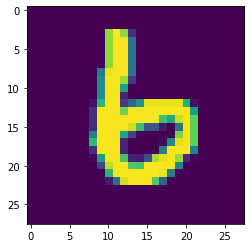

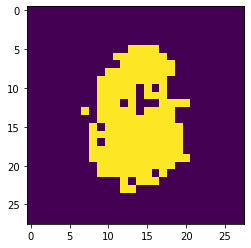

 89%|████████▉ | 210/235 [00:05<00:00, 32.31it/s]

tensor([0.3852, 0.2177, 0.3091], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3837, 0.2166, 0.3081], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([4.8843e-08, 3.8407e-08, 3.3270e-08], device='cuda:1')
Epoch: [24/100], Batch: [201/235], train accuracy: 0.894531, loss: 0.001489


100%|██████████| 235/235 [00:06<00:00, 38.24it/s]

Epoch: [24/100], train loss: 0.001362



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [24/100], test accuracy: 0.916700, loss: 0.369791


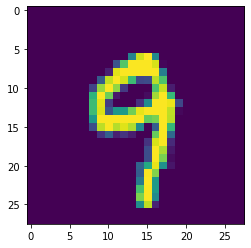

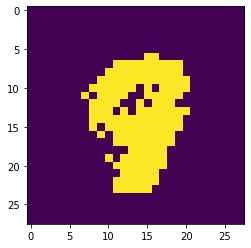

  3%|▎         | 8/235 [00:00<00:59,  3.79it/s]

tensor([0.3701, 0.2061, 0.2989], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3700, 0.2060, 0.2988], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-5.4449e-29, -4.0772e-29, -3.6127e-29], device='cuda:1')
Epoch: [25/100], Batch: [1/235], train accuracy: 0.949219, loss: 0.000835


 41%|████      | 96/235 [00:02<00:03, 43.31it/s]

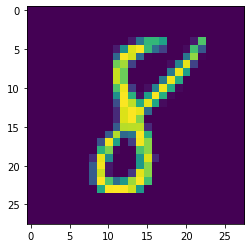

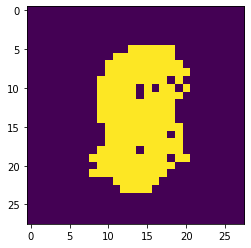

 46%|████▌     | 108/235 [00:02<00:03, 32.85it/s]

tensor([0.3832, 0.2163, 0.3081], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3832, 0.2163, 0.3081], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [25/100], Batch: [101/235], train accuracy: 0.929688, loss: 0.001037


 84%|████████▍ | 198/235 [00:04<00:00, 44.90it/s]

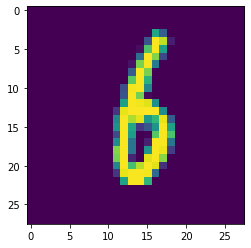

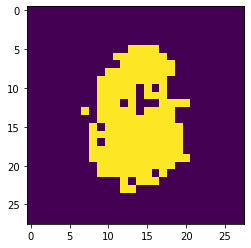

 89%|████████▉ | 209/235 [00:05<00:00, 33.79it/s]

tensor([0.3831, 0.2162, 0.3080], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3830, 0.2161, 0.3079], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-7.4409e-43, -5.9415e-43, -5.4090e-43], device='cuda:1')
Epoch: [25/100], Batch: [201/235], train accuracy: 0.941406, loss: 0.000920


100%|██████████| 235/235 [00:05<00:00, 39.70it/s]

Epoch: [25/100], train loss: 0.001317



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [25/100], test accuracy: 0.909600, loss: 0.400181


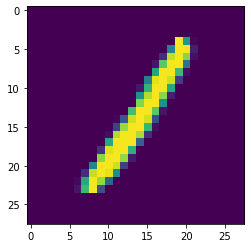

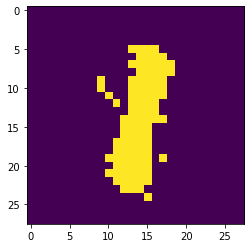

  3%|▎         | 8/235 [00:00<01:09,  3.29it/s]

tensor([0.3925, 0.2223, 0.3136], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3925, 0.2223, 0.3136], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [26/100], Batch: [1/235], train accuracy: 0.937500, loss: 0.001264


 41%|████      | 96/235 [00:02<00:03, 43.40it/s]

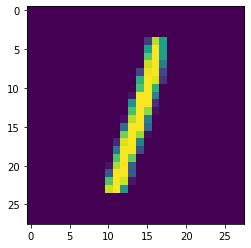

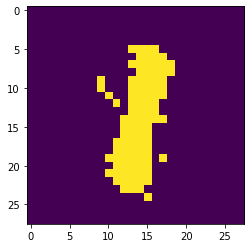

 46%|████▌     | 108/235 [00:02<00:03, 32.87it/s]

tensor([0.3802, 0.2100, 0.3023], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3802, 0.2100, 0.3023], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-7.7071e-44, -7.1466e-44, -6.5861e-44], device='cuda:1')
Epoch: [26/100], Batch: [101/235], train accuracy: 0.875000, loss: 0.001811


 85%|████████▍ | 199/235 [00:04<00:00, 46.18it/s]

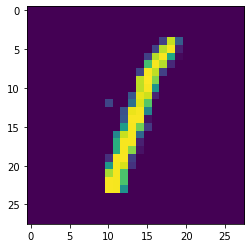

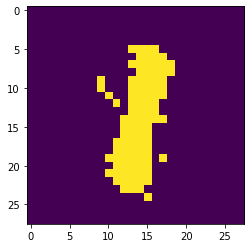

 89%|████████▉ | 210/235 [00:05<00:00, 33.38it/s]

tensor([0.3789, 0.2090, 0.3016], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3789, 0.2089, 0.3016], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-1.9562e-23, -1.4625e-23, -1.3072e-23], device='cuda:1')
Epoch: [26/100], Batch: [201/235], train accuracy: 0.917969, loss: 0.001374


100%|██████████| 235/235 [00:05<00:00, 39.51it/s]

Epoch: [26/100], train loss: 0.001467



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [26/100], test accuracy: 0.890200, loss: 0.461443


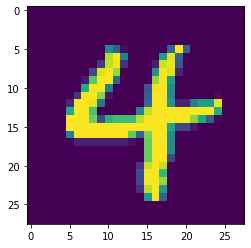

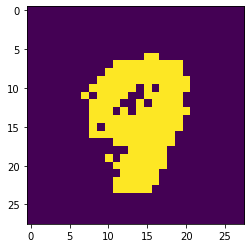

  3%|▎         | 8/235 [00:00<00:58,  3.85it/s]

tensor([0.3775, 0.2075, 0.3000], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3774, 0.2073, 0.2998], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-5.3525e-25, -4.1252e-25, -3.7470e-25], device='cuda:1')
Epoch: [27/100], Batch: [1/235], train accuracy: 0.859375, loss: 0.001762


 42%|████▏     | 98/235 [00:02<00:03, 44.83it/s]

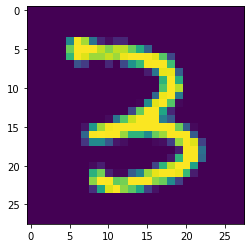

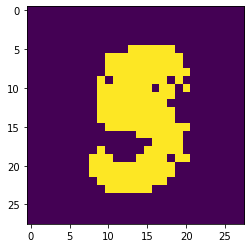

 47%|████▋     | 110/235 [00:02<00:03, 32.67it/s]

tensor([0.3824, 0.2120, 0.3049], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3824, 0.2120, 0.3049], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-2.0863e-27, -1.4645e-27, -1.3713e-27], device='cuda:1')
Epoch: [27/100], Batch: [101/235], train accuracy: 0.917969, loss: 0.001653


 85%|████████▌ | 200/235 [00:04<00:00, 45.21it/s]

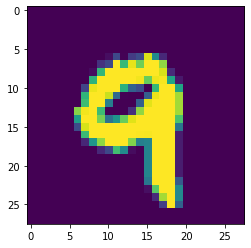

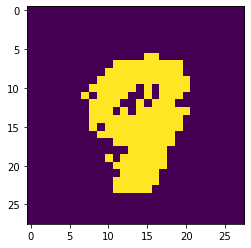

 89%|████████▉ | 210/235 [00:05<00:00, 33.07it/s]

tensor([0.3786, 0.2093, 0.3022], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3786, 0.2093, 0.3022], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-8.2174e-15, -6.0272e-15, -5.5339e-15], device='cuda:1')
Epoch: [27/100], Batch: [201/235], train accuracy: 0.902344, loss: 0.001441


100%|██████████| 235/235 [00:05<00:00, 39.91it/s]

Epoch: [27/100], train loss: 0.001460



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [27/100], test accuracy: 0.907000, loss: 0.375838


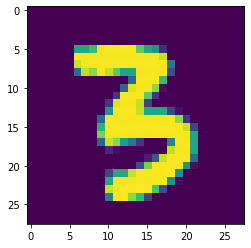

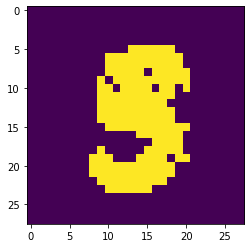

  3%|▎         | 8/235 [00:00<01:09,  3.28it/s]

tensor([0.3790, 0.2095, 0.3024], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3792, 0.2097, 0.3025], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([1.3736e-25, 1.0600e-25, 9.5834e-26], device='cuda:1')
Epoch: [28/100], Batch: [1/235], train accuracy: 0.906250, loss: 0.001420


 41%|████      | 96/235 [00:02<00:03, 42.87it/s]

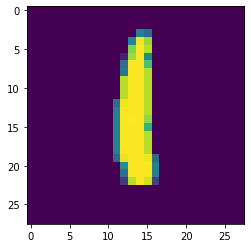

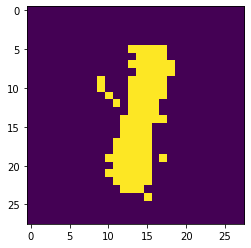

 46%|████▌     | 108/235 [00:02<00:03, 32.89it/s]

tensor([0.3869, 0.2152, 0.3066], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3870, 0.2152, 0.3067], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-7.0507e-31, -5.2762e-31, -4.6219e-31], device='cuda:1')
Epoch: [28/100], Batch: [101/235], train accuracy: 0.933594, loss: 0.000952


 83%|████████▎ | 196/235 [00:04<00:00, 45.05it/s]

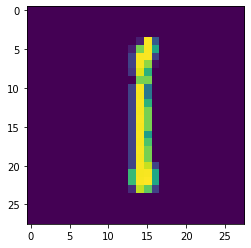

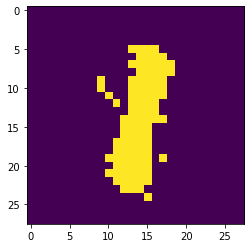

 89%|████████▊ | 208/235 [00:05<00:00, 33.49it/s]

tensor([0.3773, 0.2081, 0.2999], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3763, 0.2072, 0.2991], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([1.0599e-08, 8.5924e-09, 7.6899e-09], device='cuda:1')
Epoch: [28/100], Batch: [201/235], train accuracy: 0.894531, loss: 0.001715


100%|██████████| 235/235 [00:05<00:00, 39.55it/s]

Epoch: [28/100], train loss: 0.001535



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [28/100], test accuracy: 0.884200, loss: 0.537238


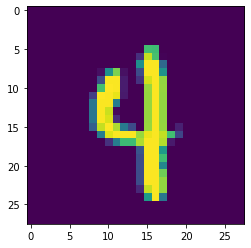

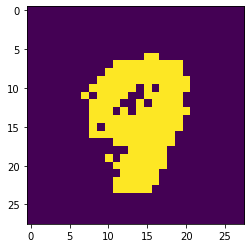

  3%|▎         | 8/235 [00:00<01:01,  3.71it/s]

tensor([0.4045, 0.2289, 0.3191], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.4046, 0.2290, 0.3192], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([2.3533e-38, 1.7953e-38, 1.5887e-38], device='cuda:1')
Epoch: [29/100], Batch: [1/235], train accuracy: 0.906250, loss: 0.001505


 42%|████▏     | 98/235 [00:02<00:03, 43.00it/s]

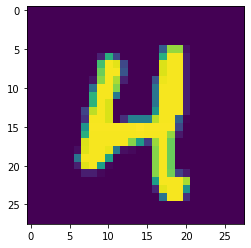

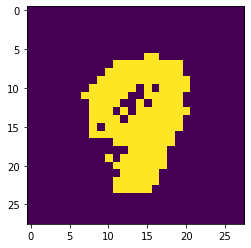

 46%|████▋     | 109/235 [00:02<00:03, 32.34it/s]

tensor([0.3797, 0.2083, 0.3019], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3790, 0.2078, 0.3014], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([6.8387e-09, 4.6939e-09, 4.3445e-09], device='cuda:1')
Epoch: [29/100], Batch: [101/235], train accuracy: 0.871094, loss: 0.003510


 85%|████████▍ | 199/235 [00:04<00:00, 45.81it/s]

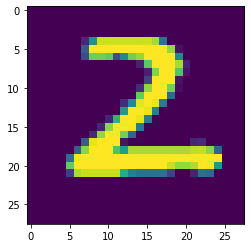

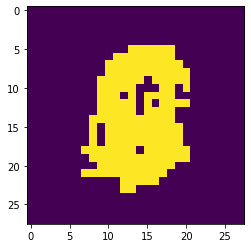

 89%|████████▉ | 210/235 [00:05<00:00, 32.94it/s]

tensor([0.3981, 0.2233, 0.3137], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3984, 0.2236, 0.3139], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([1.1015e-36, 8.3101e-37, 7.4512e-37], device='cuda:1')
Epoch: [29/100], Batch: [201/235], train accuracy: 0.660156, loss: 0.004393


100%|██████████| 235/235 [00:05<00:00, 39.27it/s]

Epoch: [29/100], train loss: 0.003117



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [29/100], test accuracy: 0.524300, loss: 1.784403


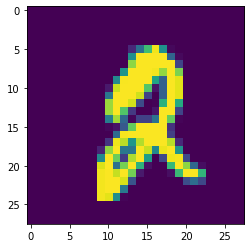

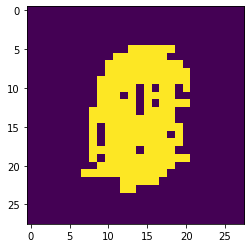

  3%|▎         | 8/235 [00:00<01:10,  3.21it/s]

tensor([0.3995, 0.2248, 0.3149], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.3988, 0.2243, 0.3144], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([1.3831e-08, 9.7060e-09, 8.9426e-09], device='cuda:1')
Epoch: [30/100], Batch: [1/235], train accuracy: 0.558594, loss: 0.007150


 41%|████▏     | 97/235 [00:02<00:03, 45.26it/s]

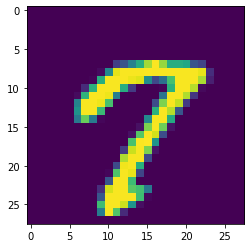

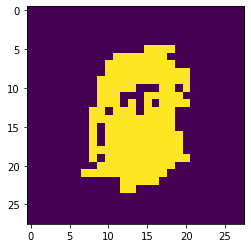

 46%|████▌     | 108/235 [00:02<00:03, 33.32it/s]

tensor([0.4940, 0.3200, 0.4067], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.4970, 0.3227, 0.4092], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [30/100], Batch: [101/235], train accuracy: 0.152344, loss: 0.010342


 84%|████████▍ | 197/235 [00:04<00:00, 45.39it/s]

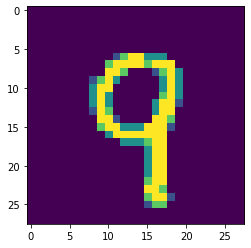

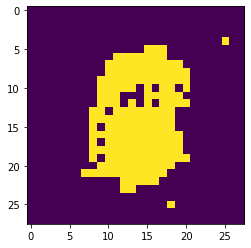

 89%|████████▉ | 209/235 [00:05<00:00, 33.78it/s]

tensor([0.5278, 0.3435, 0.4122], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5280, 0.3436, 0.4124], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [30/100], Batch: [201/235], train accuracy: 0.144531, loss: 0.009024


100%|██████████| 235/235 [00:06<00:00, 39.11it/s]

Epoch: [30/100], train loss: 0.009534



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [30/100], test accuracy: 0.113500, loss: 2.320488


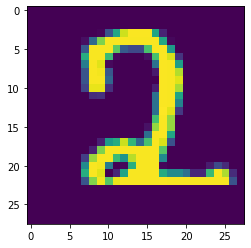

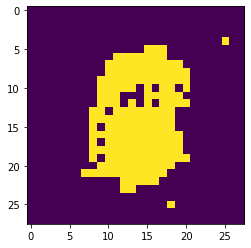

  3%|▎         | 8/235 [00:00<01:00,  3.73it/s]

tensor([0.5296, 0.3451, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3451, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [31/100], Batch: [1/235], train accuracy: 0.113281, loss: 0.009058


 42%|████▏     | 98/235 [00:02<00:03, 43.81it/s]

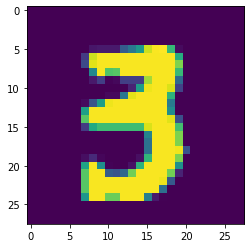

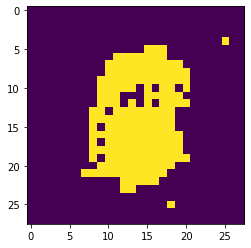

 47%|████▋     | 110/235 [00:02<00:03, 33.05it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [31/100], Batch: [101/235], train accuracy: 0.082031, loss: 0.009070


 85%|████████▌ | 200/235 [00:04<00:00, 44.07it/s]

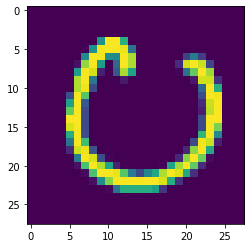

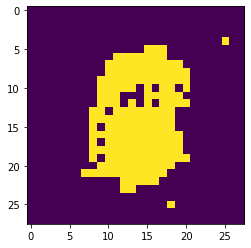

 89%|████████▉ | 210/235 [00:05<00:00, 32.23it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [31/100], Batch: [201/235], train accuracy: 0.109375, loss: 0.008986


100%|██████████| 235/235 [00:06<00:00, 39.15it/s]

Epoch: [31/100], train loss: 0.009393



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [31/100], test accuracy: 0.113500, loss: 2.306313


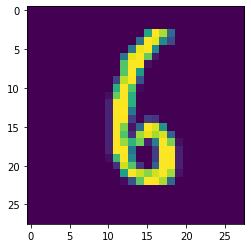

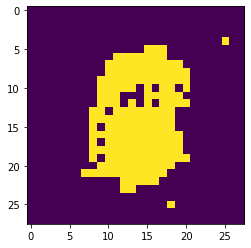

  3%|▎         | 8/235 [00:00<01:02,  3.64it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [32/100], Batch: [1/235], train accuracy: 0.097656, loss: 0.008998


 42%|████▏     | 99/235 [00:02<00:03, 45.31it/s]

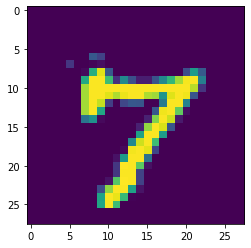

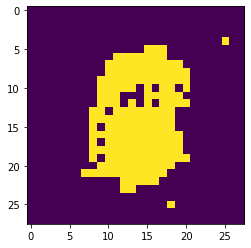

 47%|████▋     | 110/235 [00:02<00:03, 33.14it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [32/100], Batch: [101/235], train accuracy: 0.085938, loss: 0.009041


 85%|████████▌ | 200/235 [00:04<00:00, 44.96it/s]

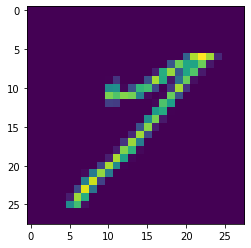

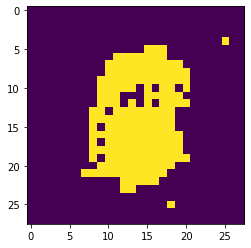

 89%|████████▉ | 210/235 [00:05<00:00, 33.42it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [32/100], Batch: [201/235], train accuracy: 0.148438, loss: 0.008985


100%|██████████| 235/235 [00:05<00:00, 40.12it/s]

Epoch: [32/100], train loss: 0.009058



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [32/100], test accuracy: 0.098200, loss: 2.315168


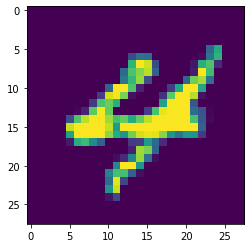

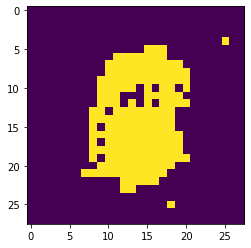

  3%|▎         | 8/235 [00:00<00:58,  3.85it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [33/100], Batch: [1/235], train accuracy: 0.093750, loss: 0.009067


 42%|████▏     | 98/235 [00:02<00:03, 43.84it/s]

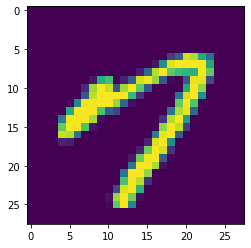

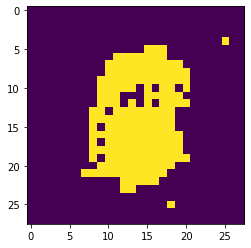

 46%|████▌     | 108/235 [00:02<00:04, 30.49it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [33/100], Batch: [101/235], train accuracy: 0.085938, loss: 0.009029


 83%|████████▎ | 196/235 [00:04<00:00, 44.69it/s]

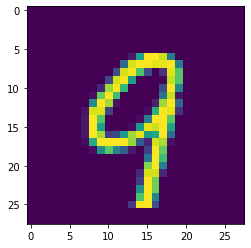

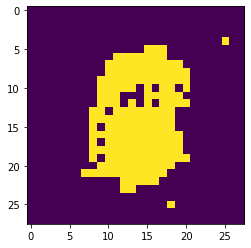

 89%|████████▊ | 208/235 [00:05<00:00, 32.88it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [33/100], Batch: [201/235], train accuracy: 0.097656, loss: 0.009039


100%|██████████| 235/235 [00:05<00:00, 39.28it/s]

Epoch: [33/100], train loss: 0.009057



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [33/100], test accuracy: 0.098200, loss: 2.310269


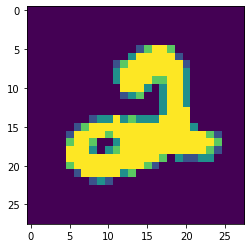

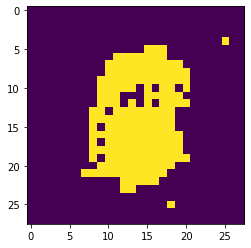

  3%|▎         | 8/235 [00:00<01:09,  3.26it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [34/100], Batch: [1/235], train accuracy: 0.085938, loss: 0.009005


 42%|████▏     | 98/235 [00:02<00:03, 43.41it/s]

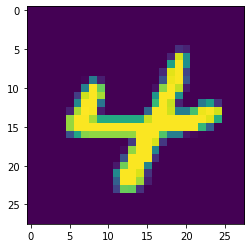

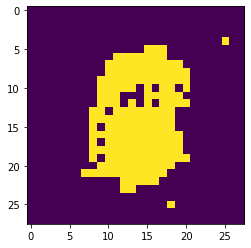

 46%|████▋     | 109/235 [00:03<00:03, 32.08it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [34/100], Batch: [101/235], train accuracy: 0.144531, loss: 0.008948


 85%|████████▍ | 199/235 [00:05<00:00, 42.86it/s]

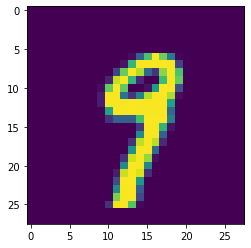

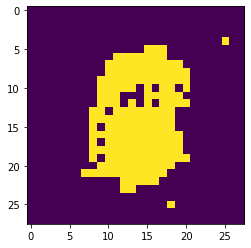

 89%|████████▉ | 210/235 [00:05<00:00, 32.20it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [34/100], Batch: [201/235], train accuracy: 0.085938, loss: 0.008997


100%|██████████| 235/235 [00:06<00:00, 38.27it/s]

Epoch: [34/100], train loss: 0.009059



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [34/100], test accuracy: 0.095800, loss: 2.311447


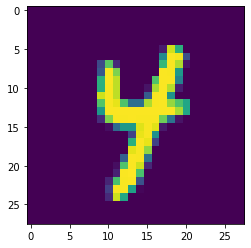

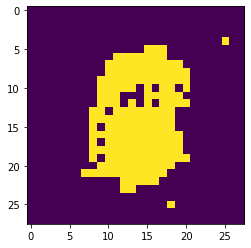

  3%|▎         | 8/235 [00:00<00:59,  3.79it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [35/100], Batch: [1/235], train accuracy: 0.113281, loss: 0.009055


 41%|████      | 96/235 [00:02<00:03, 43.74it/s]

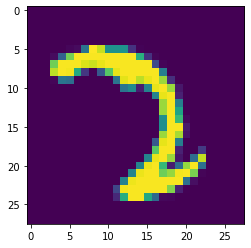

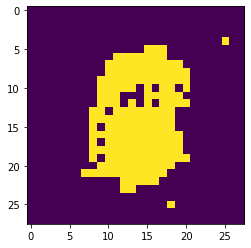

 46%|████▌     | 108/235 [00:02<00:03, 33.00it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [35/100], Batch: [101/235], train accuracy: 0.097656, loss: 0.009017


 85%|████████▌ | 200/235 [00:04<00:00, 44.64it/s]

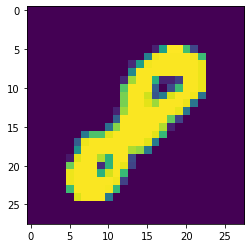

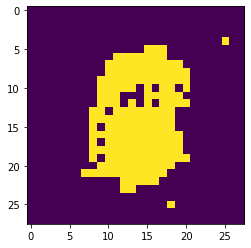

 89%|████████▉ | 210/235 [00:05<00:00, 32.96it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [35/100], Batch: [201/235], train accuracy: 0.132812, loss: 0.009010


100%|██████████| 235/235 [00:05<00:00, 39.51it/s]

Epoch: [35/100], train loss: 0.009060



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [35/100], test accuracy: 0.102800, loss: 2.316150


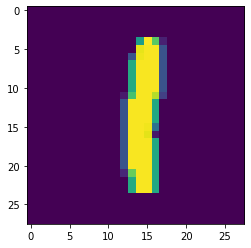

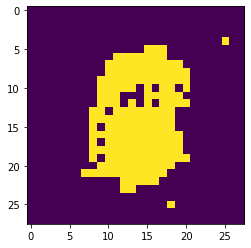

  3%|▎         | 8/235 [00:00<01:08,  3.29it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [36/100], Batch: [1/235], train accuracy: 0.101562, loss: 0.009065


 43%|████▎     | 100/235 [00:02<00:03, 43.79it/s]

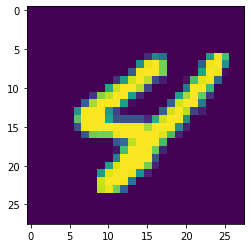

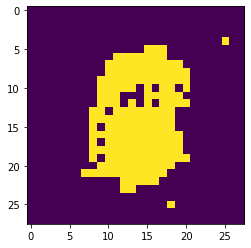

 47%|████▋     | 110/235 [00:02<00:03, 33.22it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [36/100], Batch: [101/235], train accuracy: 0.101562, loss: 0.009033


 85%|████████▌ | 200/235 [00:04<00:00, 45.36it/s]

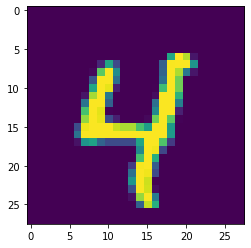

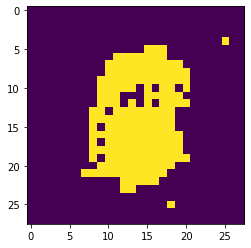

 89%|████████▉ | 210/235 [00:05<00:00, 33.63it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [36/100], Batch: [201/235], train accuracy: 0.085938, loss: 0.009058


100%|██████████| 235/235 [00:05<00:00, 39.65it/s]

Epoch: [36/100], train loss: 0.009057



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [36/100], test accuracy: 0.102800, loss: 2.313146


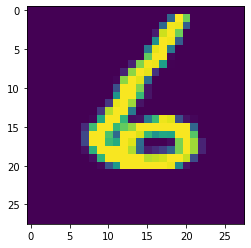

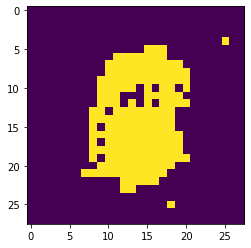

  3%|▎         | 8/235 [00:00<00:59,  3.82it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [37/100], Batch: [1/235], train accuracy: 0.121094, loss: 0.008992


 42%|████▏     | 99/235 [00:02<00:03, 43.48it/s]

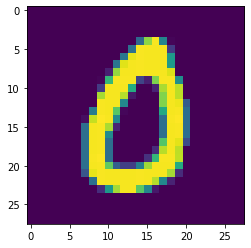

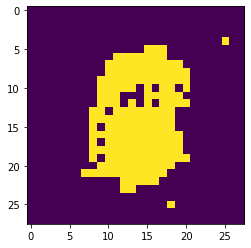

 47%|████▋     | 110/235 [00:02<00:03, 32.57it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [37/100], Batch: [101/235], train accuracy: 0.085938, loss: 0.009023


 85%|████████▌ | 200/235 [00:04<00:00, 45.13it/s]

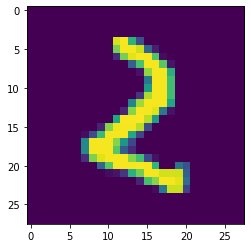

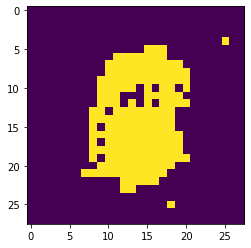

 89%|████████▉ | 210/235 [00:05<00:00, 32.77it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [37/100], Batch: [201/235], train accuracy: 0.082031, loss: 0.009082


100%|██████████| 235/235 [00:05<00:00, 39.45it/s]

Epoch: [37/100], train loss: 0.009053



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [37/100], test accuracy: 0.098200, loss: 2.316993


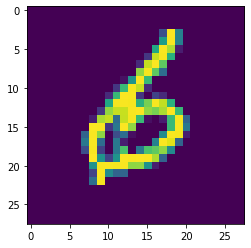

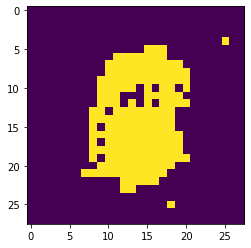

  3%|▎         | 8/235 [00:00<01:10,  3.20it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [38/100], Batch: [1/235], train accuracy: 0.101562, loss: 0.009085


 43%|████▎     | 100/235 [00:02<00:03, 37.95it/s]

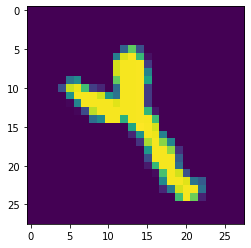

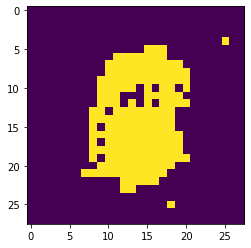

 47%|████▋     | 110/235 [00:03<00:04, 28.92it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [38/100], Batch: [101/235], train accuracy: 0.089844, loss: 0.009049


 85%|████████▌ | 200/235 [00:05<00:00, 42.74it/s]

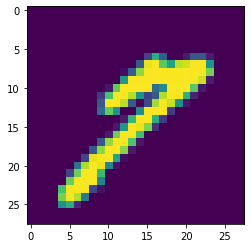

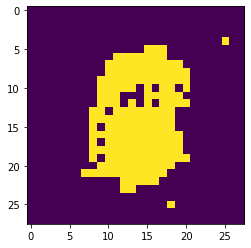

 89%|████████▉ | 210/235 [00:05<00:00, 32.61it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [38/100], Batch: [201/235], train accuracy: 0.074219, loss: 0.009065


100%|██████████| 235/235 [00:06<00:00, 37.02it/s]

Epoch: [38/100], train loss: 0.009058



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [38/100], test accuracy: 0.102800, loss: 2.313317


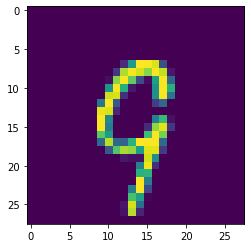

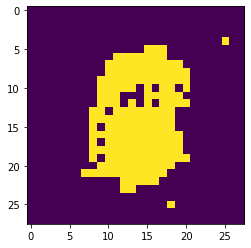

  3%|▎         | 8/235 [00:00<00:54,  4.17it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [39/100], Batch: [1/235], train accuracy: 0.105469, loss: 0.009017


 42%|████▏     | 98/235 [00:02<00:03, 44.81it/s]

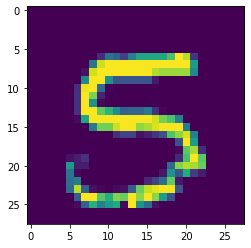

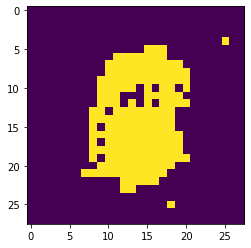

 47%|████▋     | 110/235 [00:02<00:03, 32.41it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [39/100], Batch: [101/235], train accuracy: 0.121094, loss: 0.008998


 85%|████████▌ | 200/235 [00:04<00:00, 44.77it/s]

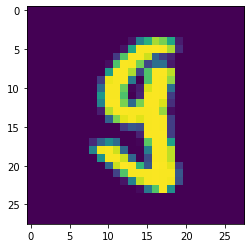

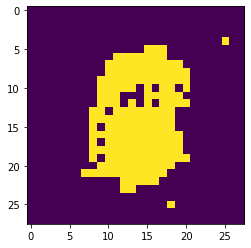

 89%|████████▉ | 210/235 [00:05<00:00, 33.14it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [39/100], Batch: [201/235], train accuracy: 0.101562, loss: 0.009063


100%|██████████| 235/235 [00:05<00:00, 39.86it/s]

Epoch: [39/100], train loss: 0.009057



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [39/100], test accuracy: 0.102800, loss: 2.309390


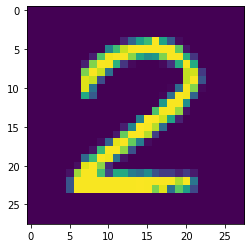

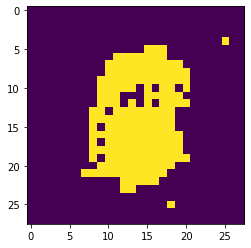

  3%|▎         | 8/235 [00:00<01:08,  3.30it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [40/100], Batch: [1/235], train accuracy: 0.082031, loss: 0.009005


 42%|████▏     | 98/235 [00:02<00:03, 43.42it/s]

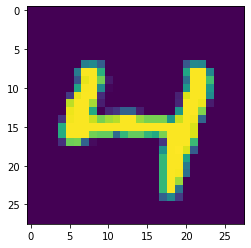

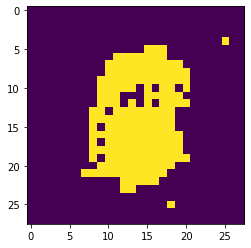

 46%|████▋     | 109/235 [00:03<00:03, 32.24it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [40/100], Batch: [101/235], train accuracy: 0.132812, loss: 0.009025


 85%|████████▍ | 199/235 [00:05<00:00, 42.84it/s]

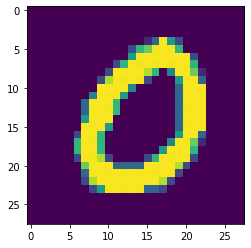

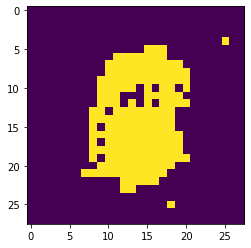

 89%|████████▉ | 210/235 [00:05<00:00, 32.23it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [40/100], Batch: [201/235], train accuracy: 0.082031, loss: 0.009052


100%|██████████| 235/235 [00:06<00:00, 38.22it/s]

Epoch: [40/100], train loss: 0.009057



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [40/100], test accuracy: 0.113500, loss: 2.307412


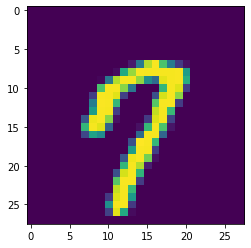

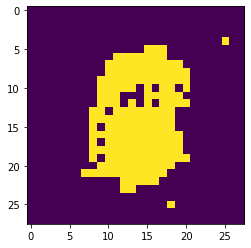

  3%|▎         | 8/235 [00:00<00:58,  3.89it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [41/100], Batch: [1/235], train accuracy: 0.089844, loss: 0.009009


 42%|████▏     | 99/235 [00:02<00:03, 42.99it/s]

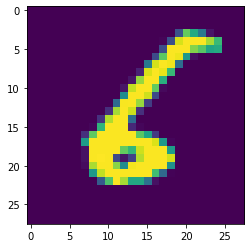

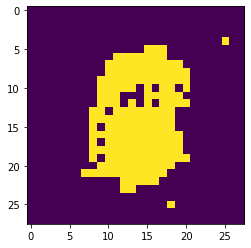

 47%|████▋     | 110/235 [00:02<00:03, 32.29it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [41/100], Batch: [101/235], train accuracy: 0.097656, loss: 0.009039


 85%|████████▌ | 200/235 [00:05<00:00, 44.00it/s]

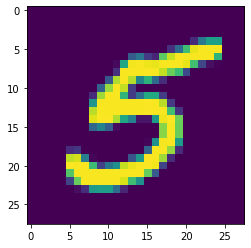

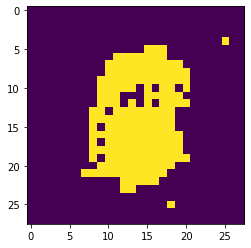

 89%|████████▉ | 210/235 [00:05<00:00, 32.86it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [41/100], Batch: [201/235], train accuracy: 0.097656, loss: 0.009118


100%|██████████| 235/235 [00:05<00:00, 39.27it/s]

Epoch: [41/100], train loss: 0.009056



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [41/100], test accuracy: 0.113500, loss: 2.314554


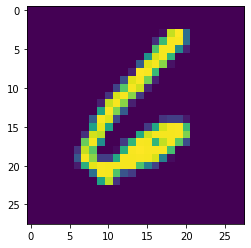

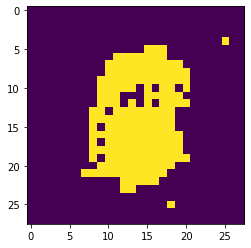

  3%|▎         | 8/235 [00:00<01:09,  3.25it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [42/100], Batch: [1/235], train accuracy: 0.074219, loss: 0.009045


 42%|████▏     | 98/235 [00:02<00:03, 44.43it/s]

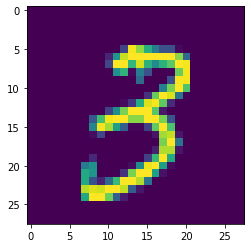

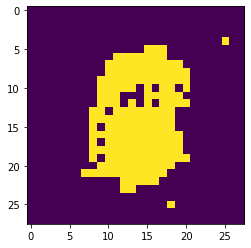

 46%|████▋     | 109/235 [00:02<00:03, 32.84it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [42/100], Batch: [101/235], train accuracy: 0.109375, loss: 0.009056


 85%|████████▍ | 199/235 [00:04<00:00, 44.75it/s]

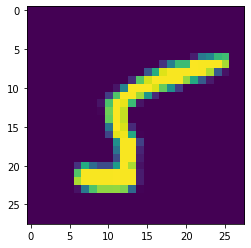

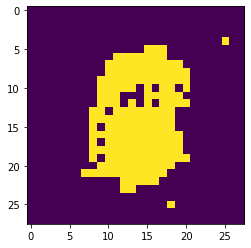

 89%|████████▉ | 210/235 [00:05<00:00, 32.82it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [42/100], Batch: [201/235], train accuracy: 0.074219, loss: 0.009000


100%|██████████| 235/235 [00:05<00:00, 39.29it/s]

Epoch: [42/100], train loss: 0.009055



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [42/100], test accuracy: 0.101000, loss: 2.314963


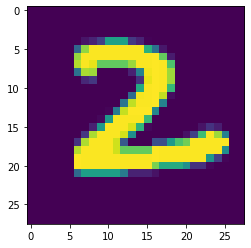

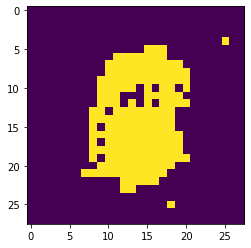

  3%|▎         | 8/235 [00:00<01:00,  3.77it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [43/100], Batch: [1/235], train accuracy: 0.105469, loss: 0.009027


 42%|████▏     | 98/235 [00:02<00:03, 45.06it/s]

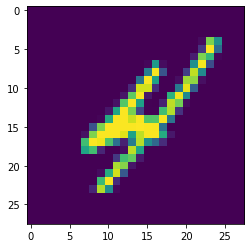

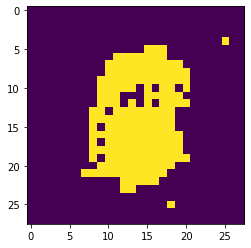

 46%|████▋     | 109/235 [00:02<00:03, 32.90it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [43/100], Batch: [101/235], train accuracy: 0.128906, loss: 0.009016


 85%|████████▍ | 199/235 [00:04<00:00, 45.86it/s]

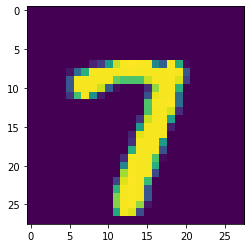

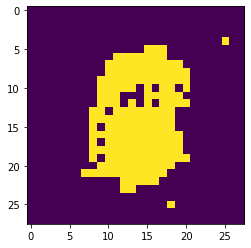

 89%|████████▉ | 210/235 [00:05<00:00, 33.17it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [43/100], Batch: [201/235], train accuracy: 0.128906, loss: 0.009045


100%|██████████| 235/235 [00:05<00:00, 39.65it/s]

Epoch: [43/100], train loss: 0.009056



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [43/100], test accuracy: 0.101000, loss: 2.308133


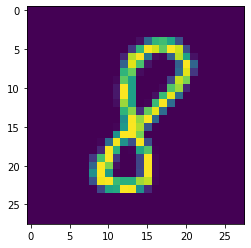

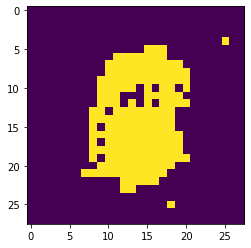

  3%|▎         | 8/235 [00:00<01:07,  3.36it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [44/100], Batch: [1/235], train accuracy: 0.082031, loss: 0.009026


 42%|████▏     | 98/235 [00:02<00:03, 43.67it/s]

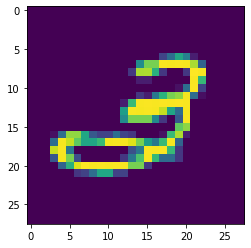

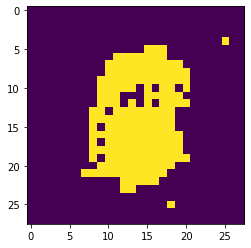

 46%|████▋     | 109/235 [00:02<00:03, 33.74it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [44/100], Batch: [101/235], train accuracy: 0.093750, loss: 0.009020


 85%|████████▌ | 200/235 [00:04<00:00, 44.81it/s]

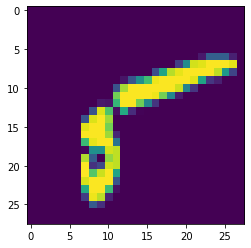

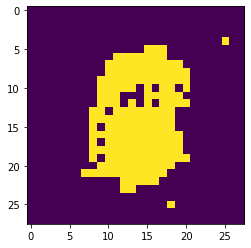

 89%|████████▉ | 210/235 [00:05<00:00, 33.33it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [44/100], Batch: [201/235], train accuracy: 0.093750, loss: 0.009072


100%|██████████| 235/235 [00:05<00:00, 39.68it/s]

Epoch: [44/100], train loss: 0.009059



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [44/100], test accuracy: 0.101000, loss: 2.310236


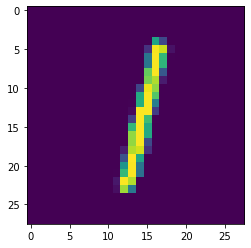

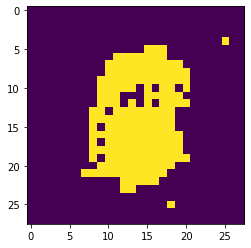

  3%|▎         | 8/235 [00:00<00:59,  3.84it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [45/100], Batch: [1/235], train accuracy: 0.082031, loss: 0.009012


 42%|████▏     | 98/235 [00:02<00:03, 43.70it/s]

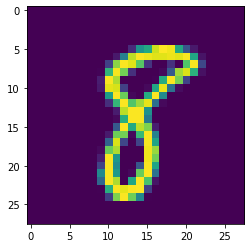

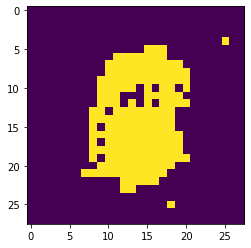

 46%|████▋     | 109/235 [00:02<00:03, 33.62it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [45/100], Batch: [101/235], train accuracy: 0.105469, loss: 0.009029


 85%|████████▍ | 199/235 [00:04<00:00, 45.36it/s]

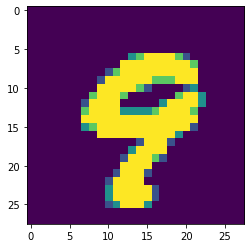

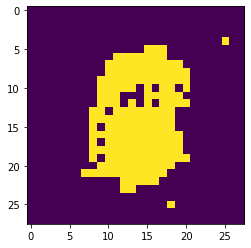

 89%|████████▉ | 210/235 [00:05<00:00, 33.18it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [45/100], Batch: [201/235], train accuracy: 0.097656, loss: 0.009084


100%|██████████| 235/235 [00:05<00:00, 39.80it/s]

Epoch: [45/100], train loss: 0.009053



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [45/100], test accuracy: 0.113500, loss: 2.308723


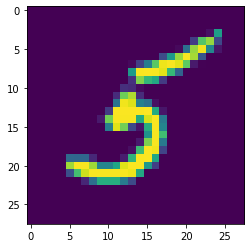

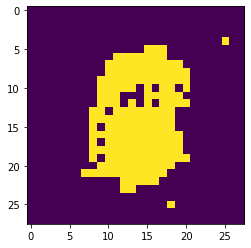

  3%|▎         | 8/235 [00:00<01:08,  3.33it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [46/100], Batch: [1/235], train accuracy: 0.117188, loss: 0.009019


 42%|████▏     | 99/235 [00:02<00:03, 43.52it/s]

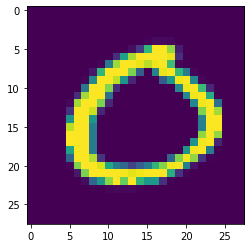

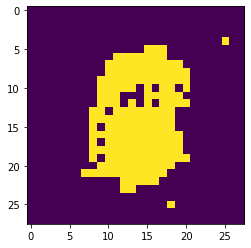

 47%|████▋     | 110/235 [00:03<00:03, 32.76it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [46/100], Batch: [101/235], train accuracy: 0.160156, loss: 0.008950


 85%|████████▌ | 200/235 [00:05<00:00, 45.55it/s]

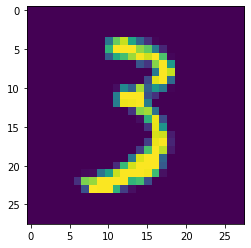

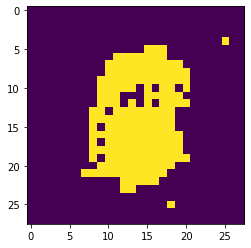

 89%|████████▉ | 210/235 [00:05<00:00, 33.06it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [46/100], Batch: [201/235], train accuracy: 0.101562, loss: 0.009029


100%|██████████| 235/235 [00:05<00:00, 39.22it/s]

Epoch: [46/100], train loss: 0.009054



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [46/100], test accuracy: 0.102800, loss: 2.318679


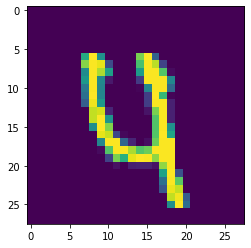

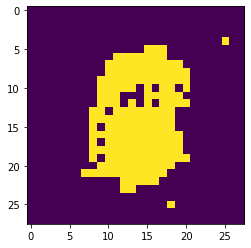

  3%|▎         | 8/235 [00:00<01:01,  3.72it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [47/100], Batch: [1/235], train accuracy: 0.136719, loss: 0.008999


 41%|████▏     | 97/235 [00:02<00:03, 44.64it/s]

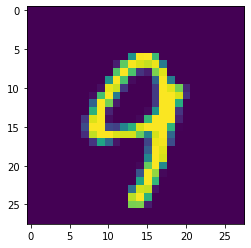

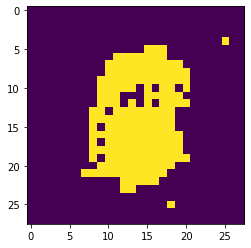

 46%|████▌     | 108/235 [00:02<00:03, 32.74it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [47/100], Batch: [101/235], train accuracy: 0.093750, loss: 0.009082


 85%|████████▌ | 200/235 [00:04<00:00, 44.99it/s]

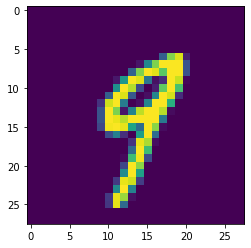

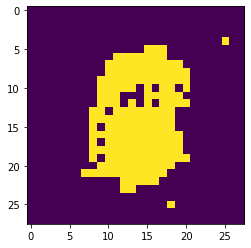

 89%|████████▉ | 210/235 [00:05<00:00, 33.31it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [47/100], Batch: [201/235], train accuracy: 0.117188, loss: 0.008997


100%|██████████| 235/235 [00:05<00:00, 39.36it/s]

Epoch: [47/100], train loss: 0.009055



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [47/100], test accuracy: 0.101000, loss: 2.309072


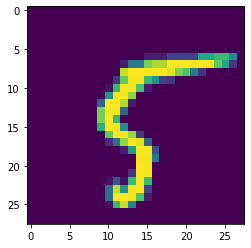

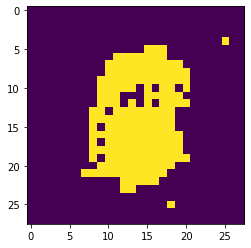

  3%|▎         | 8/235 [00:00<01:11,  3.18it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [48/100], Batch: [1/235], train accuracy: 0.054688, loss: 0.009019


 42%|████▏     | 98/235 [00:02<00:03, 43.91it/s]

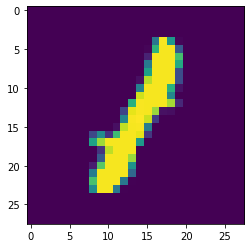

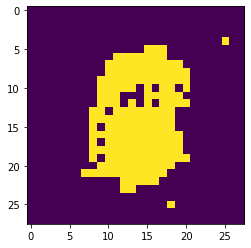

 47%|████▋     | 110/235 [00:03<00:03, 33.24it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [48/100], Batch: [101/235], train accuracy: 0.105469, loss: 0.009010


 85%|████████▌ | 200/235 [00:04<00:00, 44.54it/s]

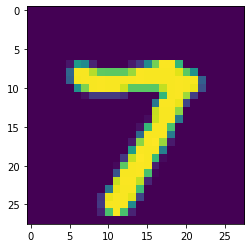

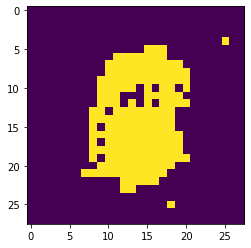

 89%|████████▉ | 210/235 [00:05<00:00, 33.39it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [48/100], Batch: [201/235], train accuracy: 0.097656, loss: 0.009021


100%|██████████| 235/235 [00:05<00:00, 39.33it/s]

Epoch: [48/100], train loss: 0.009053



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [48/100], test accuracy: 0.113500, loss: 2.311840


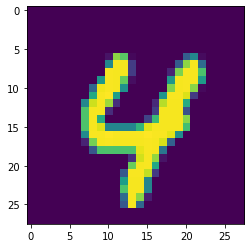

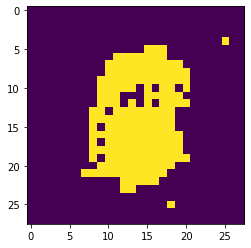

  3%|▎         | 8/235 [00:00<00:59,  3.82it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [49/100], Batch: [1/235], train accuracy: 0.109375, loss: 0.009032


 42%|████▏     | 98/235 [00:02<00:03, 43.66it/s]

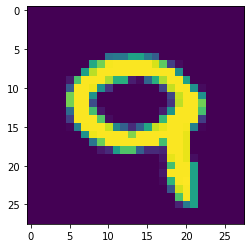

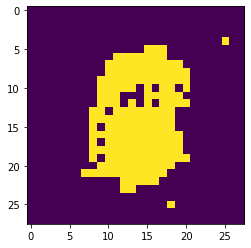

 46%|████▋     | 109/235 [00:02<00:03, 32.39it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [49/100], Batch: [101/235], train accuracy: 0.066406, loss: 0.009049


 85%|████████▍ | 199/235 [00:05<00:00, 42.81it/s]

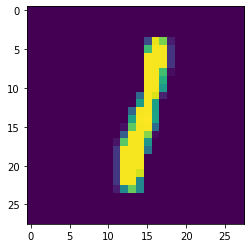

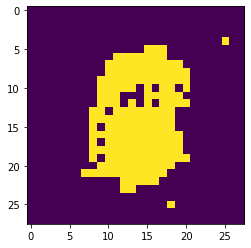

 89%|████████▉ | 210/235 [00:05<00:00, 32.41it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [49/100], Batch: [201/235], train accuracy: 0.109375, loss: 0.009043


100%|██████████| 235/235 [00:06<00:00, 38.71it/s]

Epoch: [49/100], train loss: 0.009056



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [49/100], test accuracy: 0.095800, loss: 2.311622


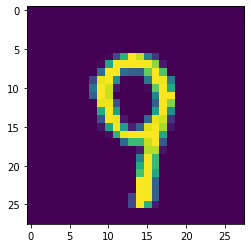

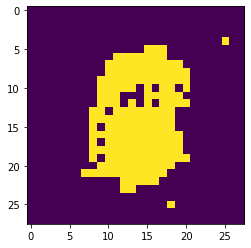

  3%|▎         | 8/235 [00:00<01:08,  3.31it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [50/100], Batch: [1/235], train accuracy: 0.128906, loss: 0.009008


 41%|████▏     | 97/235 [00:02<00:03, 44.51it/s]

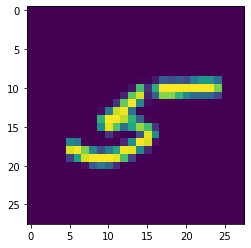

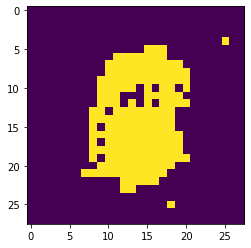

 46%|████▋     | 109/235 [00:02<00:03, 33.37it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [50/100], Batch: [101/235], train accuracy: 0.113281, loss: 0.009043


 85%|████████▍ | 199/235 [00:04<00:00, 43.99it/s]

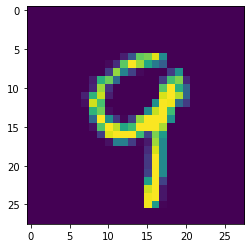

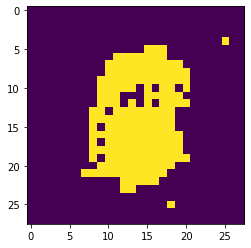

 89%|████████▉ | 210/235 [00:05<00:00, 32.76it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [50/100], Batch: [201/235], train accuracy: 0.093750, loss: 0.009058


100%|██████████| 235/235 [00:05<00:00, 39.29it/s]

Epoch: [50/100], train loss: 0.009055



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [50/100], test accuracy: 0.098200, loss: 2.318258


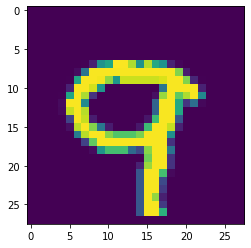

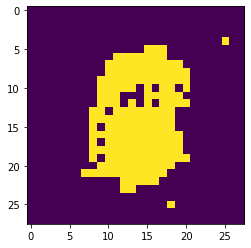

  3%|▎         | 8/235 [00:00<00:59,  3.83it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [51/100], Batch: [1/235], train accuracy: 0.074219, loss: 0.009072


 42%|████▏     | 98/235 [00:02<00:03, 44.31it/s]

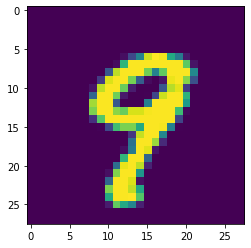

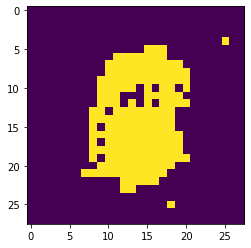

 46%|████▋     | 109/235 [00:02<00:03, 33.17it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [51/100], Batch: [101/235], train accuracy: 0.105469, loss: 0.009012


 85%|████████▍ | 199/235 [00:04<00:00, 45.55it/s]

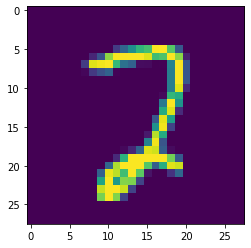

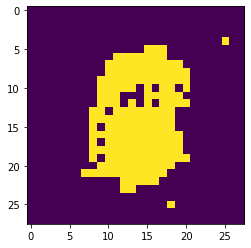

 89%|████████▉ | 210/235 [00:05<00:00, 33.18it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [51/100], Batch: [201/235], train accuracy: 0.101562, loss: 0.009063


100%|██████████| 235/235 [00:05<00:00, 39.72it/s]

Epoch: [51/100], train loss: 0.009059



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [51/100], test accuracy: 0.101000, loss: 2.310429


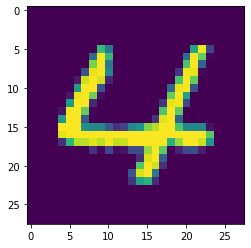

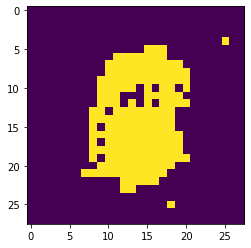

  3%|▎         | 8/235 [00:00<01:08,  3.29it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [52/100], Batch: [1/235], train accuracy: 0.128906, loss: 0.008989


 42%|████▏     | 98/235 [00:02<00:03, 44.33it/s]

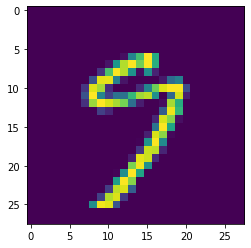

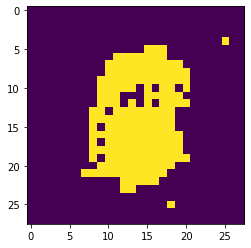

 46%|████▋     | 109/235 [00:02<00:03, 33.48it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [52/100], Batch: [101/235], train accuracy: 0.082031, loss: 0.009031


 85%|████████▍ | 199/235 [00:04<00:00, 46.05it/s]

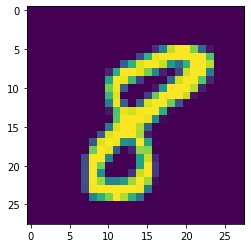

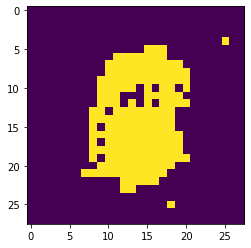

 89%|████████▉ | 210/235 [00:05<00:00, 33.24it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [52/100], Batch: [201/235], train accuracy: 0.089844, loss: 0.009023


100%|██████████| 235/235 [00:05<00:00, 39.56it/s]

Epoch: [52/100], train loss: 0.009056



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [52/100], test accuracy: 0.103200, loss: 2.312080


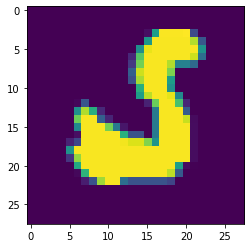

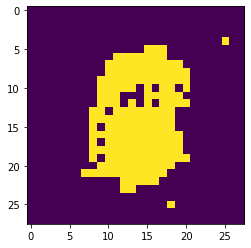

  3%|▎         | 8/235 [00:00<00:59,  3.80it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [53/100], Batch: [1/235], train accuracy: 0.121094, loss: 0.009010


 42%|████▏     | 99/235 [00:02<00:03, 44.99it/s]

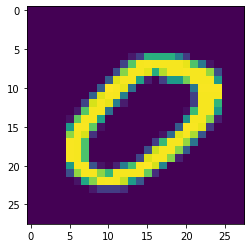

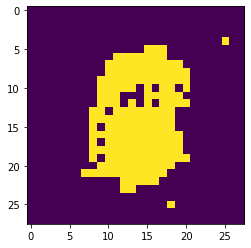

 47%|████▋     | 110/235 [00:02<00:03, 32.78it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [53/100], Batch: [101/235], train accuracy: 0.085938, loss: 0.009042


 85%|████████▌ | 200/235 [00:04<00:00, 44.28it/s]

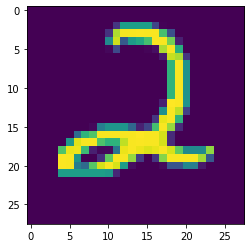

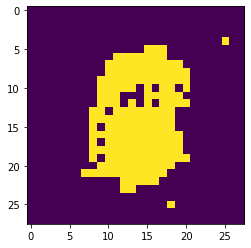

 89%|████████▉ | 210/235 [00:05<00:00, 33.34it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [53/100], Batch: [201/235], train accuracy: 0.097656, loss: 0.009013


100%|██████████| 235/235 [00:05<00:00, 39.56it/s]

Epoch: [53/100], train loss: 0.009054



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [53/100], test accuracy: 0.113500, loss: 2.314801


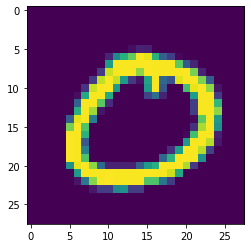

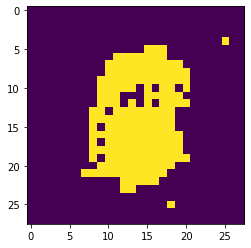

  3%|▎         | 8/235 [00:00<01:08,  3.33it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [54/100], Batch: [1/235], train accuracy: 0.136719, loss: 0.009056


 42%|████▏     | 99/235 [00:02<00:03, 44.23it/s]

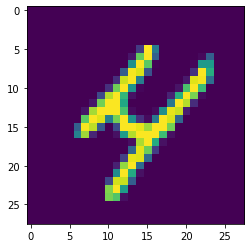

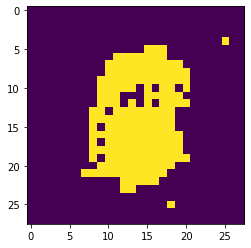

 47%|████▋     | 110/235 [00:03<00:03, 31.85it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [54/100], Batch: [101/235], train accuracy: 0.082031, loss: 0.009027


 85%|████████▌ | 200/235 [00:05<00:00, 45.31it/s]

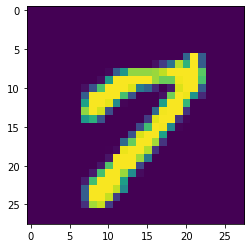

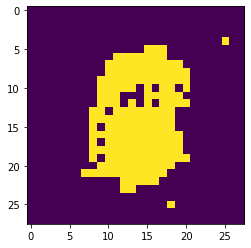

 89%|████████▉ | 210/235 [00:05<00:00, 33.20it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [54/100], Batch: [201/235], train accuracy: 0.093750, loss: 0.009061


100%|██████████| 235/235 [00:05<00:00, 39.24it/s]

Epoch: [54/100], train loss: 0.009056



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [54/100], test accuracy: 0.098200, loss: 2.308017


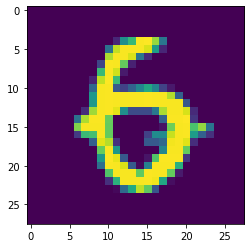

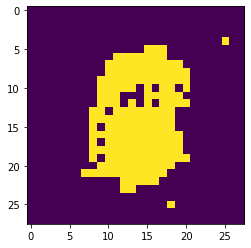

  3%|▎         | 7/235 [00:00<00:54,  4.20it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [55/100], Batch: [1/235], train accuracy: 0.074219, loss: 0.008997


 42%|████▏     | 98/235 [00:02<00:03, 43.37it/s]

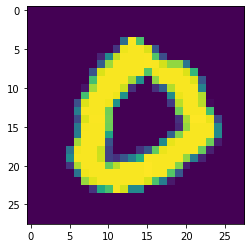

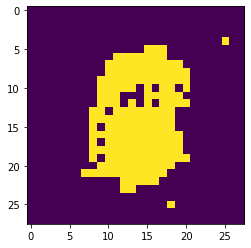

 46%|████▋     | 109/235 [00:02<00:03, 33.30it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [55/100], Batch: [101/235], train accuracy: 0.101562, loss: 0.009047


 85%|████████▍ | 199/235 [00:04<00:00, 45.78it/s]

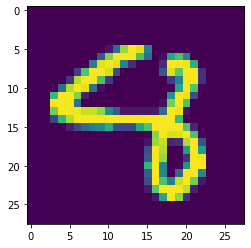

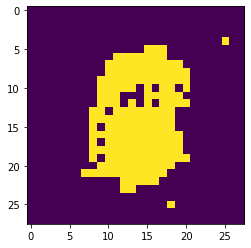

 89%|████████▉ | 210/235 [00:05<00:00, 33.08it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [55/100], Batch: [201/235], train accuracy: 0.078125, loss: 0.008993


100%|██████████| 235/235 [00:05<00:00, 39.75it/s]

Epoch: [55/100], train loss: 0.009053



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [55/100], test accuracy: 0.097400, loss: 2.321528


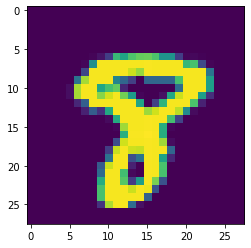

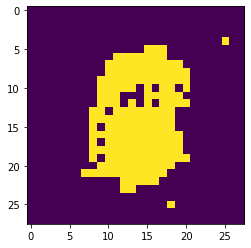

  3%|▎         | 8/235 [00:00<01:10,  3.24it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [56/100], Batch: [1/235], train accuracy: 0.109375, loss: 0.009025


 42%|████▏     | 98/235 [00:02<00:03, 45.10it/s]

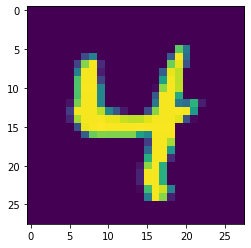

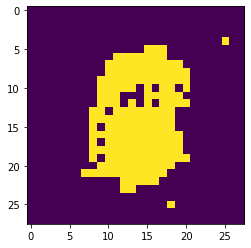

 47%|████▋     | 110/235 [00:03<00:03, 32.50it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [56/100], Batch: [101/235], train accuracy: 0.082031, loss: 0.009148


 85%|████████▌ | 200/235 [00:04<00:00, 44.67it/s]

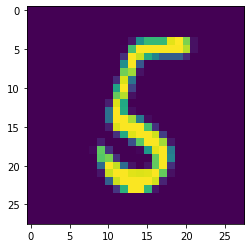

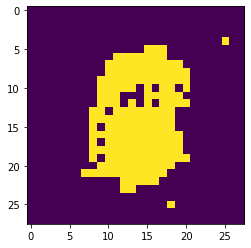

 89%|████████▉ | 210/235 [00:05<00:00, 33.27it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [56/100], Batch: [201/235], train accuracy: 0.109375, loss: 0.008978


100%|██████████| 235/235 [00:05<00:00, 39.43it/s]

Epoch: [56/100], train loss: 0.009054



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [56/100], test accuracy: 0.113500, loss: 2.306899


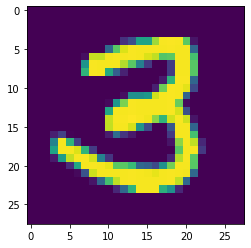

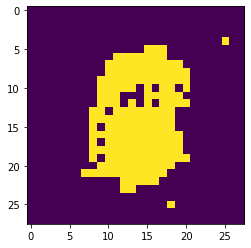

  3%|▎         | 8/235 [00:00<00:59,  3.83it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [57/100], Batch: [1/235], train accuracy: 0.093750, loss: 0.009018


 42%|████▏     | 98/235 [00:02<00:03, 42.21it/s]

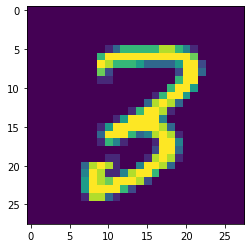

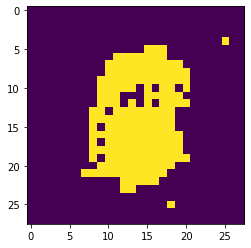

 46%|████▋     | 109/235 [00:02<00:03, 32.89it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [57/100], Batch: [101/235], train accuracy: 0.105469, loss: 0.009048


 85%|████████▍ | 199/235 [00:05<00:00, 44.48it/s]

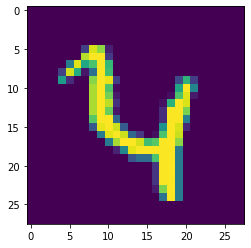

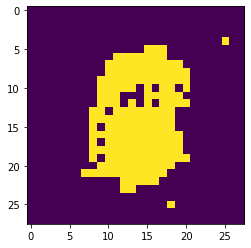

 89%|████████▉ | 210/235 [00:05<00:00, 32.43it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [57/100], Batch: [201/235], train accuracy: 0.078125, loss: 0.009023


100%|██████████| 235/235 [00:06<00:00, 38.56it/s]

Epoch: [57/100], train loss: 0.009055



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [57/100], test accuracy: 0.100900, loss: 2.309192


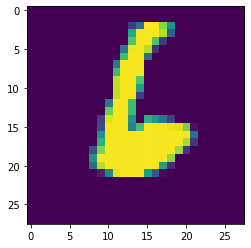

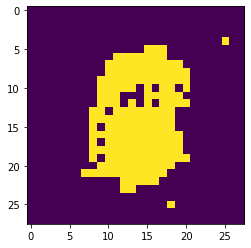

  3%|▎         | 8/235 [00:00<01:09,  3.26it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [58/100], Batch: [1/235], train accuracy: 0.089844, loss: 0.009028


 42%|████▏     | 98/235 [00:02<00:03, 43.38it/s]

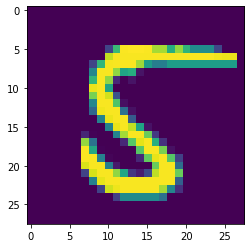

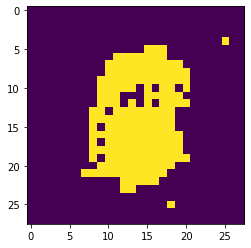

 46%|████▋     | 109/235 [00:03<00:03, 32.44it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [58/100], Batch: [101/235], train accuracy: 0.101562, loss: 0.009017


 85%|████████▍ | 199/235 [00:05<00:00, 42.70it/s]

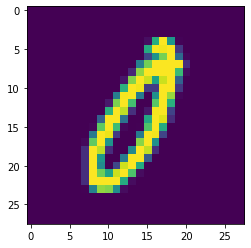

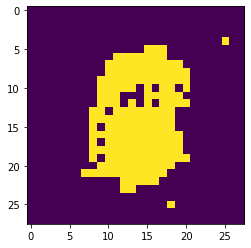

 89%|████████▉ | 210/235 [00:05<00:00, 32.25it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [58/100], Batch: [201/235], train accuracy: 0.125000, loss: 0.009063


100%|██████████| 235/235 [00:06<00:00, 38.38it/s]

Epoch: [58/100], train loss: 0.009056



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [58/100], test accuracy: 0.103200, loss: 2.310107


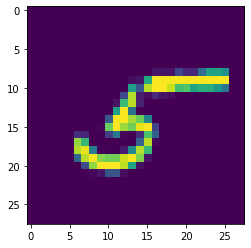

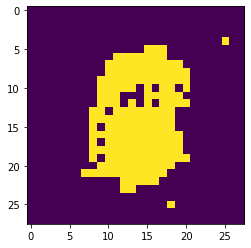

  3%|▎         | 8/235 [00:00<00:58,  3.90it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [59/100], Batch: [1/235], train accuracy: 0.074219, loss: 0.009055


 40%|████      | 95/235 [00:02<00:03, 43.14it/s]

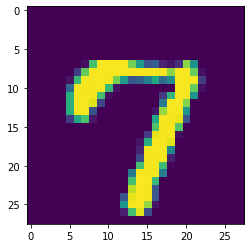

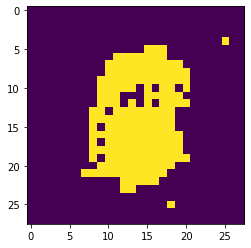

 46%|████▌     | 108/235 [00:02<00:03, 34.10it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [59/100], Batch: [101/235], train accuracy: 0.089844, loss: 0.009017


 84%|████████▍ | 198/235 [00:04<00:00, 44.43it/s]

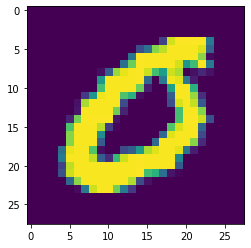

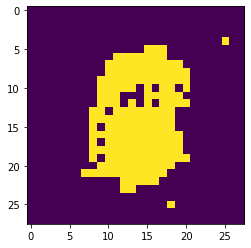

 89%|████████▉ | 210/235 [00:05<00:00, 33.19it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [59/100], Batch: [201/235], train accuracy: 0.097656, loss: 0.009033


100%|██████████| 235/235 [00:05<00:00, 39.58it/s]

Epoch: [59/100], train loss: 0.009055



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [59/100], test accuracy: 0.103200, loss: 2.313944


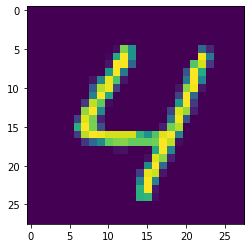

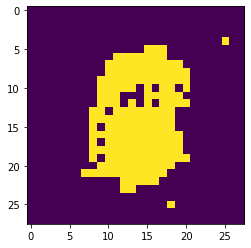

  3%|▎         | 8/235 [00:00<01:12,  3.12it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [60/100], Batch: [1/235], train accuracy: 0.097656, loss: 0.009008


 42%|████▏     | 98/235 [00:02<00:03, 38.39it/s]

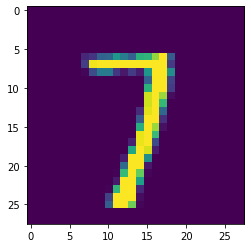

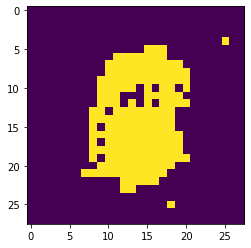

 46%|████▋     | 109/235 [00:03<00:04, 28.74it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [60/100], Batch: [101/235], train accuracy: 0.093750, loss: 0.009067


 85%|████████▍ | 199/235 [00:05<00:00, 46.06it/s]

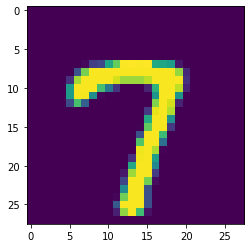

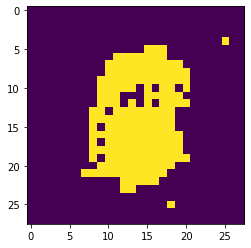

 89%|████████▉ | 210/235 [00:05<00:00, 33.44it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [60/100], Batch: [201/235], train accuracy: 0.113281, loss: 0.009019


100%|██████████| 235/235 [00:06<00:00, 38.75it/s]

Epoch: [60/100], train loss: 0.009054



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [60/100], test accuracy: 0.095800, loss: 2.309642


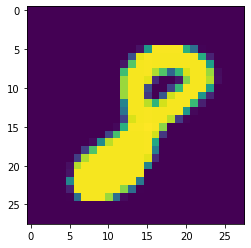

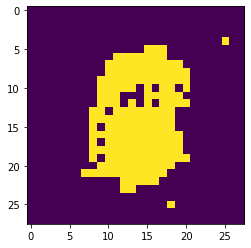

  3%|▎         | 8/235 [00:00<00:59,  3.82it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [61/100], Batch: [1/235], train accuracy: 0.097656, loss: 0.009047


 42%|████▏     | 98/235 [00:02<00:03, 43.79it/s]

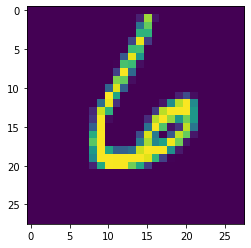

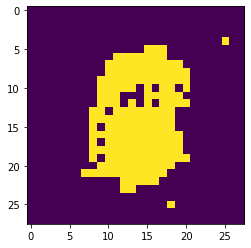

 46%|████▋     | 109/235 [00:02<00:03, 32.44it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [61/100], Batch: [101/235], train accuracy: 0.089844, loss: 0.009061


 85%|████████▍ | 199/235 [00:05<00:00, 42.80it/s]

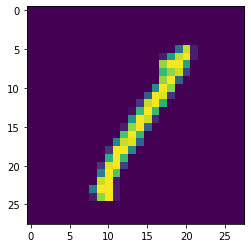

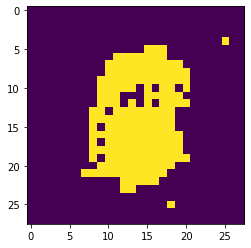

 89%|████████▉ | 210/235 [00:05<00:00, 31.57it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [61/100], Batch: [201/235], train accuracy: 0.089844, loss: 0.009062


100%|██████████| 235/235 [00:06<00:00, 38.70it/s]

Epoch: [61/100], train loss: 0.009059



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [61/100], test accuracy: 0.113500, loss: 2.309410


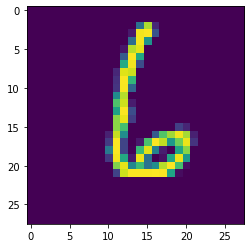

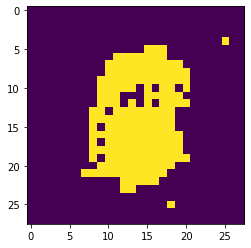

  3%|▎         | 8/235 [00:00<01:08,  3.29it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [62/100], Batch: [1/235], train accuracy: 0.113281, loss: 0.009006


 41%|████      | 96/235 [00:02<00:03, 43.45it/s]

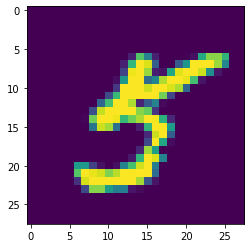

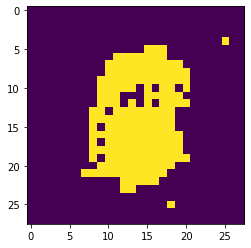

 46%|████▌     | 108/235 [00:02<00:03, 32.82it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [62/100], Batch: [101/235], train accuracy: 0.144531, loss: 0.008971


 84%|████████▍ | 198/235 [00:04<00:00, 45.79it/s]

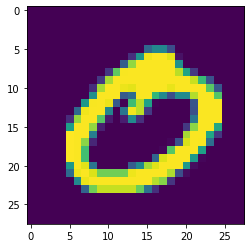

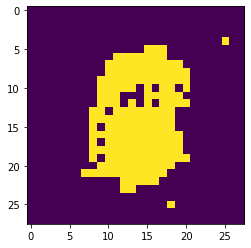

 89%|████████▉ | 209/235 [00:05<00:00, 33.23it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [62/100], Batch: [201/235], train accuracy: 0.070312, loss: 0.009012


100%|██████████| 235/235 [00:05<00:00, 39.26it/s]

Epoch: [62/100], train loss: 0.009056



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [62/100], test accuracy: 0.102800, loss: 2.311596


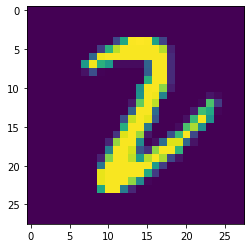

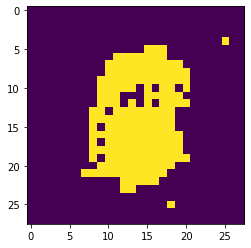

  3%|▎         | 8/235 [00:00<00:58,  3.86it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [63/100], Batch: [1/235], train accuracy: 0.113281, loss: 0.009001


 42%|████▏     | 98/235 [00:02<00:03, 43.59it/s]

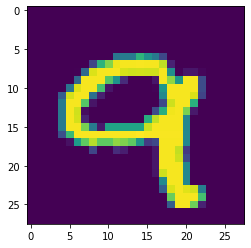

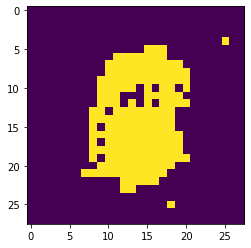

 46%|████▋     | 109/235 [00:02<00:03, 33.56it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [63/100], Batch: [101/235], train accuracy: 0.093750, loss: 0.009033


 85%|████████▍ | 199/235 [00:04<00:00, 45.49it/s]

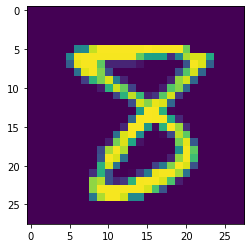

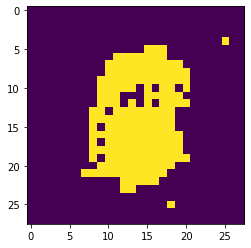

 89%|████████▉ | 210/235 [00:05<00:00, 33.02it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [63/100], Batch: [201/235], train accuracy: 0.070312, loss: 0.009120


100%|██████████| 235/235 [00:05<00:00, 39.74it/s]

Epoch: [63/100], train loss: 0.009058



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [63/100], test accuracy: 0.101000, loss: 2.310119


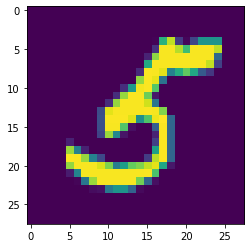

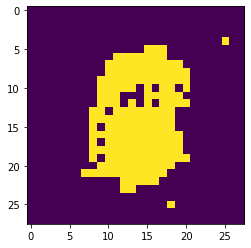

  3%|▎         | 8/235 [00:00<01:01,  3.68it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [64/100], Batch: [1/235], train accuracy: 0.101562, loss: 0.009028


 42%|████▏     | 98/235 [00:02<00:03, 43.90it/s]

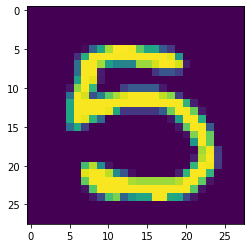

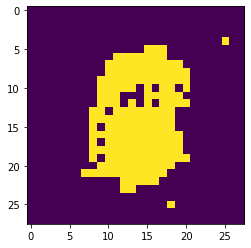

 46%|████▋     | 109/235 [00:02<00:03, 33.72it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [64/100], Batch: [101/235], train accuracy: 0.078125, loss: 0.009043


 85%|████████▍ | 199/235 [00:04<00:00, 44.48it/s]

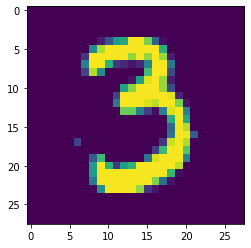

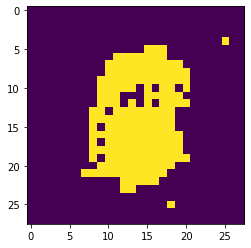

 89%|████████▉ | 210/235 [00:05<00:00, 34.30it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [64/100], Batch: [201/235], train accuracy: 0.078125, loss: 0.009030


100%|██████████| 235/235 [00:05<00:00, 39.48it/s]

Epoch: [64/100], train loss: 0.009058



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [64/100], test accuracy: 0.101000, loss: 2.310588


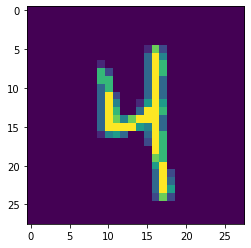

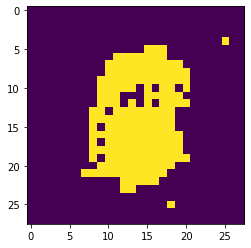

  3%|▎         | 8/235 [00:00<00:59,  3.83it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [65/100], Batch: [1/235], train accuracy: 0.062500, loss: 0.009092


 41%|████      | 96/235 [00:02<00:03, 43.52it/s]

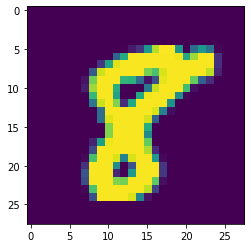

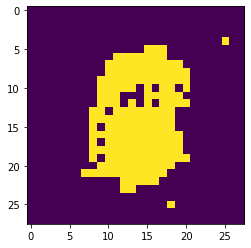

 46%|████▌     | 108/235 [00:02<00:03, 32.98it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [65/100], Batch: [101/235], train accuracy: 0.097656, loss: 0.009013


 84%|████████▍ | 198/235 [00:05<00:00, 39.03it/s]

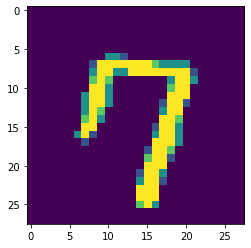

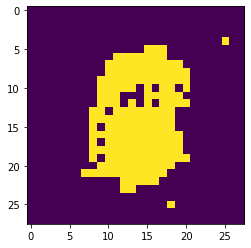

 89%|████████▉ | 209/235 [00:05<00:00, 31.25it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [65/100], Batch: [201/235], train accuracy: 0.105469, loss: 0.009002


100%|██████████| 235/235 [00:06<00:00, 37.69it/s]

Epoch: [65/100], train loss: 0.009054



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [65/100], test accuracy: 0.102800, loss: 2.317166


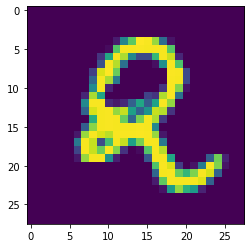

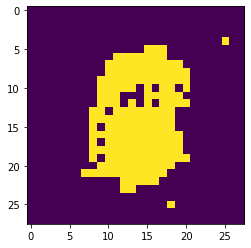

  3%|▎         | 8/235 [00:00<01:08,  3.32it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [66/100], Batch: [1/235], train accuracy: 0.132812, loss: 0.008988


 42%|████▏     | 98/235 [00:02<00:03, 43.54it/s]

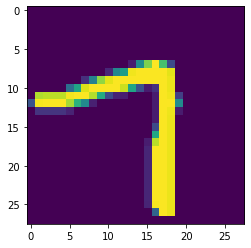

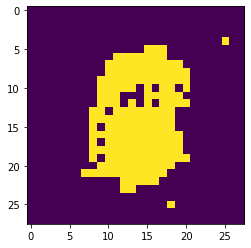

 46%|████▋     | 109/235 [00:03<00:03, 32.23it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [66/100], Batch: [101/235], train accuracy: 0.109375, loss: 0.009016


 83%|████████▎ | 195/235 [00:04<00:00, 44.67it/s]

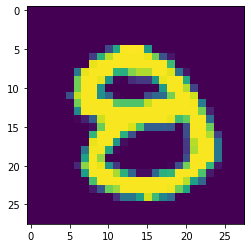

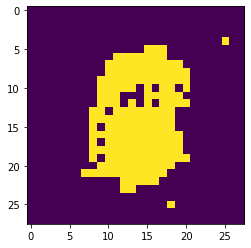

 89%|████████▊ | 208/235 [00:05<00:00, 34.82it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [66/100], Batch: [201/235], train accuracy: 0.136719, loss: 0.008982


100%|██████████| 235/235 [00:06<00:00, 38.83it/s]

Epoch: [66/100], train loss: 0.009057



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [66/100], test accuracy: 0.113500, loss: 2.314184


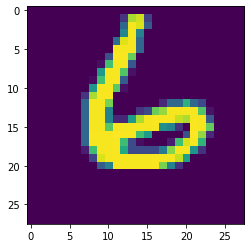

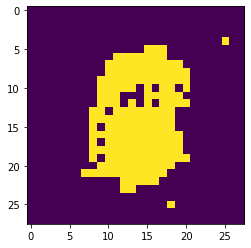

  3%|▎         | 8/235 [00:00<00:59,  3.84it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [67/100], Batch: [1/235], train accuracy: 0.097656, loss: 0.009033


 41%|████▏     | 97/235 [00:02<00:03, 44.89it/s]

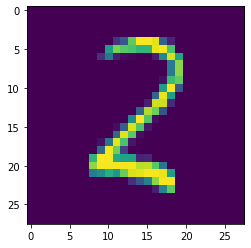

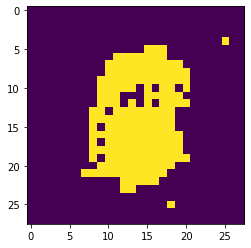

 46%|████▋     | 109/235 [00:02<00:03, 33.42it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [67/100], Batch: [101/235], train accuracy: 0.105469, loss: 0.009029


 85%|████████▍ | 199/235 [00:04<00:00, 45.97it/s]

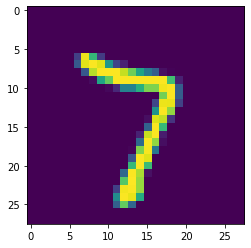

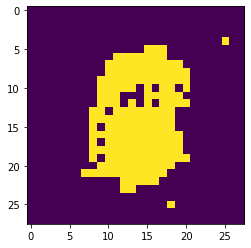

 89%|████████▉ | 210/235 [00:05<00:00, 33.22it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [67/100], Batch: [201/235], train accuracy: 0.093750, loss: 0.009022


100%|██████████| 235/235 [00:05<00:00, 39.86it/s]

Epoch: [67/100], train loss: 0.009055



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [67/100], test accuracy: 0.102800, loss: 2.307412


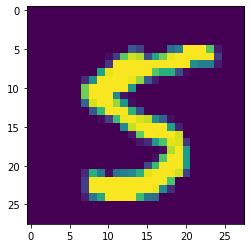

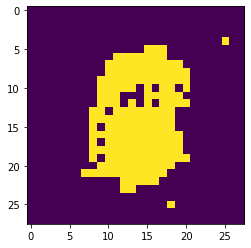

  3%|▎         | 8/235 [00:00<01:09,  3.27it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [68/100], Batch: [1/235], train accuracy: 0.070312, loss: 0.009040


 42%|████▏     | 98/235 [00:02<00:03, 45.13it/s]

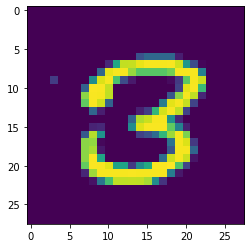

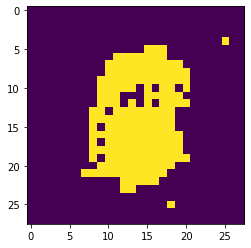

 47%|████▋     | 110/235 [00:02<00:03, 32.56it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [68/100], Batch: [101/235], train accuracy: 0.132812, loss: 0.009052


 83%|████████▎ | 196/235 [00:04<00:00, 45.02it/s]

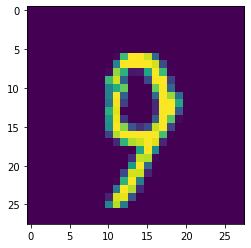

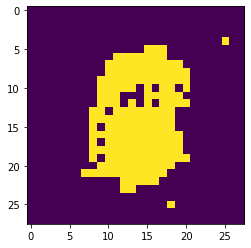

 89%|████████▊ | 208/235 [00:05<00:00, 33.59it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [68/100], Batch: [201/235], train accuracy: 0.121094, loss: 0.009011


100%|██████████| 235/235 [00:05<00:00, 39.63it/s]

Epoch: [68/100], train loss: 0.009059



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [68/100], test accuracy: 0.100900, loss: 2.309842


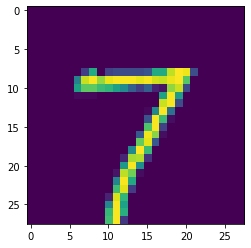

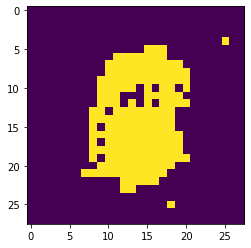

  3%|▎         | 8/235 [00:00<00:59,  3.83it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [69/100], Batch: [1/235], train accuracy: 0.078125, loss: 0.009073


 42%|████▏     | 98/235 [00:02<00:03, 44.15it/s]

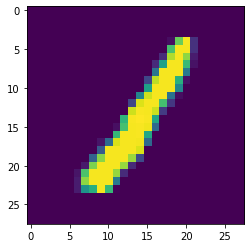

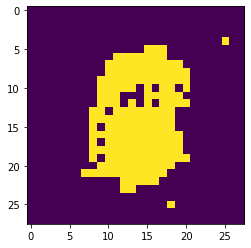

 46%|████▋     | 109/235 [00:02<00:03, 33.39it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [69/100], Batch: [101/235], train accuracy: 0.132812, loss: 0.009026


 85%|████████▍ | 199/235 [00:04<00:00, 44.25it/s]

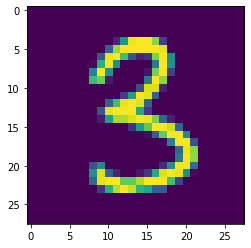

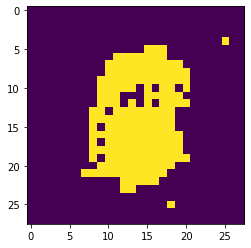

 89%|████████▉ | 210/235 [00:05<00:00, 32.75it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [69/100], Batch: [201/235], train accuracy: 0.117188, loss: 0.009013


100%|██████████| 235/235 [00:05<00:00, 39.66it/s]

Epoch: [69/100], train loss: 0.009059



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [69/100], test accuracy: 0.102800, loss: 2.314637


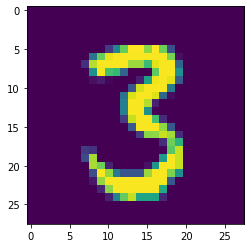

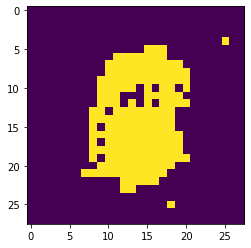

  3%|▎         | 8/235 [00:00<01:11,  3.16it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [70/100], Batch: [1/235], train accuracy: 0.117188, loss: 0.009032


 42%|████▏     | 98/235 [00:02<00:03, 44.42it/s]

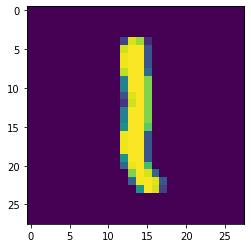

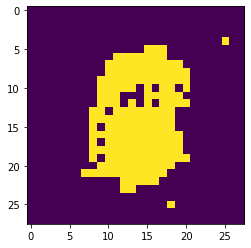

 46%|████▋     | 109/235 [00:02<00:03, 33.52it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [70/100], Batch: [101/235], train accuracy: 0.097656, loss: 0.009070


 84%|████████▍ | 198/235 [00:04<00:00, 45.20it/s]

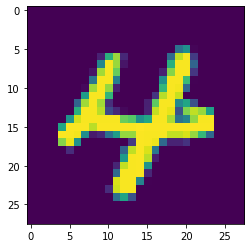

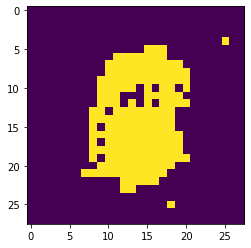

 89%|████████▉ | 209/235 [00:05<00:00, 33.86it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [70/100], Batch: [201/235], train accuracy: 0.097656, loss: 0.009077


100%|██████████| 235/235 [00:05<00:00, 39.34it/s]

Epoch: [70/100], train loss: 0.009054



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [70/100], test accuracy: 0.102800, loss: 2.309202


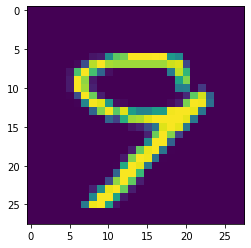

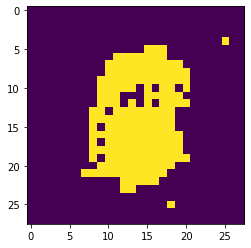

  3%|▎         | 8/235 [00:00<01:01,  3.71it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [71/100], Batch: [1/235], train accuracy: 0.101562, loss: 0.009027


 42%|████▏     | 98/235 [00:02<00:03, 44.95it/s]

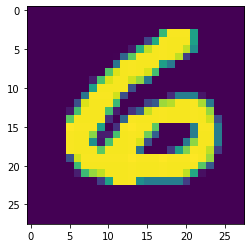

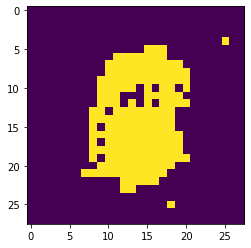

 47%|████▋     | 110/235 [00:02<00:03, 32.47it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [71/100], Batch: [101/235], train accuracy: 0.082031, loss: 0.009047


 85%|████████▌ | 200/235 [00:04<00:00, 45.33it/s]

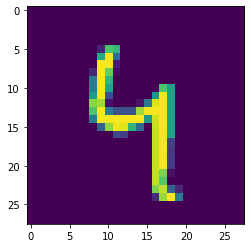

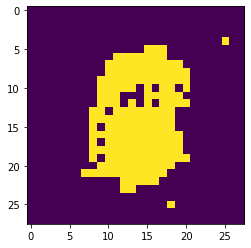

 89%|████████▉ | 210/235 [00:05<00:00, 32.93it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [71/100], Batch: [201/235], train accuracy: 0.097656, loss: 0.009042


100%|██████████| 235/235 [00:05<00:00, 39.64it/s]

Epoch: [71/100], train loss: 0.009057



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [71/100], test accuracy: 0.113500, loss: 2.313419


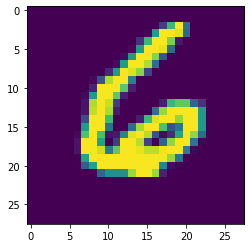

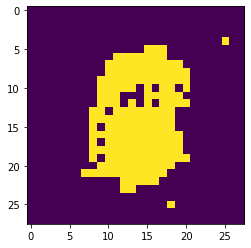

  3%|▎         | 8/235 [00:00<01:01,  3.69it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [72/100], Batch: [1/235], train accuracy: 0.105469, loss: 0.009046


 41%|████      | 96/235 [00:02<00:03, 43.67it/s]

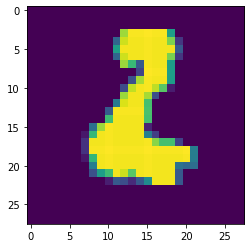

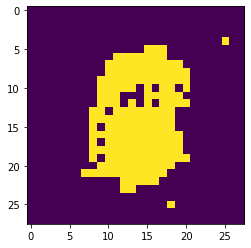

 46%|████▌     | 108/235 [00:02<00:03, 33.06it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [72/100], Batch: [101/235], train accuracy: 0.113281, loss: 0.009017


 84%|████████▍ | 198/235 [00:04<00:00, 44.91it/s]

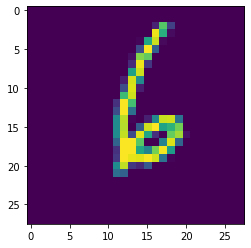

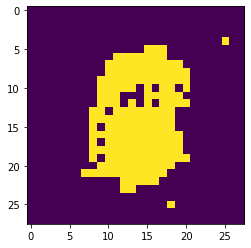

 89%|████████▉ | 209/235 [00:05<00:00, 32.03it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [72/100], Batch: [201/235], train accuracy: 0.093750, loss: 0.009062


100%|██████████| 235/235 [00:05<00:00, 39.54it/s]

Epoch: [72/100], train loss: 0.009053



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [72/100], test accuracy: 0.097400, loss: 2.311521


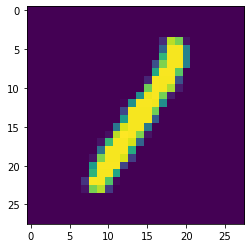

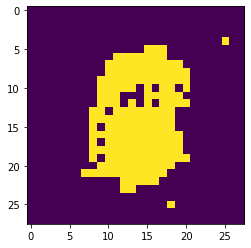

  3%|▎         | 8/235 [00:00<00:59,  3.84it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [73/100], Batch: [1/235], train accuracy: 0.078125, loss: 0.009037


 42%|████▏     | 99/235 [00:02<00:03, 45.11it/s]

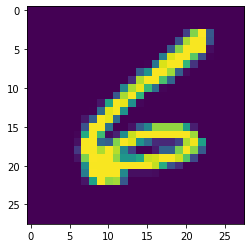

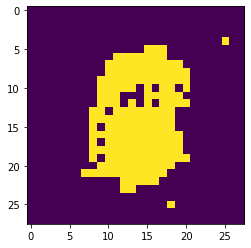

 47%|████▋     | 110/235 [00:02<00:03, 32.68it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [73/100], Batch: [101/235], train accuracy: 0.097656, loss: 0.009040


 85%|████████▌ | 200/235 [00:04<00:00, 44.33it/s]

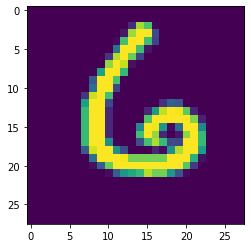

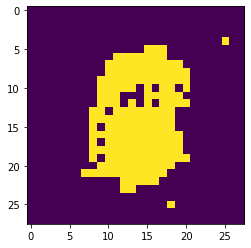

 89%|████████▉ | 210/235 [00:05<00:00, 33.18it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [73/100], Batch: [201/235], train accuracy: 0.109375, loss: 0.008985


100%|██████████| 235/235 [00:05<00:00, 39.64it/s]

Epoch: [73/100], train loss: 0.009055



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [73/100], test accuracy: 0.102800, loss: 2.311801


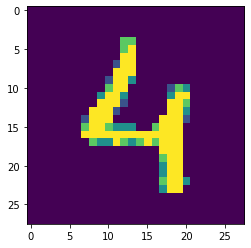

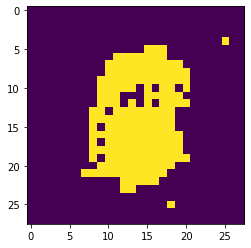

  3%|▎         | 8/235 [00:00<01:09,  3.27it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [74/100], Batch: [1/235], train accuracy: 0.128906, loss: 0.008962


 43%|████▎     | 100/235 [00:02<00:03, 44.99it/s]

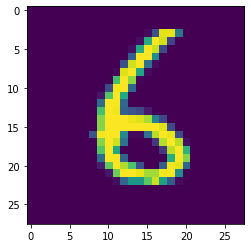

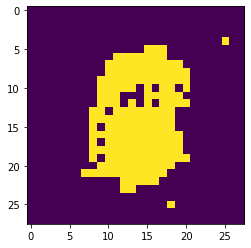

 47%|████▋     | 110/235 [00:03<00:03, 32.27it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [74/100], Batch: [101/235], train accuracy: 0.113281, loss: 0.009034


 85%|████████▌ | 200/235 [00:05<00:00, 44.57it/s]

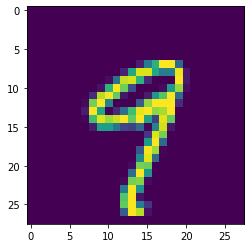

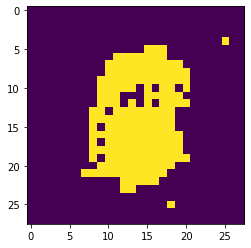

 89%|████████▉ | 210/235 [00:05<00:00, 33.27it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [74/100], Batch: [201/235], train accuracy: 0.113281, loss: 0.009043


100%|██████████| 235/235 [00:05<00:00, 39.25it/s]

Epoch: [74/100], train loss: 0.009053



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [74/100], test accuracy: 0.098200, loss: 2.310716


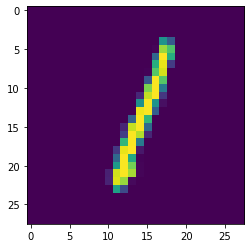

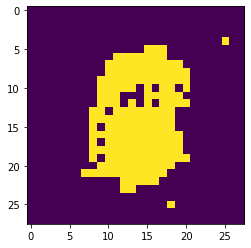

  3%|▎         | 8/235 [00:00<00:59,  3.84it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [75/100], Batch: [1/235], train accuracy: 0.152344, loss: 0.009032


 42%|████▏     | 98/235 [00:02<00:03, 41.19it/s]

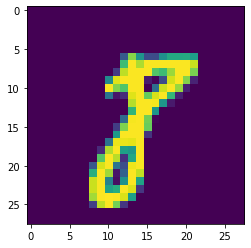

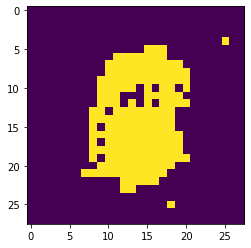

 46%|████▋     | 109/235 [00:02<00:03, 33.06it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [75/100], Batch: [101/235], train accuracy: 0.078125, loss: 0.009068


 85%|████████▍ | 199/235 [00:05<00:00, 45.51it/s]

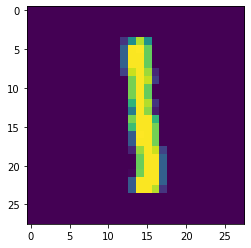

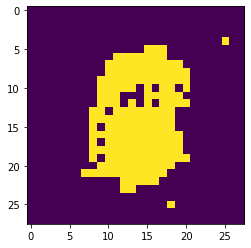

 89%|████████▉ | 210/235 [00:05<00:00, 33.03it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [75/100], Batch: [201/235], train accuracy: 0.082031, loss: 0.009043


100%|██████████| 235/235 [00:06<00:00, 39.01it/s]

Epoch: [75/100], train loss: 0.009054



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [75/100], test accuracy: 0.097400, loss: 2.313589


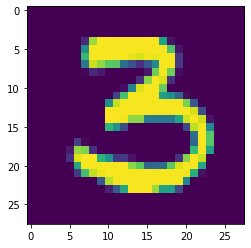

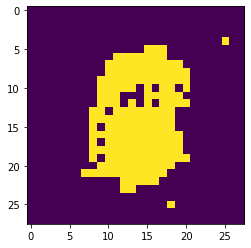

  3%|▎         | 8/235 [00:00<01:08,  3.31it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [76/100], Batch: [1/235], train accuracy: 0.082031, loss: 0.009010


 42%|████▏     | 98/235 [00:02<00:03, 43.63it/s]

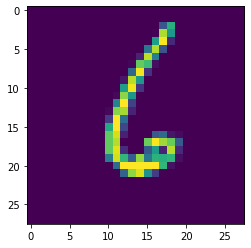

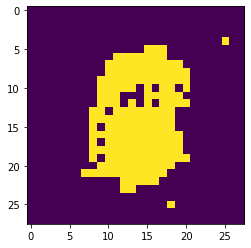

 46%|████▋     | 109/235 [00:02<00:03, 33.59it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [76/100], Batch: [101/235], train accuracy: 0.097656, loss: 0.009032


 84%|████████▍ | 198/235 [00:04<00:00, 44.75it/s]

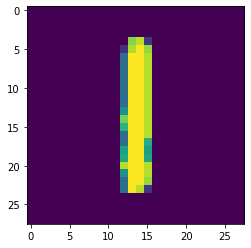

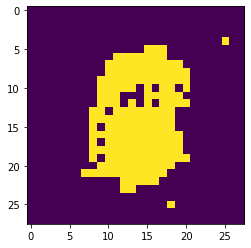

 89%|████████▉ | 209/235 [00:05<00:00, 33.91it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [76/100], Batch: [201/235], train accuracy: 0.101562, loss: 0.008957


100%|██████████| 235/235 [00:05<00:00, 39.44it/s]

Epoch: [76/100], train loss: 0.009057



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [76/100], test accuracy: 0.113500, loss: 2.309498


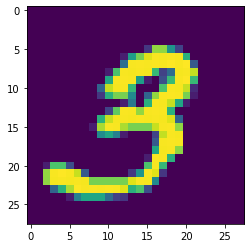

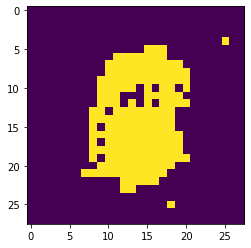

  3%|▎         | 8/235 [00:00<00:58,  3.87it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [77/100], Batch: [1/235], train accuracy: 0.148438, loss: 0.009019


 42%|████▏     | 98/235 [00:02<00:03, 42.65it/s]

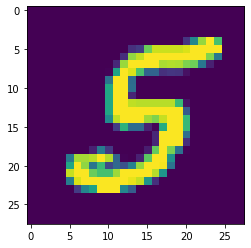

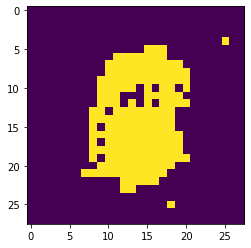

 46%|████▋     | 109/235 [00:02<00:03, 33.11it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [77/100], Batch: [101/235], train accuracy: 0.125000, loss: 0.008958


 85%|████████▍ | 199/235 [00:04<00:00, 45.17it/s]

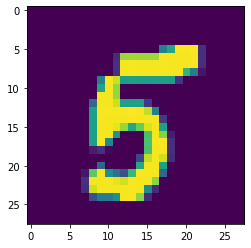

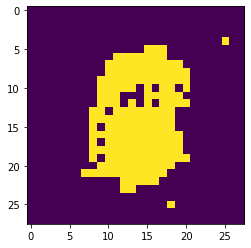

 89%|████████▉ | 210/235 [00:05<00:00, 32.66it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [77/100], Batch: [201/235], train accuracy: 0.089844, loss: 0.008980


100%|██████████| 235/235 [00:05<00:00, 39.71it/s]

Epoch: [77/100], train loss: 0.009054



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [77/100], test accuracy: 0.101000, loss: 2.312195


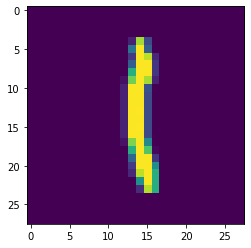

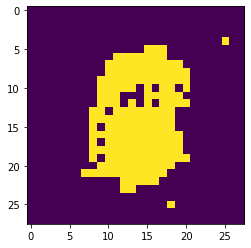

  3%|▎         | 8/235 [00:00<01:09,  3.28it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [78/100], Batch: [1/235], train accuracy: 0.074219, loss: 0.009055


 43%|████▎     | 100/235 [00:02<00:03, 43.53it/s]

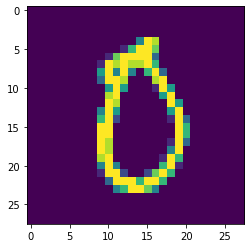

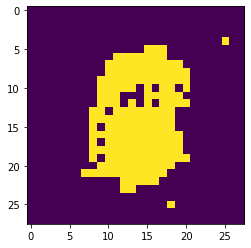

 47%|████▋     | 110/235 [00:03<00:03, 32.83it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [78/100], Batch: [101/235], train accuracy: 0.097656, loss: 0.009013


 85%|████████▌ | 200/235 [00:05<00:00, 45.67it/s]

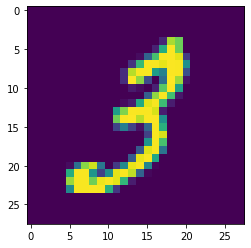

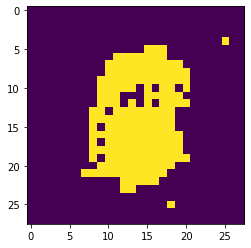

 89%|████████▉ | 210/235 [00:05<00:00, 32.57it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [78/100], Batch: [201/235], train accuracy: 0.101562, loss: 0.009018


100%|██████████| 235/235 [00:06<00:00, 39.09it/s]

Epoch: [78/100], train loss: 0.009054



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [78/100], test accuracy: 0.113500, loss: 2.309705


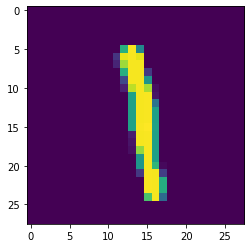

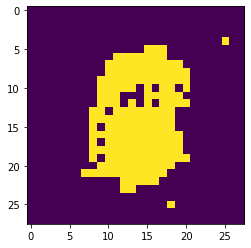

  3%|▎         | 8/235 [00:00<00:58,  3.85it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [79/100], Batch: [1/235], train accuracy: 0.097656, loss: 0.009039


 42%|████▏     | 98/235 [00:02<00:03, 44.02it/s]

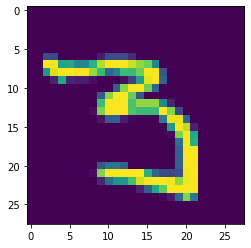

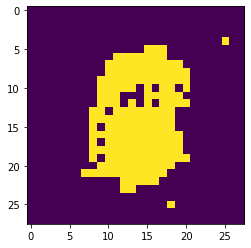

 46%|████▋     | 109/235 [00:02<00:03, 33.62it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [79/100], Batch: [101/235], train accuracy: 0.078125, loss: 0.009041


 85%|████████▍ | 199/235 [00:04<00:00, 45.58it/s]

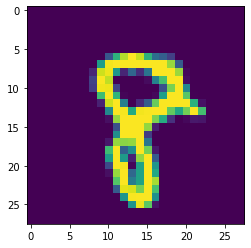

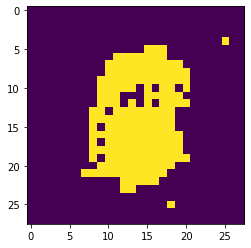

 89%|████████▉ | 210/235 [00:05<00:00, 33.00it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [79/100], Batch: [201/235], train accuracy: 0.128906, loss: 0.009026


100%|██████████| 235/235 [00:05<00:00, 39.92it/s]

Epoch: [79/100], train loss: 0.009054



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [79/100], test accuracy: 0.113500, loss: 2.314049


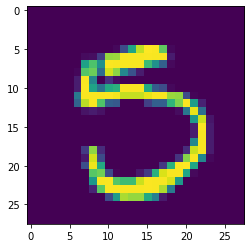

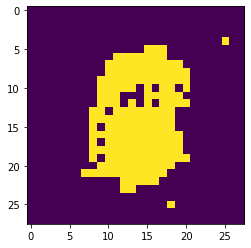

  3%|▎         | 8/235 [00:00<01:10,  3.23it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [80/100], Batch: [1/235], train accuracy: 0.101562, loss: 0.009048


 42%|████▏     | 98/235 [00:02<00:03, 44.33it/s]

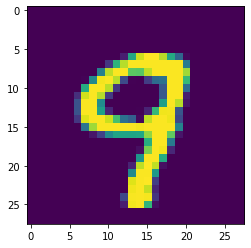

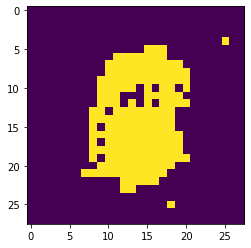

 47%|████▋     | 110/235 [00:02<00:03, 32.86it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [80/100], Batch: [101/235], train accuracy: 0.105469, loss: 0.009030


 85%|████████▌ | 200/235 [00:04<00:00, 44.65it/s]

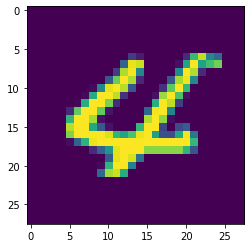

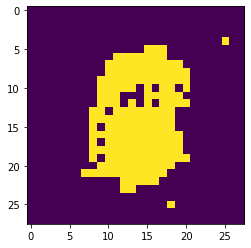

 89%|████████▉ | 210/235 [00:05<00:00, 33.44it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [80/100], Batch: [201/235], train accuracy: 0.148438, loss: 0.008980


100%|██████████| 235/235 [00:05<00:00, 39.47it/s]

Epoch: [80/100], train loss: 0.009057



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [80/100], test accuracy: 0.102800, loss: 2.313750


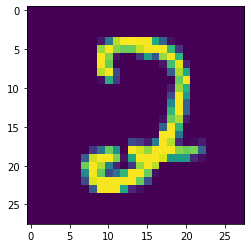

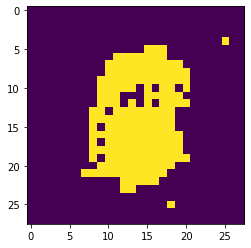

  3%|▎         | 8/235 [00:00<01:00,  3.76it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [81/100], Batch: [1/235], train accuracy: 0.089844, loss: 0.009035


 42%|████▏     | 98/235 [00:02<00:03, 43.58it/s]

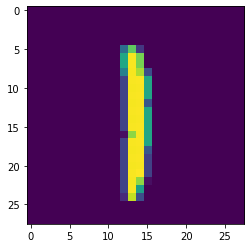

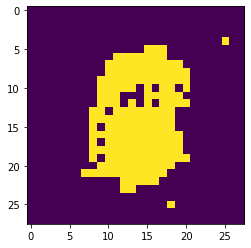

 46%|████▋     | 109/235 [00:02<00:03, 33.61it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [81/100], Batch: [101/235], train accuracy: 0.128906, loss: 0.009034


 85%|████████▌ | 200/235 [00:05<00:00, 43.80it/s]

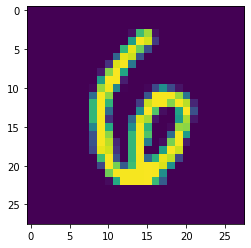

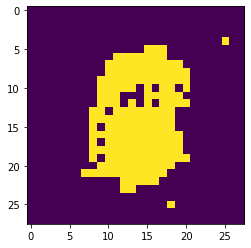

 89%|████████▉ | 210/235 [00:05<00:00, 32.90it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [81/100], Batch: [201/235], train accuracy: 0.144531, loss: 0.009036


100%|██████████| 235/235 [00:05<00:00, 39.24it/s]

Epoch: [81/100], train loss: 0.009058



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [81/100], test accuracy: 0.113500, loss: 2.310222


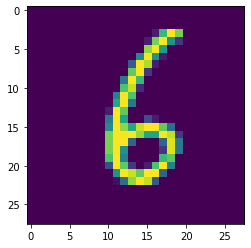

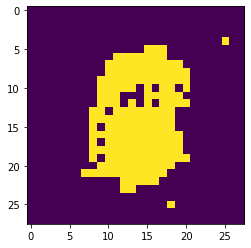

  3%|▎         | 8/235 [00:00<01:10,  3.22it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [82/100], Batch: [1/235], train accuracy: 0.105469, loss: 0.009065


 42%|████▏     | 98/235 [00:02<00:03, 43.57it/s]

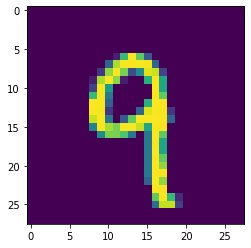

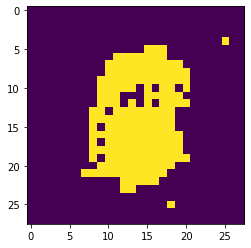

 46%|████▋     | 109/235 [00:02<00:03, 33.68it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [82/100], Batch: [101/235], train accuracy: 0.109375, loss: 0.009061


 85%|████████▌ | 200/235 [00:05<00:00, 44.40it/s]

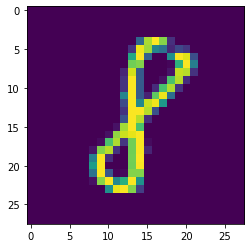

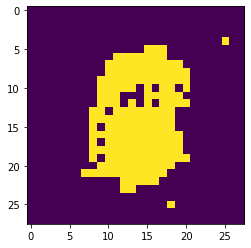

 89%|████████▉ | 210/235 [00:05<00:00, 33.31it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [82/100], Batch: [201/235], train accuracy: 0.089844, loss: 0.009025


100%|██████████| 235/235 [00:05<00:00, 39.24it/s]

Epoch: [82/100], train loss: 0.009055



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [82/100], test accuracy: 0.113500, loss: 2.313062


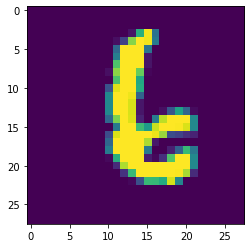

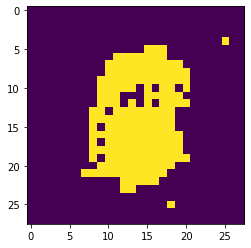

  3%|▎         | 8/235 [00:00<00:58,  3.89it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [83/100], Batch: [1/235], train accuracy: 0.074219, loss: 0.009066


 42%|████▏     | 98/235 [00:02<00:03, 43.66it/s]

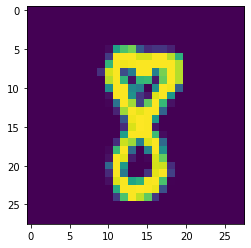

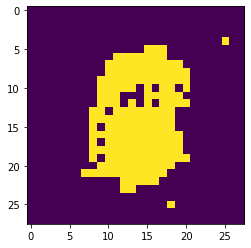

 46%|████▋     | 109/235 [00:02<00:03, 33.63it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [83/100], Batch: [101/235], train accuracy: 0.109375, loss: 0.009044


 85%|████████▌ | 200/235 [00:04<00:00, 44.49it/s]

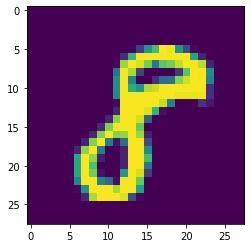

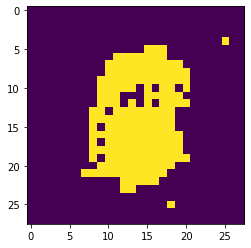

 89%|████████▉ | 210/235 [00:05<00:00, 33.13it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [83/100], Batch: [201/235], train accuracy: 0.117188, loss: 0.009018


100%|██████████| 235/235 [00:05<00:00, 39.66it/s]

Epoch: [83/100], train loss: 0.009054



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [83/100], test accuracy: 0.101000, loss: 2.312855


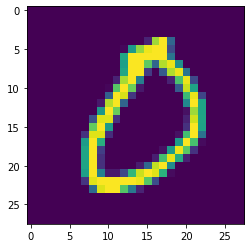

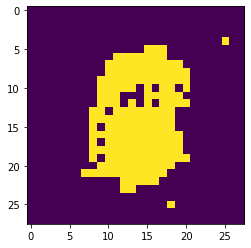

  3%|▎         | 8/235 [00:00<01:09,  3.24it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [84/100], Batch: [1/235], train accuracy: 0.089844, loss: 0.009040


 42%|████▏     | 98/235 [00:02<00:03, 42.54it/s]

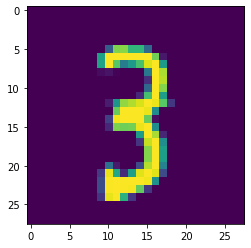

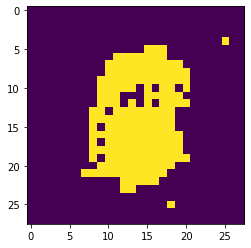

 47%|████▋     | 110/235 [00:03<00:03, 34.24it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [84/100], Batch: [101/235], train accuracy: 0.082031, loss: 0.009085


 85%|████████▌ | 200/235 [00:04<00:00, 44.71it/s]

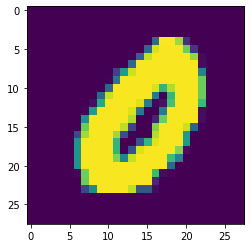

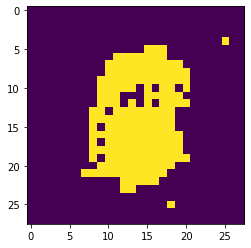

 89%|████████▉ | 210/235 [00:05<00:00, 33.24it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [84/100], Batch: [201/235], train accuracy: 0.109375, loss: 0.008992


100%|██████████| 235/235 [00:05<00:00, 39.35it/s]

Epoch: [84/100], train loss: 0.009056



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [84/100], test accuracy: 0.113500, loss: 2.309154


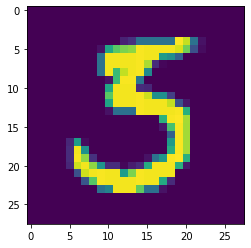

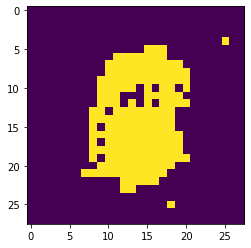

  3%|▎         | 8/235 [00:00<00:59,  3.84it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [85/100], Batch: [1/235], train accuracy: 0.089844, loss: 0.009063


 42%|████▏     | 98/235 [00:02<00:03, 43.48it/s]

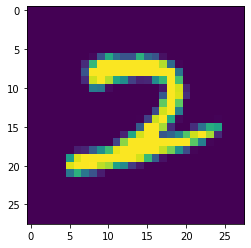

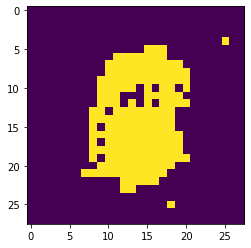

 46%|████▋     | 109/235 [00:02<00:03, 33.46it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [85/100], Batch: [101/235], train accuracy: 0.113281, loss: 0.009044


 85%|████████▍ | 199/235 [00:05<00:00, 42.28it/s]

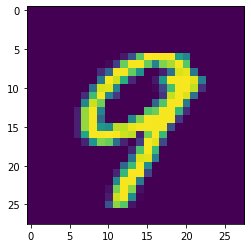

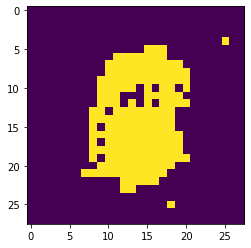

 89%|████████▉ | 210/235 [00:05<00:00, 32.06it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([-1.1463e-42, -5.2268e-43, -6.7543e-43], device='cuda:1')
Epoch: [85/100], Batch: [201/235], train accuracy: 0.097656, loss: 0.009067


100%|██████████| 235/235 [00:06<00:00, 39.09it/s]

Epoch: [85/100], train loss: 0.009059



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [85/100], test accuracy: 0.113500, loss: 2.309703


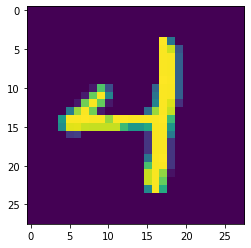

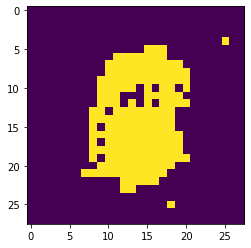

  3%|▎         | 8/235 [00:00<01:08,  3.31it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [86/100], Batch: [1/235], train accuracy: 0.074219, loss: 0.009020


 42%|████▏     | 98/235 [00:02<00:03, 44.48it/s]

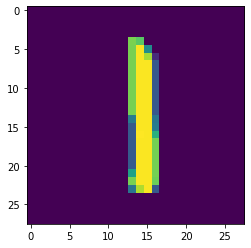

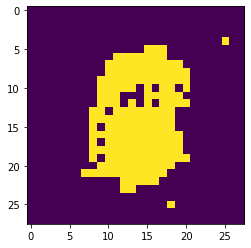

 46%|████▋     | 109/235 [00:02<00:03, 33.30it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [86/100], Batch: [101/235], train accuracy: 0.097656, loss: 0.009015


 85%|████████▌ | 200/235 [00:04<00:00, 44.97it/s]

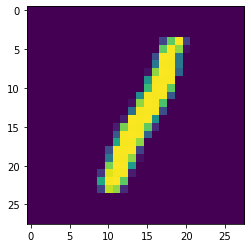

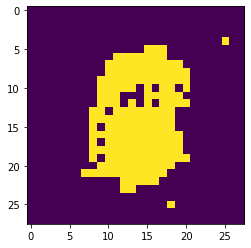

 89%|████████▉ | 210/235 [00:05<00:00, 33.15it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [86/100], Batch: [201/235], train accuracy: 0.140625, loss: 0.008972


100%|██████████| 235/235 [00:05<00:00, 39.60it/s]

Epoch: [86/100], train loss: 0.009053



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [86/100], test accuracy: 0.101000, loss: 2.308374


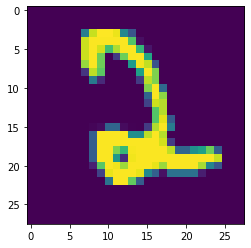

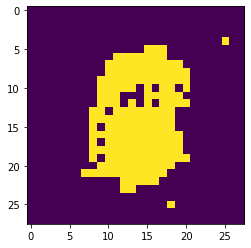

  3%|▎         | 8/235 [00:00<01:00,  3.78it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [87/100], Batch: [1/235], train accuracy: 0.097656, loss: 0.009012


 42%|████▏     | 98/235 [00:02<00:03, 44.57it/s]

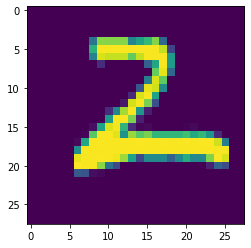

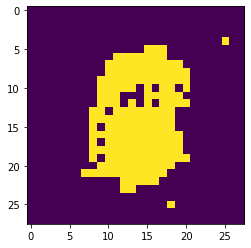

 46%|████▋     | 109/235 [00:02<00:03, 32.87it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [87/100], Batch: [101/235], train accuracy: 0.070312, loss: 0.009040


 85%|████████▍ | 199/235 [00:05<00:00, 43.79it/s]

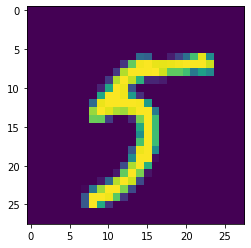

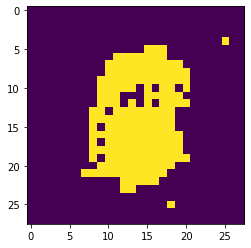

 89%|████████▉ | 210/235 [00:05<00:00, 32.54it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [87/100], Batch: [201/235], train accuracy: 0.093750, loss: 0.008991


100%|██████████| 235/235 [00:06<00:00, 39.07it/s]

Epoch: [87/100], train loss: 0.009053



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [87/100], test accuracy: 0.113500, loss: 2.308765


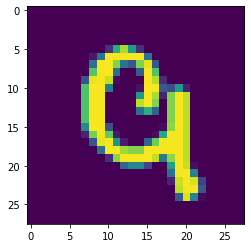

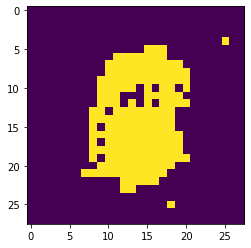

  3%|▎         | 8/235 [00:00<01:12,  3.14it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [88/100], Batch: [1/235], train accuracy: 0.132812, loss: 0.009054


 42%|████▏     | 98/235 [00:02<00:03, 43.78it/s]

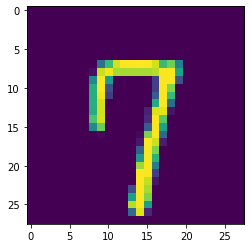

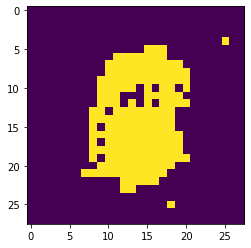

 47%|████▋     | 110/235 [00:03<00:03, 33.19it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [88/100], Batch: [101/235], train accuracy: 0.109375, loss: 0.009031


 85%|████████▌ | 200/235 [00:05<00:00, 44.51it/s]

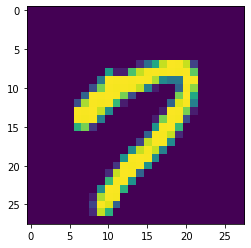

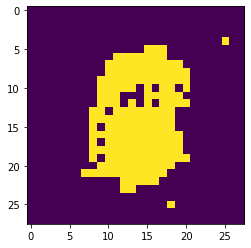

 89%|████████▉ | 210/235 [00:05<00:00, 33.19it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [88/100], Batch: [201/235], train accuracy: 0.066406, loss: 0.009049


100%|██████████| 235/235 [00:05<00:00, 39.33it/s]

Epoch: [88/100], train loss: 0.009052



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [88/100], test accuracy: 0.100900, loss: 2.309309


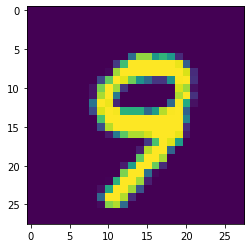

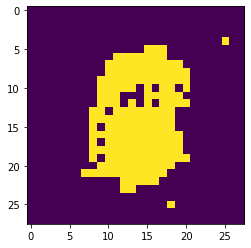

  3%|▎         | 8/235 [00:00<00:59,  3.82it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [89/100], Batch: [1/235], train accuracy: 0.082031, loss: 0.009012


 42%|████▏     | 98/235 [00:02<00:03, 44.12it/s]

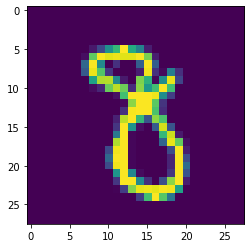

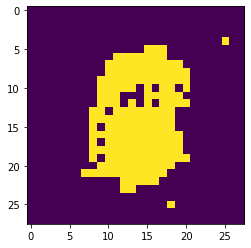

 46%|████▋     | 109/235 [00:02<00:03, 33.44it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [89/100], Batch: [101/235], train accuracy: 0.113281, loss: 0.009007


 85%|████████▌ | 200/235 [00:04<00:00, 44.34it/s]

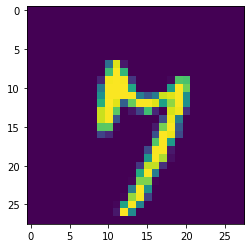

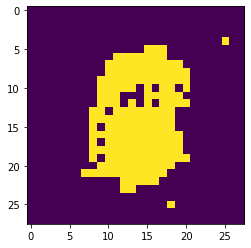

 89%|████████▉ | 210/235 [00:05<00:00, 32.91it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [89/100], Batch: [201/235], train accuracy: 0.121094, loss: 0.008980


100%|██████████| 235/235 [00:05<00:00, 39.63it/s]

Epoch: [89/100], train loss: 0.009054



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [89/100], test accuracy: 0.102800, loss: 2.314523


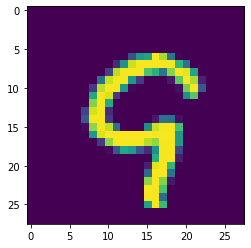

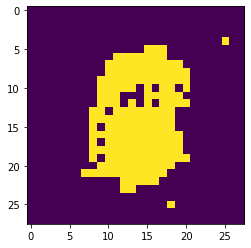

  3%|▎         | 8/235 [00:00<01:12,  3.13it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [90/100], Batch: [1/235], train accuracy: 0.109375, loss: 0.009005


 41%|████▏     | 97/235 [00:02<00:03, 40.78it/s]

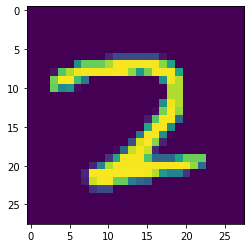

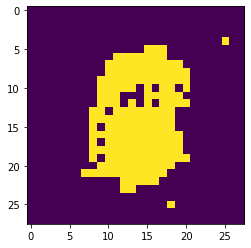

 46%|████▌     | 108/235 [00:03<00:04, 30.11it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [90/100], Batch: [101/235], train accuracy: 0.089844, loss: 0.009047


 83%|████████▎ | 195/235 [00:05<00:00, 44.13it/s]

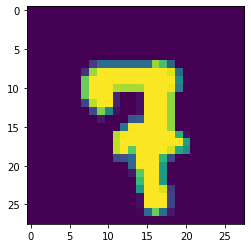

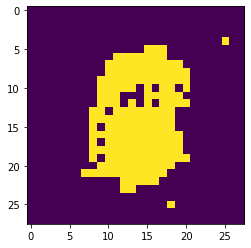

 89%|████████▊ | 208/235 [00:05<00:00, 34.51it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [90/100], Batch: [201/235], train accuracy: 0.078125, loss: 0.009080


100%|██████████| 235/235 [00:06<00:00, 38.43it/s]

Epoch: [90/100], train loss: 0.009054



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [90/100], test accuracy: 0.101000, loss: 2.318001


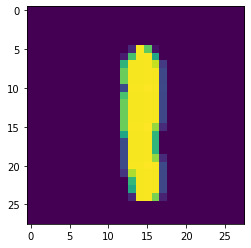

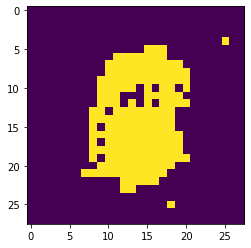

  3%|▎         | 7/235 [00:00<01:00,  3.75it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [91/100], Batch: [1/235], train accuracy: 0.117188, loss: 0.009029


 41%|████      | 96/235 [00:02<00:03, 43.98it/s]

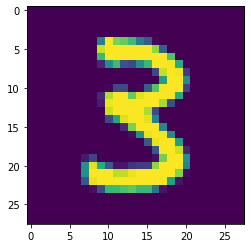

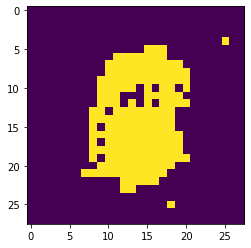

 46%|████▌     | 108/235 [00:02<00:03, 33.11it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [91/100], Batch: [101/235], train accuracy: 0.058594, loss: 0.009109


 85%|████████▍ | 199/235 [00:04<00:00, 44.30it/s]

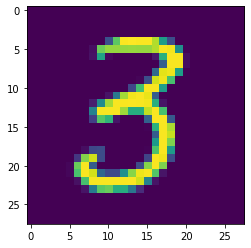

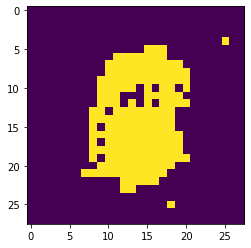

 89%|████████▉ | 210/235 [00:05<00:00, 32.87it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [91/100], Batch: [201/235], train accuracy: 0.085938, loss: 0.009069


100%|██████████| 235/235 [00:06<00:00, 39.12it/s]

Epoch: [91/100], train loss: 0.009056



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [91/100], test accuracy: 0.113500, loss: 2.310175


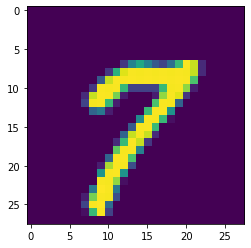

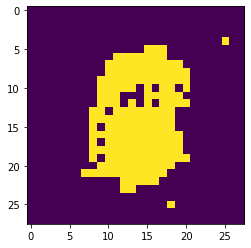

  3%|▎         | 8/235 [00:00<01:08,  3.31it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [92/100], Batch: [1/235], train accuracy: 0.101562, loss: 0.009024


 42%|████▏     | 98/235 [00:02<00:03, 43.61it/s]

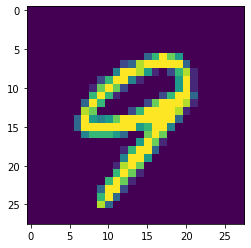

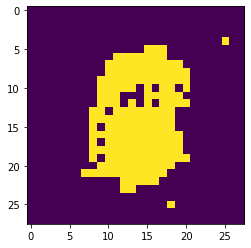

 46%|████▋     | 109/235 [00:02<00:03, 33.55it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [92/100], Batch: [101/235], train accuracy: 0.082031, loss: 0.009030


 85%|████████▍ | 199/235 [00:04<00:00, 45.94it/s]

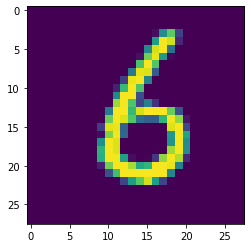

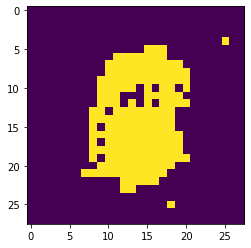

 89%|████████▉ | 209/235 [00:05<00:00, 32.79it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [92/100], Batch: [201/235], train accuracy: 0.101562, loss: 0.009038


100%|██████████| 235/235 [00:05<00:00, 39.39it/s]

Epoch: [92/100], train loss: 0.009056



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [92/100], test accuracy: 0.095800, loss: 2.311844


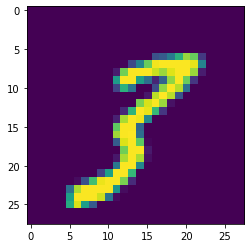

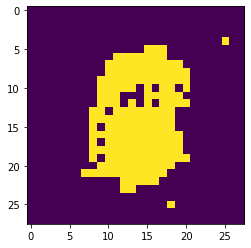

  3%|▎         | 8/235 [00:00<00:56,  4.00it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [93/100], Batch: [1/235], train accuracy: 0.117188, loss: 0.009018


 42%|████▏     | 98/235 [00:02<00:03, 43.41it/s]

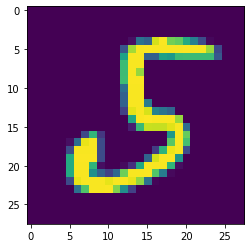

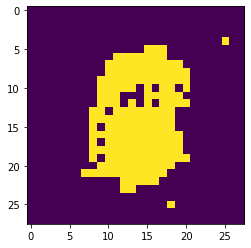

 46%|████▋     | 109/235 [00:02<00:03, 31.85it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [93/100], Batch: [101/235], train accuracy: 0.089844, loss: 0.009041


 85%|████████▍ | 199/235 [00:05<00:00, 42.46it/s]

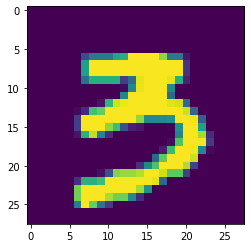

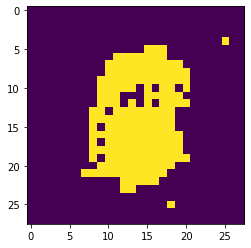

 89%|████████▉ | 210/235 [00:05<00:00, 32.30it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [93/100], Batch: [201/235], train accuracy: 0.125000, loss: 0.009006


100%|██████████| 235/235 [00:06<00:00, 38.66it/s]

Epoch: [93/100], train loss: 0.009053



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [93/100], test accuracy: 0.113500, loss: 2.311649


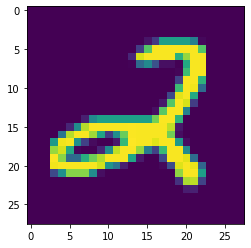

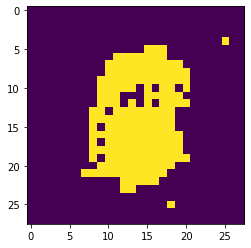

  3%|▎         | 8/235 [00:00<01:10,  3.21it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [94/100], Batch: [1/235], train accuracy: 0.105469, loss: 0.009040


 42%|████▏     | 98/235 [00:02<00:03, 43.85it/s]

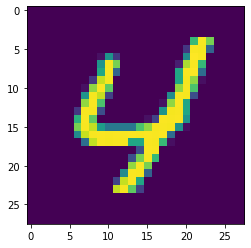

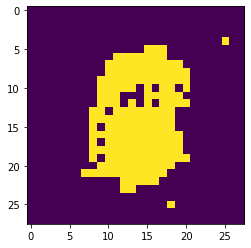

 46%|████▋     | 109/235 [00:02<00:03, 33.63it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [94/100], Batch: [101/235], train accuracy: 0.117188, loss: 0.009023


 85%|████████▍ | 199/235 [00:04<00:00, 44.93it/s]

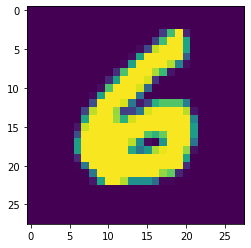

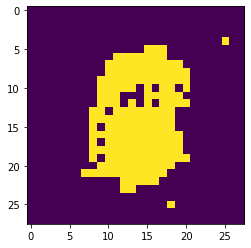

 89%|████████▉ | 210/235 [00:05<00:00, 32.84it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [94/100], Batch: [201/235], train accuracy: 0.078125, loss: 0.009055


100%|██████████| 235/235 [00:05<00:00, 39.40it/s]

Epoch: [94/100], train loss: 0.009055



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [94/100], test accuracy: 0.098200, loss: 2.315826


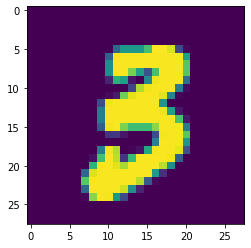

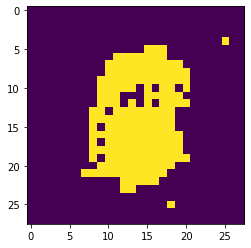

  3%|▎         | 8/235 [00:00<00:59,  3.79it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [95/100], Batch: [1/235], train accuracy: 0.117188, loss: 0.009031


 42%|████▏     | 98/235 [00:02<00:03, 44.28it/s]

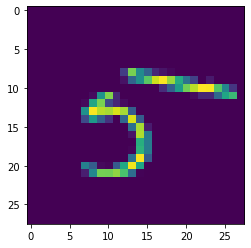

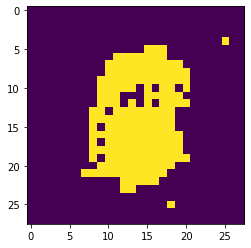

 46%|████▋     | 109/235 [00:02<00:03, 33.35it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [95/100], Batch: [101/235], train accuracy: 0.117188, loss: 0.009028


 85%|████████▍ | 199/235 [00:04<00:00, 43.77it/s]

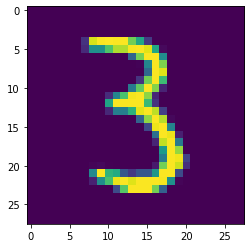

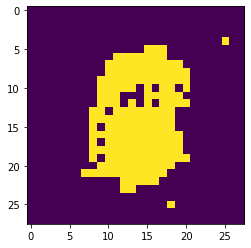

 89%|████████▉ | 210/235 [00:05<00:00, 32.67it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [95/100], Batch: [201/235], train accuracy: 0.089844, loss: 0.009055


100%|██████████| 235/235 [00:05<00:00, 39.57it/s]

Epoch: [95/100], train loss: 0.009057



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [95/100], test accuracy: 0.098000, loss: 2.308045


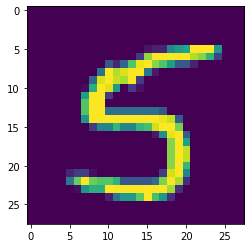

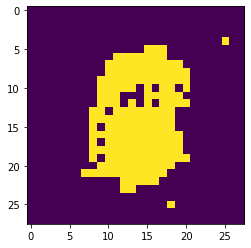

  3%|▎         | 8/235 [00:00<01:02,  3.66it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [96/100], Batch: [1/235], train accuracy: 0.082031, loss: 0.009027


 42%|████▏     | 98/235 [00:02<00:03, 45.06it/s]

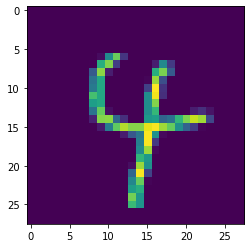

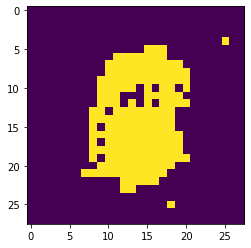

 47%|████▋     | 110/235 [00:02<00:03, 32.48it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [96/100], Batch: [101/235], train accuracy: 0.132812, loss: 0.009001


 85%|████████▌ | 200/235 [00:04<00:00, 45.66it/s]

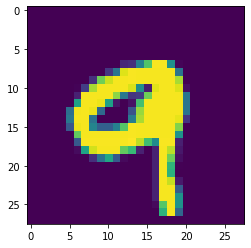

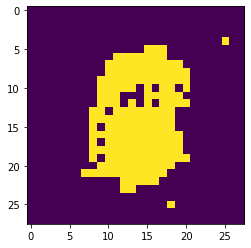

 89%|████████▉ | 210/235 [00:05<00:00, 32.96it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [96/100], Batch: [201/235], train accuracy: 0.101562, loss: 0.009027


100%|██████████| 235/235 [00:05<00:00, 39.75it/s]

Epoch: [96/100], train loss: 0.009056



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [96/100], test accuracy: 0.113500, loss: 2.313617


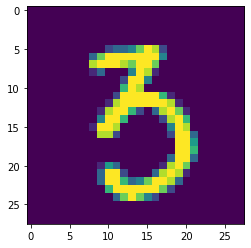

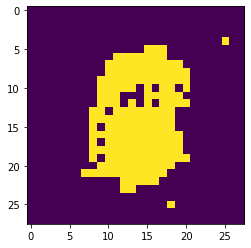

  3%|▎         | 8/235 [00:00<00:59,  3.83it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [97/100], Batch: [1/235], train accuracy: 0.085938, loss: 0.009098


 42%|████▏     | 98/235 [00:02<00:03, 43.56it/s]

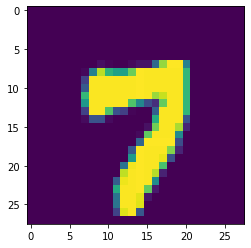

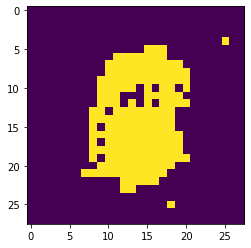

 46%|████▋     | 109/235 [00:02<00:03, 33.55it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [97/100], Batch: [101/235], train accuracy: 0.089844, loss: 0.009022


 85%|████████▌ | 200/235 [00:04<00:00, 44.72it/s]

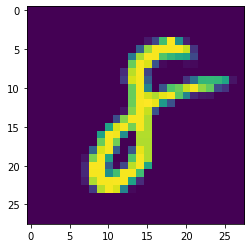

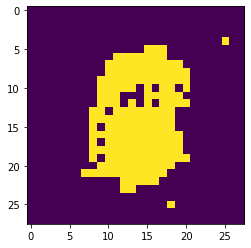

 89%|████████▉ | 210/235 [00:05<00:00, 33.29it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [97/100], Batch: [201/235], train accuracy: 0.066406, loss: 0.009033


100%|██████████| 235/235 [00:05<00:00, 39.68it/s]

Epoch: [97/100], train loss: 0.009056



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [97/100], test accuracy: 0.113500, loss: 2.311789


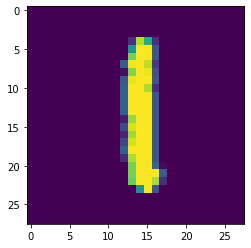

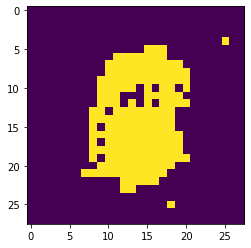

  3%|▎         | 8/235 [00:00<01:11,  3.18it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [98/100], Batch: [1/235], train accuracy: 0.101562, loss: 0.009061


 41%|████▏     | 97/235 [00:02<00:03, 43.48it/s]

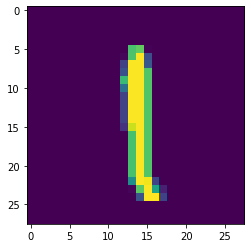

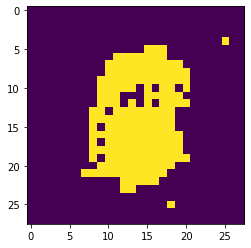

 46%|████▌     | 108/235 [00:03<00:03, 32.42it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [98/100], Batch: [101/235], train accuracy: 0.128906, loss: 0.009046


 84%|████████▍ | 198/235 [00:05<00:00, 42.70it/s]

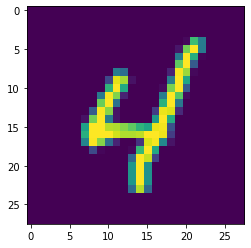

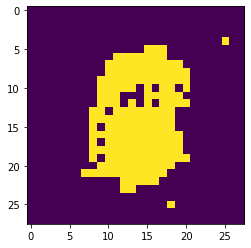

 89%|████████▉ | 209/235 [00:05<00:00, 33.11it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [98/100], Batch: [201/235], train accuracy: 0.082031, loss: 0.009020


100%|██████████| 235/235 [00:06<00:00, 38.06it/s]

Epoch: [98/100], train loss: 0.009053



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [98/100], test accuracy: 0.101000, loss: 2.311821


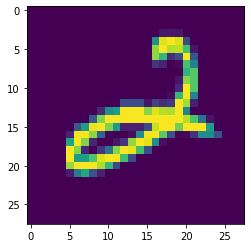

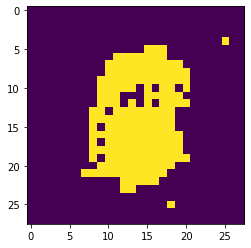

  3%|▎         | 8/235 [00:00<00:58,  3.85it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [99/100], Batch: [1/235], train accuracy: 0.066406, loss: 0.009054


 42%|████▏     | 99/235 [00:02<00:03, 45.29it/s]

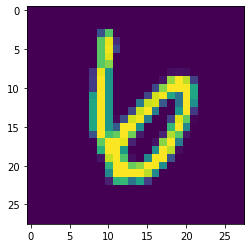

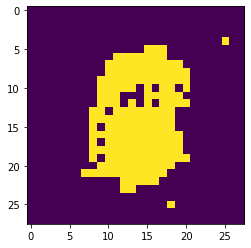

 47%|████▋     | 110/235 [00:02<00:03, 33.25it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [99/100], Batch: [101/235], train accuracy: 0.140625, loss: 0.008994


 85%|████████▌ | 200/235 [00:04<00:00, 42.61it/s]

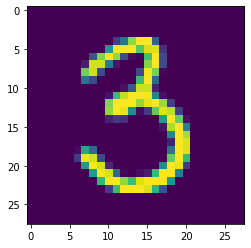

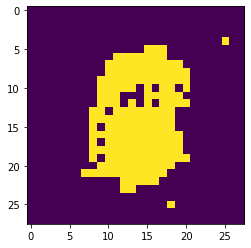

 89%|████████▉ | 210/235 [00:05<00:00, 32.74it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [99/100], Batch: [201/235], train accuracy: 0.128906, loss: 0.009041


100%|██████████| 235/235 [00:05<00:00, 39.64it/s]

Epoch: [99/100], train loss: 0.009055



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [99/100], test accuracy: 0.113500, loss: 2.308748


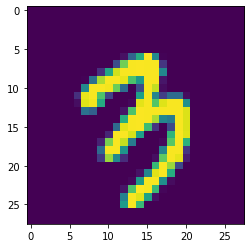

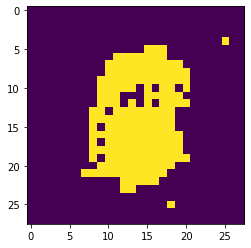

  3%|▎         | 8/235 [00:00<01:09,  3.25it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [100/100], Batch: [1/235], train accuracy: 0.117188, loss: 0.009032


 42%|████▏     | 98/235 [00:02<00:03, 43.22it/s]

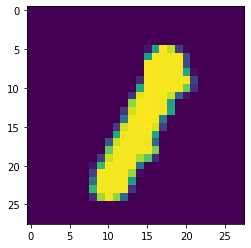

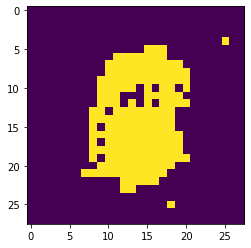

 46%|████▋     | 109/235 [00:02<00:03, 33.59it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [100/100], Batch: [101/235], train accuracy: 0.125000, loss: 0.009008


 85%|████████▍ | 199/235 [00:04<00:00, 46.18it/s]

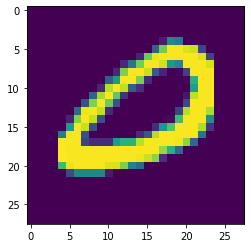

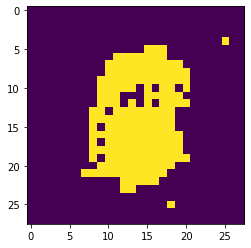

 89%|████████▉ | 210/235 [00:05<00:00, 33.12it/s]

tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
tensor([0.5296, 0.3452, 0.4138], device='cuda:1', grad_fn=<SliceBackward>)
the grads are tensor([0., 0., 0.], device='cuda:1')
Epoch: [100/100], Batch: [201/235], train accuracy: 0.085938, loss: 0.009025


100%|██████████| 235/235 [00:05<00:00, 39.35it/s]

Epoch: [100/100], train loss: 0.009055


Epoch: [100/100], test accuracy: 0.098000, loss: 2.310960


In [5]:
optimizer_recon = torch.optim.Adam(net.decoder.parameters(), lr=args['LEARNING_RATE_2'], weight_decay=args['WEIGHTDECAY'])
optimizer_class = torch.optim.Adam([
                {'params': net.conv1.parameters()},
                {'params': net.conv2.parameters()},
                {'params': net.fc1.parameters()},
                {'params': net.fc2.parameters()},
            ], lr=args['LEARNING_RATE_1'])


def imshow(img):
    npimg = img.detach().cpu().numpy()
#     plt.imshow(np.transpose(npimg)#, (1, 2, 0)))
    plt.imshow(npimg)
    plt.show()

def train_CapsNet(model, optimizer_class, optimizer_recon, train_loader, epoch, args):
    capsule_net = model
    capsule_net.train()
    n_batch = len(train_loader)
    total_loss = 0
    for batch_id, (data, target) in enumerate(tqdm(train_loader)):
        if(args['USE_CUDA']):
            
            data, target = data.cuda(), target.cuda()
        optimizer_class.zero_grad()
        optimizer_recon.zero_grad()
        output, reconstructions, masked = capsule_net(data)
        loss = capsule_net.loss(data, output, target, reconstructions)
        if(batch_id%100==0):
            img1 = data[0].reshape(28,28)
            img2 = reconstructions[0].reshape(28, 28)
            imshow(img1)
            imshow(img2)
            print(capsule_net.decoder.reconstraction_layers[0].weight[0][:3])
        loss.backward()
        optimizer_class.step()
        optimizer_recon.step()
        if(batch_id%100==0):
            print(capsule_net.decoder.reconstraction_layers[0].weight[0][:3])
            print("the grads are", capsule_net.decoder.reconstraction_layers[0].weight.grad[0][:3].data)
        correct = torch.sum(masked == target)
        train_loss = loss.item()
        total_loss += train_loss
        if batch_id % 100 == 0:
            tqdm.write("Epoch: [{}/{}], Batch: [{}/{}], train accuracy: {:.6f}, loss: {:.6f}".format(
                epoch,
                args['N_EPOCHS'],
                batch_id + 1,
                n_batch,
                correct / float(args['BATCH_SIZE']),
                train_loss / float(args['BATCH_SIZE'])
                ))
    tqdm.write('Epoch: [{}/{}], train loss: {:.6f}'.format(epoch,args['N_EPOCHS'],total_loss / len(train_loader.dataset)))
    


for e in range(1, args['N_EPOCHS'] + 1):
    train_CapsNet(net, optimizer_class, optimizer_recon, trainloader, e, args)
    test_CapsNet(net, testloader, e, args)